In [182]:
import numpy as np  
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from os.path import join

import warnings 
warnings.filterwarnings('ignore')

In [183]:
cmap = mpl.cm.get_cmap('tab20')
# 设置正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

结合我国当前的人口数量、人口结构以及人口政策，建立数学模型预测我国中小学学生数量的变化情况；

In [184]:
data_root = r'/home/drew/Desktop/MathModeling/SchoolCompetition/data'
cur_data = '全国数据'

In [185]:
# 人口出生率，死亡率和自然增长率
br_dr_ngr_df = pd.read_csv(join(data_root, cur_data, '人口出生率，死亡率和自然增长率.csv'), 
                           header=2, index_col=0).iloc[:-2, :].T
# 人口年龄结果和抚养比
pao_dr_df = pd.read_csv(join(data_root, cur_data, '人口年龄结果和抚养比.csv'), 
                        header=2, index_col=0).iloc[:-3, :].T
# 总人口
tp_df = pd.read_csv(join(data_root, cur_data, '总人口.csv'), 
                    header=2, index_col=0).iloc[:-2, :].T
# 按年龄分人口数
pbya_df = pd.read_csv(join(data_root, cur_data, '全国按年龄分人口数.csv'), 
                      header=2, index_col=0).iloc[:-2, :].T

人口结构

In [186]:
pbya_df.columns

Index(['人口数(人口抽样调查)(人)', '0-4岁人口数(人口抽样调查)(人)', '5-9岁人口数(人口抽样调查)(人)',
       '10-14岁人口数(人口抽样调查)(人)', '15-19岁人口数(人口抽样调查)(人)', '20-24岁人口数(人口抽样调查)(人)',
       '25-29岁人口数(人口抽样调查)(人)', '30-34岁人口数(人口抽样调查)(人)', '35-39岁人口数(人口抽样调查)(人)',
       '40-44岁人口数(人口抽样调查)(人)', '45-49岁人口数(人口抽样调查)(人)', '50-54岁人口数(人口抽样调查)(人)',
       '55-59岁人口数(人口抽样调查)(人)', '60-64岁人口数(人口抽样调查)(人)', '65-69岁人口数(人口抽样调查)(人)',
       '70-74岁人口数(人口抽样调查)(人)', '75-79岁人口数(人口抽样调查)(人)', '80-84岁人口数(人口抽样调查)(人)',
       '85-89岁人口数(人口抽样调查)(人)', '90-94岁人口数(人口抽样调查)(人)', '95岁以上人口数(人口抽样调查)(人)'],
      dtype='object', name='指标')

In [187]:
print(pbya_df.index)

Index(['2023年', '2022年', '2021年', '2020年', '2019年', '2018年', '2017年', '2016年',
       '2015年', '2014年', '2013年', '2012年', '2011年', '2010年', '2009年', '2008年',
       '2007年', '2006年', '2005年', '2004年'],
      dtype='object')


In [188]:
pbya_df.head()

指标     人口数(人口抽样调查)(人)  0-4岁人口数(人口抽样调查)(人)  5-9岁人口数(人口抽样调查)(人)  \
2023年             NaN                 NaN                 NaN   
2022年       1443996.0             62248.0             90793.0   
2021年       1494054.0             72978.0             96094.0   
2020年             NaN                 NaN                 NaN   
2019年       1091876.0             62722.0             60701.0   

指标     10-14岁人口数(人口抽样调查)(人)  15-19岁人口数(人口抽样调查)(人)  20-24岁人口数(人口抽样调查)(人)  \
2023年                   NaN                   NaN                   NaN   
2022年               91846.0               79560.0               73629.0   
2021年               92304.0               79414.0               77256.0   
2020年                   NaN                   NaN                   NaN   
2019年               59844.0               55822.0               61519.0   

指标     25-29岁人口数(人口抽样调查)(人)  30-34岁人口数(人口抽样调查)(人)  35-39岁人口数(人口抽样调查)(人)  \
2023年                   NaN                   NaN                   NaN   
2022年               85040.0              116755.0              109832.0   
2021年               91729.0              128056.0              109171.0   
2020年                   NaN                   NaN                   NaN   
2019年               81741.0               93971.0               77703.0   

指标     40-44岁人口数(人口抽样调查)(人)  ...  50-54岁人口数(人口抽样调查)(人)  55-59岁人口数(人口抽样调查)(人)  \
2023年                   NaN  ...                   NaN                   NaN   
2022年               98379.0  ...              127635.0              117482.0   
2021年               98023.0  ...              129319.0              121989.0   
2020年                   NaN  ...                   NaN                   NaN   
2019年               77044.0  ...               93125.0               74068.0   

指标     60-64岁人口数(人口抽样调查)(人)  65-69岁人口数(人口抽样调查)(人)  70-74岁人口数(人口抽样调查)(人)  \
2023年                   NaN                   NaN                   NaN   
2022年               71964.0               79964.0               58782.0   
2021年               70755.0               81345.0               56208.0   
2020年                   NaN                   NaN                   NaN   
2019年               60712.0               55086.0               35665.0   

指标     75-79岁人口数(人口抽样调查)(人)  80-84岁人口数(人口抽样调查)(人)  85-89岁人口数(人口抽样调查)(人)  \
2023年                   NaN                   NaN                   NaN   
2022年               35928.0               22434.0               12542.0   
2021年               34886.0               22543.0               12317.0   
2020年                   NaN                   NaN                   NaN   
2019年               22610.0               14322.0                7036.0   

指标     90-94岁人口数(人口抽样调查)(人)  95岁以上人口数(人口抽样调查)(人)  
2023年                   NaN                  NaN  
2022年                4297.0                929.0  
2021年                4249.0                871.0  
2020年                   NaN                  NaN  
2019年                2113.0                450.0  

[5 rows x 21 columns]

In [189]:
pbya_df.isna().any(axis=1)

2023年     True
2022年    False
2021年    False
2020年     True
2019年    False
2018年    False
2017年    False
2016年    False
2015年    False
2014年    False
2013年    False
2012年    False
2011年    False
2010年     True
2009年    False
2008年    False
2007年    False
2006年    False
2005年    False
2004年    False
dtype: bool

In [190]:
modify_col = ['人口数'] + [col.split('岁')[0] for col in pbya_df.columns][1:]
pbya_df.columns = modify_col

In [191]:
pbya_df.index = [idx.split('年')[0] for idx in pbya_df.index]

In [192]:
pbya_df

人口数        0-4        5-9      10-14      15-19      20-24  \
2023         NaN        NaN        NaN        NaN        NaN        NaN   
2022   1443996.0    62248.0    90793.0    91846.0    79560.0    73629.0   
2021   1494054.0    72978.0    96094.0    92304.0    79414.0    77256.0   
2020         NaN        NaN        NaN        NaN        NaN        NaN   
2019   1091876.0    62722.0    60701.0    59844.0    55822.0    61519.0   
2018   1144648.0    67393.0    63322.0    62248.0    58258.0    68050.0   
2017   1145246.0    68313.0    63314.0    60727.0    59251.0    73185.0   
2016   1158019.0    68447.0    63831.0    60420.0    61562.0    79102.0   
2015  21312241.0  1243566.0  1174724.0  1103520.0  1165548.0  1554837.0   
2014   1124402.0    63990.0    63132.0    58287.0    64719.0    90785.0   
2013   1118433.0    63490.0    62446.0    57562.0    68715.0    97406.0   
2012   1124661.0    63981.0    61309.0    59845.0    73914.0   101742.0   
2011   1145209.0    64830.0    61279.0    62481.0    80388.0   108567.0   
2010         NaN        NaN        NaN        NaN        NaN        NaN   
2009   1164986.0    60158.0    63000.0    73359.0    83516.0    87637.0   
2008   1178521.0    60409.0    64402.0    79278.0    92767.0    80885.0   
2007   1188739.0    59996.0    68202.0    84278.0    98916.0    78601.0   
2006   1192666.0    60556.0    70588.0    89136.0   105023.0    76160.0   
2005  16985766.0   907102.0  1060664.0  1353263.0  1443484.0  1036723.0   
2004   1253065.0    61874.0    76221.0   103771.0   109259.0    79604.0   

          25-29      30-34      35-39      40-44  ...      50-54      55-59  \
2023        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2022    85040.0   116755.0   109832.0    98379.0  ...   127635.0   117482.0   
2021    91729.0   128056.0   109171.0    98023.0  ...   129319.0   121989.0   
2020        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2019    81741.0    93971.0    77703.0    77044.0  ...    93125.0    74068.0   
2018    92977.0    93201.0    81886.0    83574.0  ...    96850.0    69844.0   
2017   100701.0    88959.0    82553.0    87713.0  ...    96760.0    59823.0   
2016   106663.0    87573.0    80485.0    94730.0  ...    97608.0    59638.0   
2015  1992252.0  1573049.0  1507593.0  1824946.0  ...  1615839.0  1193350.0   
2014    98845.0    82546.0    81792.0   101959.0  ...    77909.0    66409.0   
2013    93136.0    82677.0    84334.0   103771.0  ...    69533.0    70719.0   
2012    89936.0    83586.0    89054.0   107532.0  ...    61916.0    71403.0   
2011    89259.0    82148.0    96895.0   107391.0  ...    62204.0    71667.0   
2010        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2009    75481.0    78735.0   106040.0   112356.0  ...    84335.0    79114.0   
2008    76417.0    82027.0   109297.0   113708.0  ...    91958.0    77554.0   
2007    76755.0    86753.0   115391.0   115847.0  ...    92481.0    73224.0   
2006    74110.0    93398.0   113952.0   115781.0  ...    90607.0    68277.0   
2005  1110290.0  1445908.0  1651487.0  1475539.0  ...  1236929.0   907435.0   
2004    88490.0   117954.0   122574.0   100595.0  ...    86438.0    61775.0   

          60-64     65-69     70-74     75-79     80-84     85-89    90-94  \
2023        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2022    71964.0   79964.0   58782.0   35928.0   22434.0   12542.0   4297.0   
2021    70755.0   81345.0   56208.0   34886.0   22543.0   12317.0   4249.0   
2020        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2019    60712.0   55086.0   35665.0   22610.0   14322.0    7036.0   2113.0   
2018    68014.0   54799.0   34810.0   22799.0   14845.0    6902.0   2031.0   
2017    68044.0   51552.0   32590.0   22553.0   14708.0    6606.0   1964.0   
2016    67696.0   48454.0   31677.0   22449.0   14331.0    6416.0   1902.0   
2015  1211435.0  850443.0  563097.0  411240.0  253260.0  111758.0  33773.0 

In [193]:
tp_df.head()

指标     年末总人口(万人)  男性人口(万人)  女性人口(万人)  城镇人口(万人)  乡村人口(万人)
2023年   140967.0   72032.0   68935.0   93267.0   47700.0
2022年   141175.0   72206.0   68969.0   92071.0   49104.0
2021年   141260.0   72311.0   68949.0   91425.0   49835.0
2020年   141212.0   72357.0   68855.0   90220.0   50992.0
2019年   141008.0   72039.0   68969.0   88426.0   52582.0

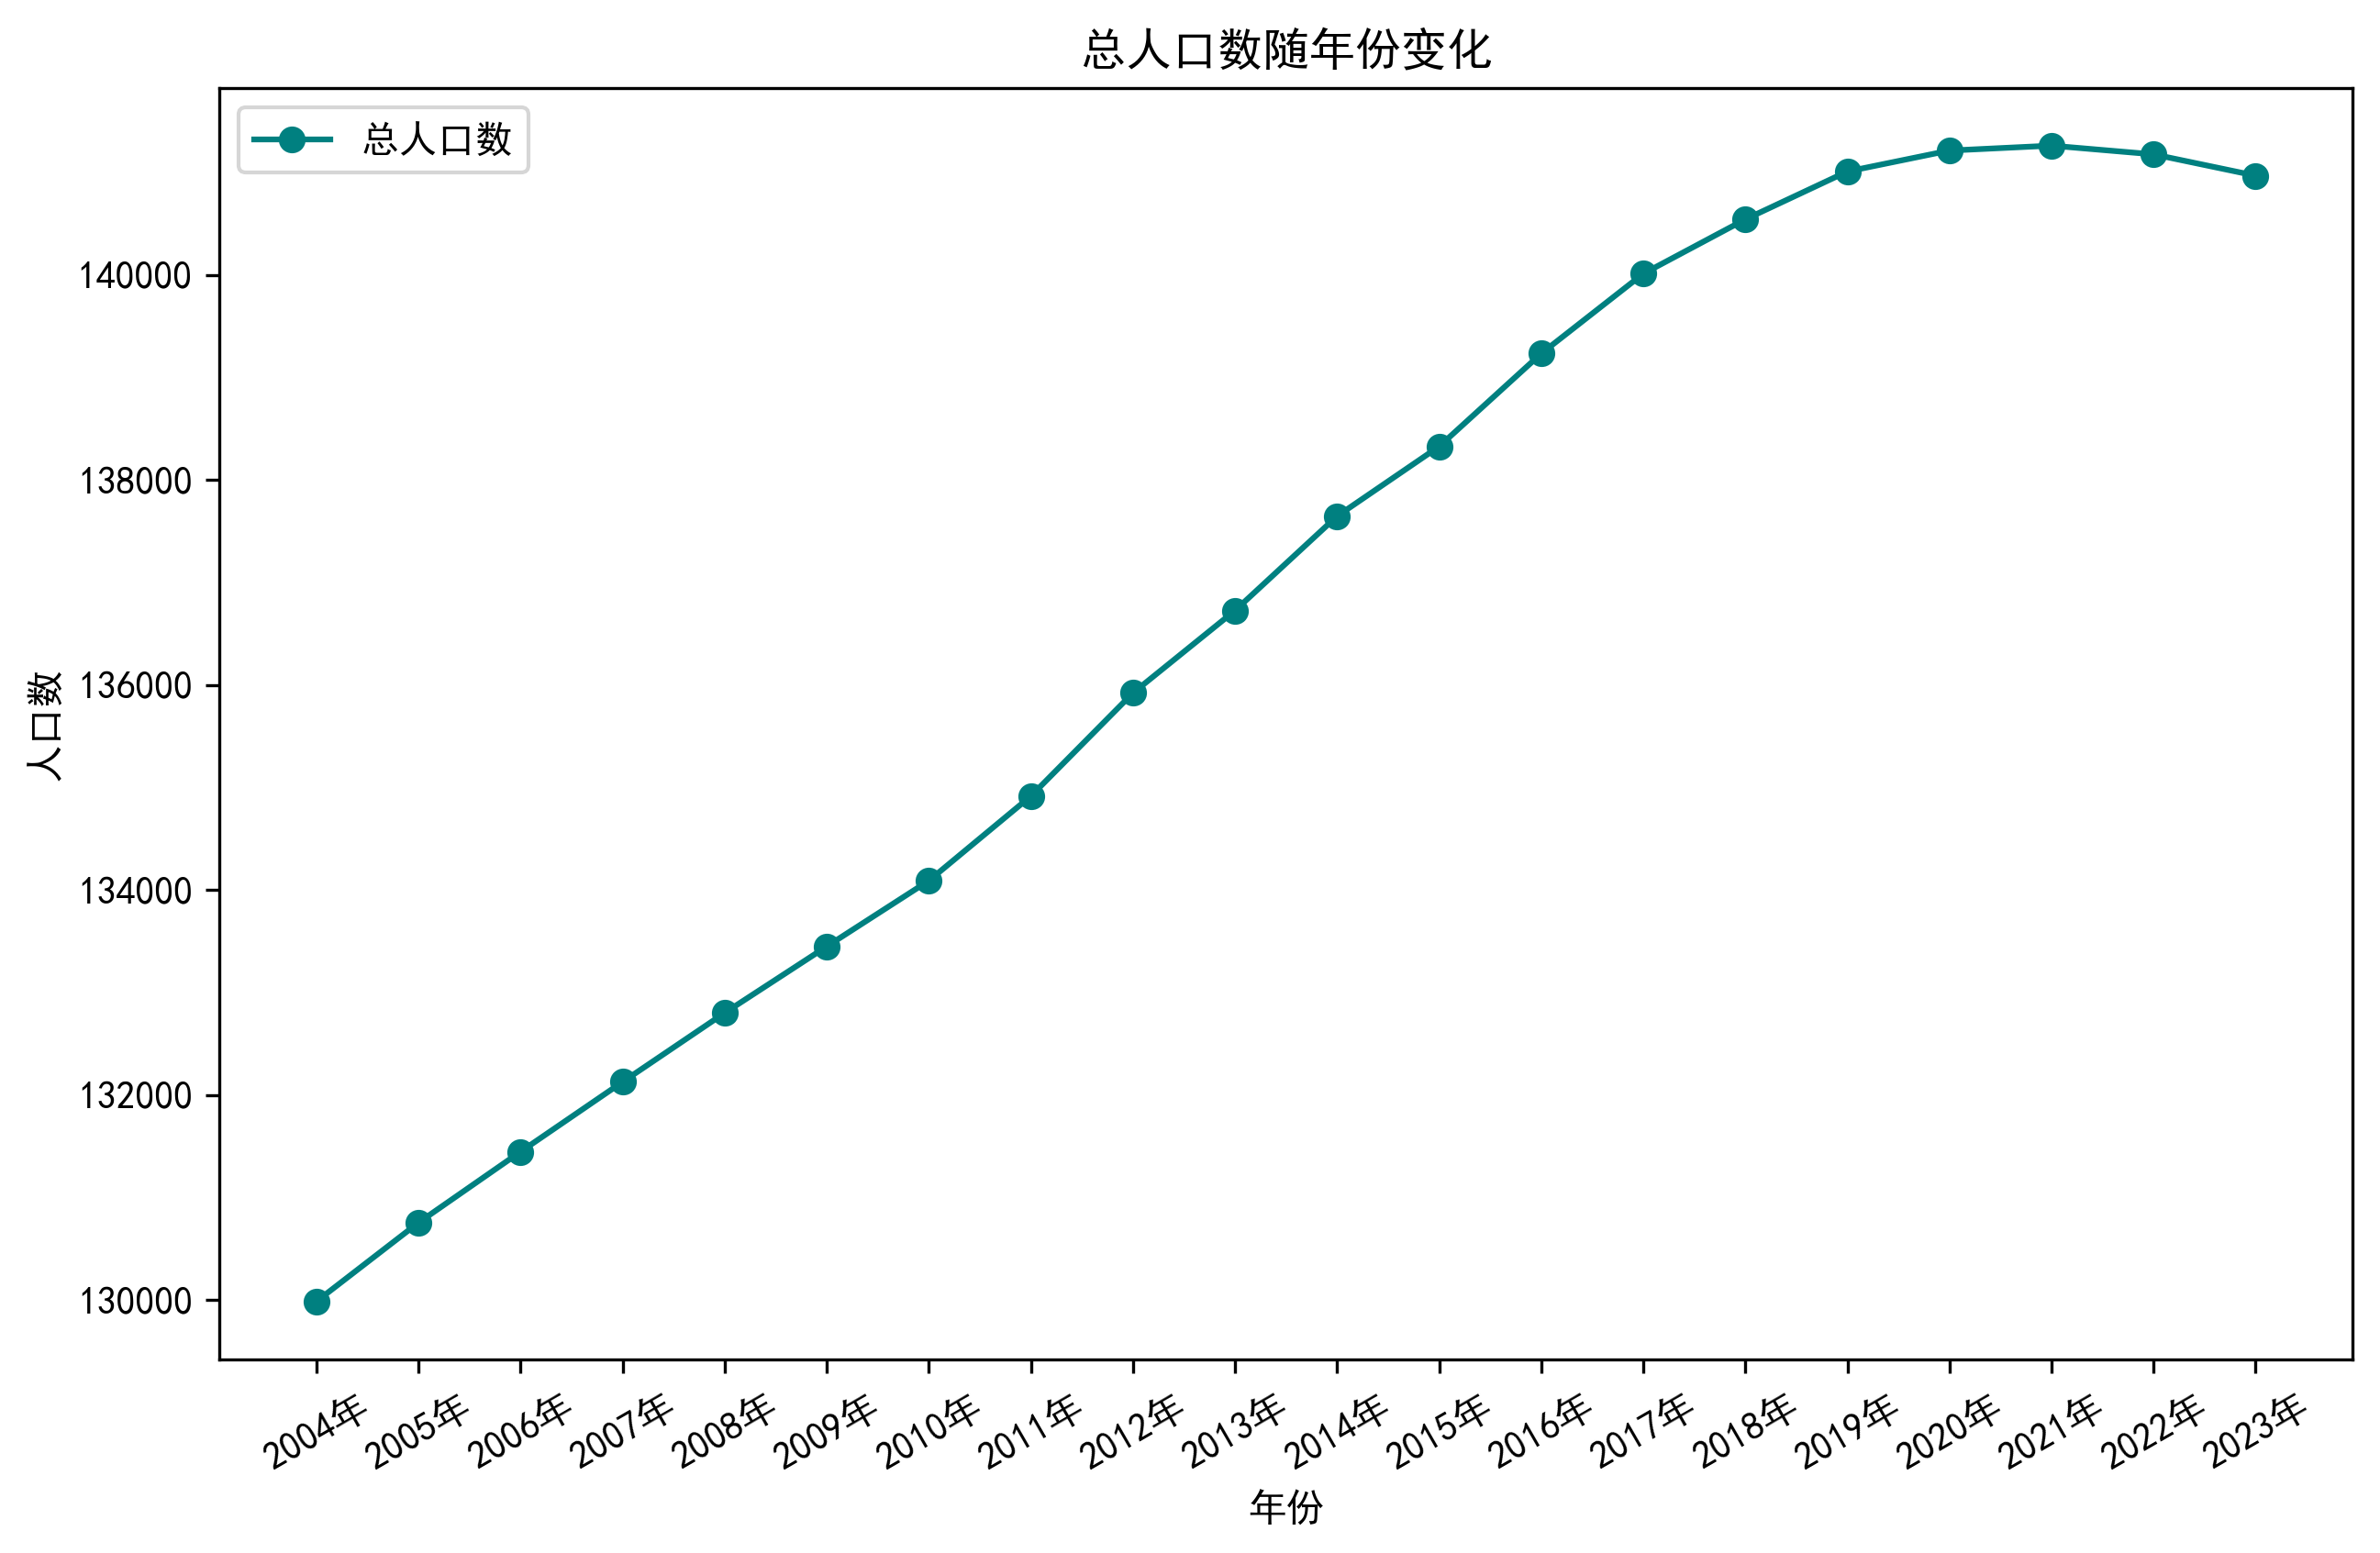

In [194]:
plt.figure(figsize=(10, 6), dpi=300)
total_population = tp_df.iloc[:, 0]
plt.plot(
    total_population.index[::-1], 
    total_population[::-1], 
    marker='o', label='总人口数', color='teal'
)
plt.xticks(rotation=30)
plt.title('总人口数随年份变化')
plt.xlabel('年份')
plt.ylabel('人口数')
plt.legend()

In [195]:
drop_columns = [
    # '2005', '2015', '2023', 
    '2020', '2010'
]

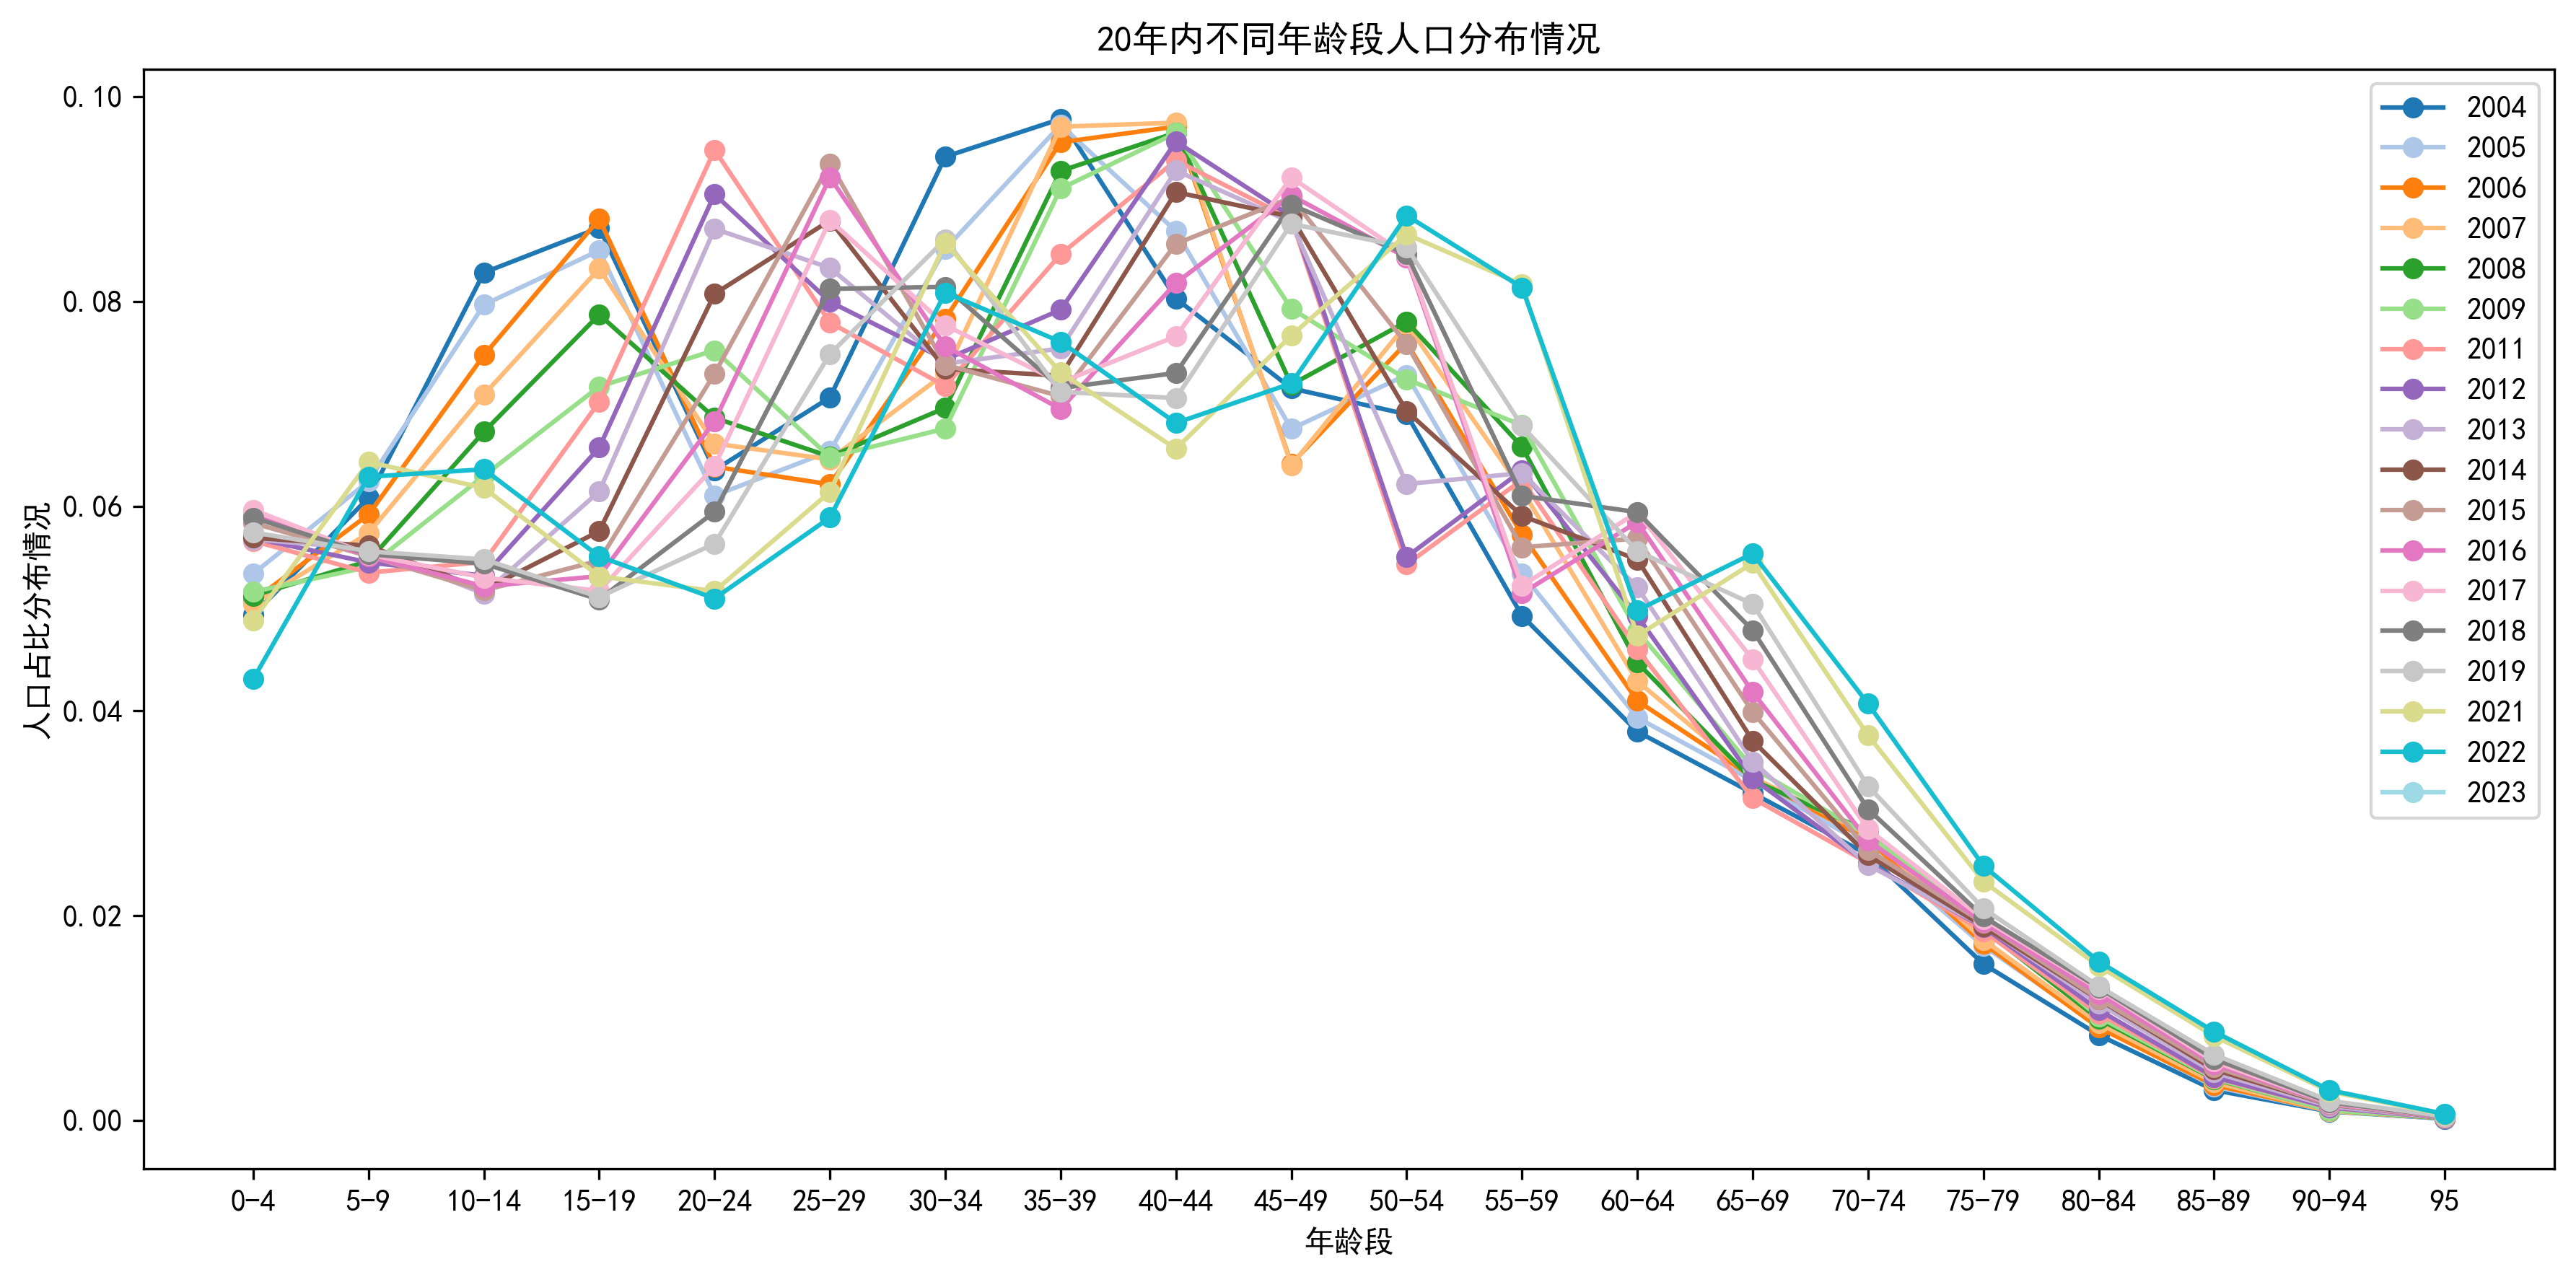

In [196]:
plt.figure(figsize=(12, 6), dpi=300)
other_age_groups = pbya_df.iloc[1:, 1:].drop(drop_columns).apply(lambda x: x/pbya_df.iloc[:, 0])
for i, (index, row) in enumerate(other_age_groups.iterrows()):
    if index in drop_columns:
        continue
    x = [index.split('岁')[0] for index in row.index]
    y = row.values.reshape(-1, 1)
    plt.plot(x, y, marker='o', label=index, color=cmap(i / len(x)))

plt.legend(loc='best')

plt.title('20年内不同年龄段人口分布情况')
plt.xlabel('年龄段')
plt.ylabel('人口占比分布情况')

plt.tight_layout()

plt.show()

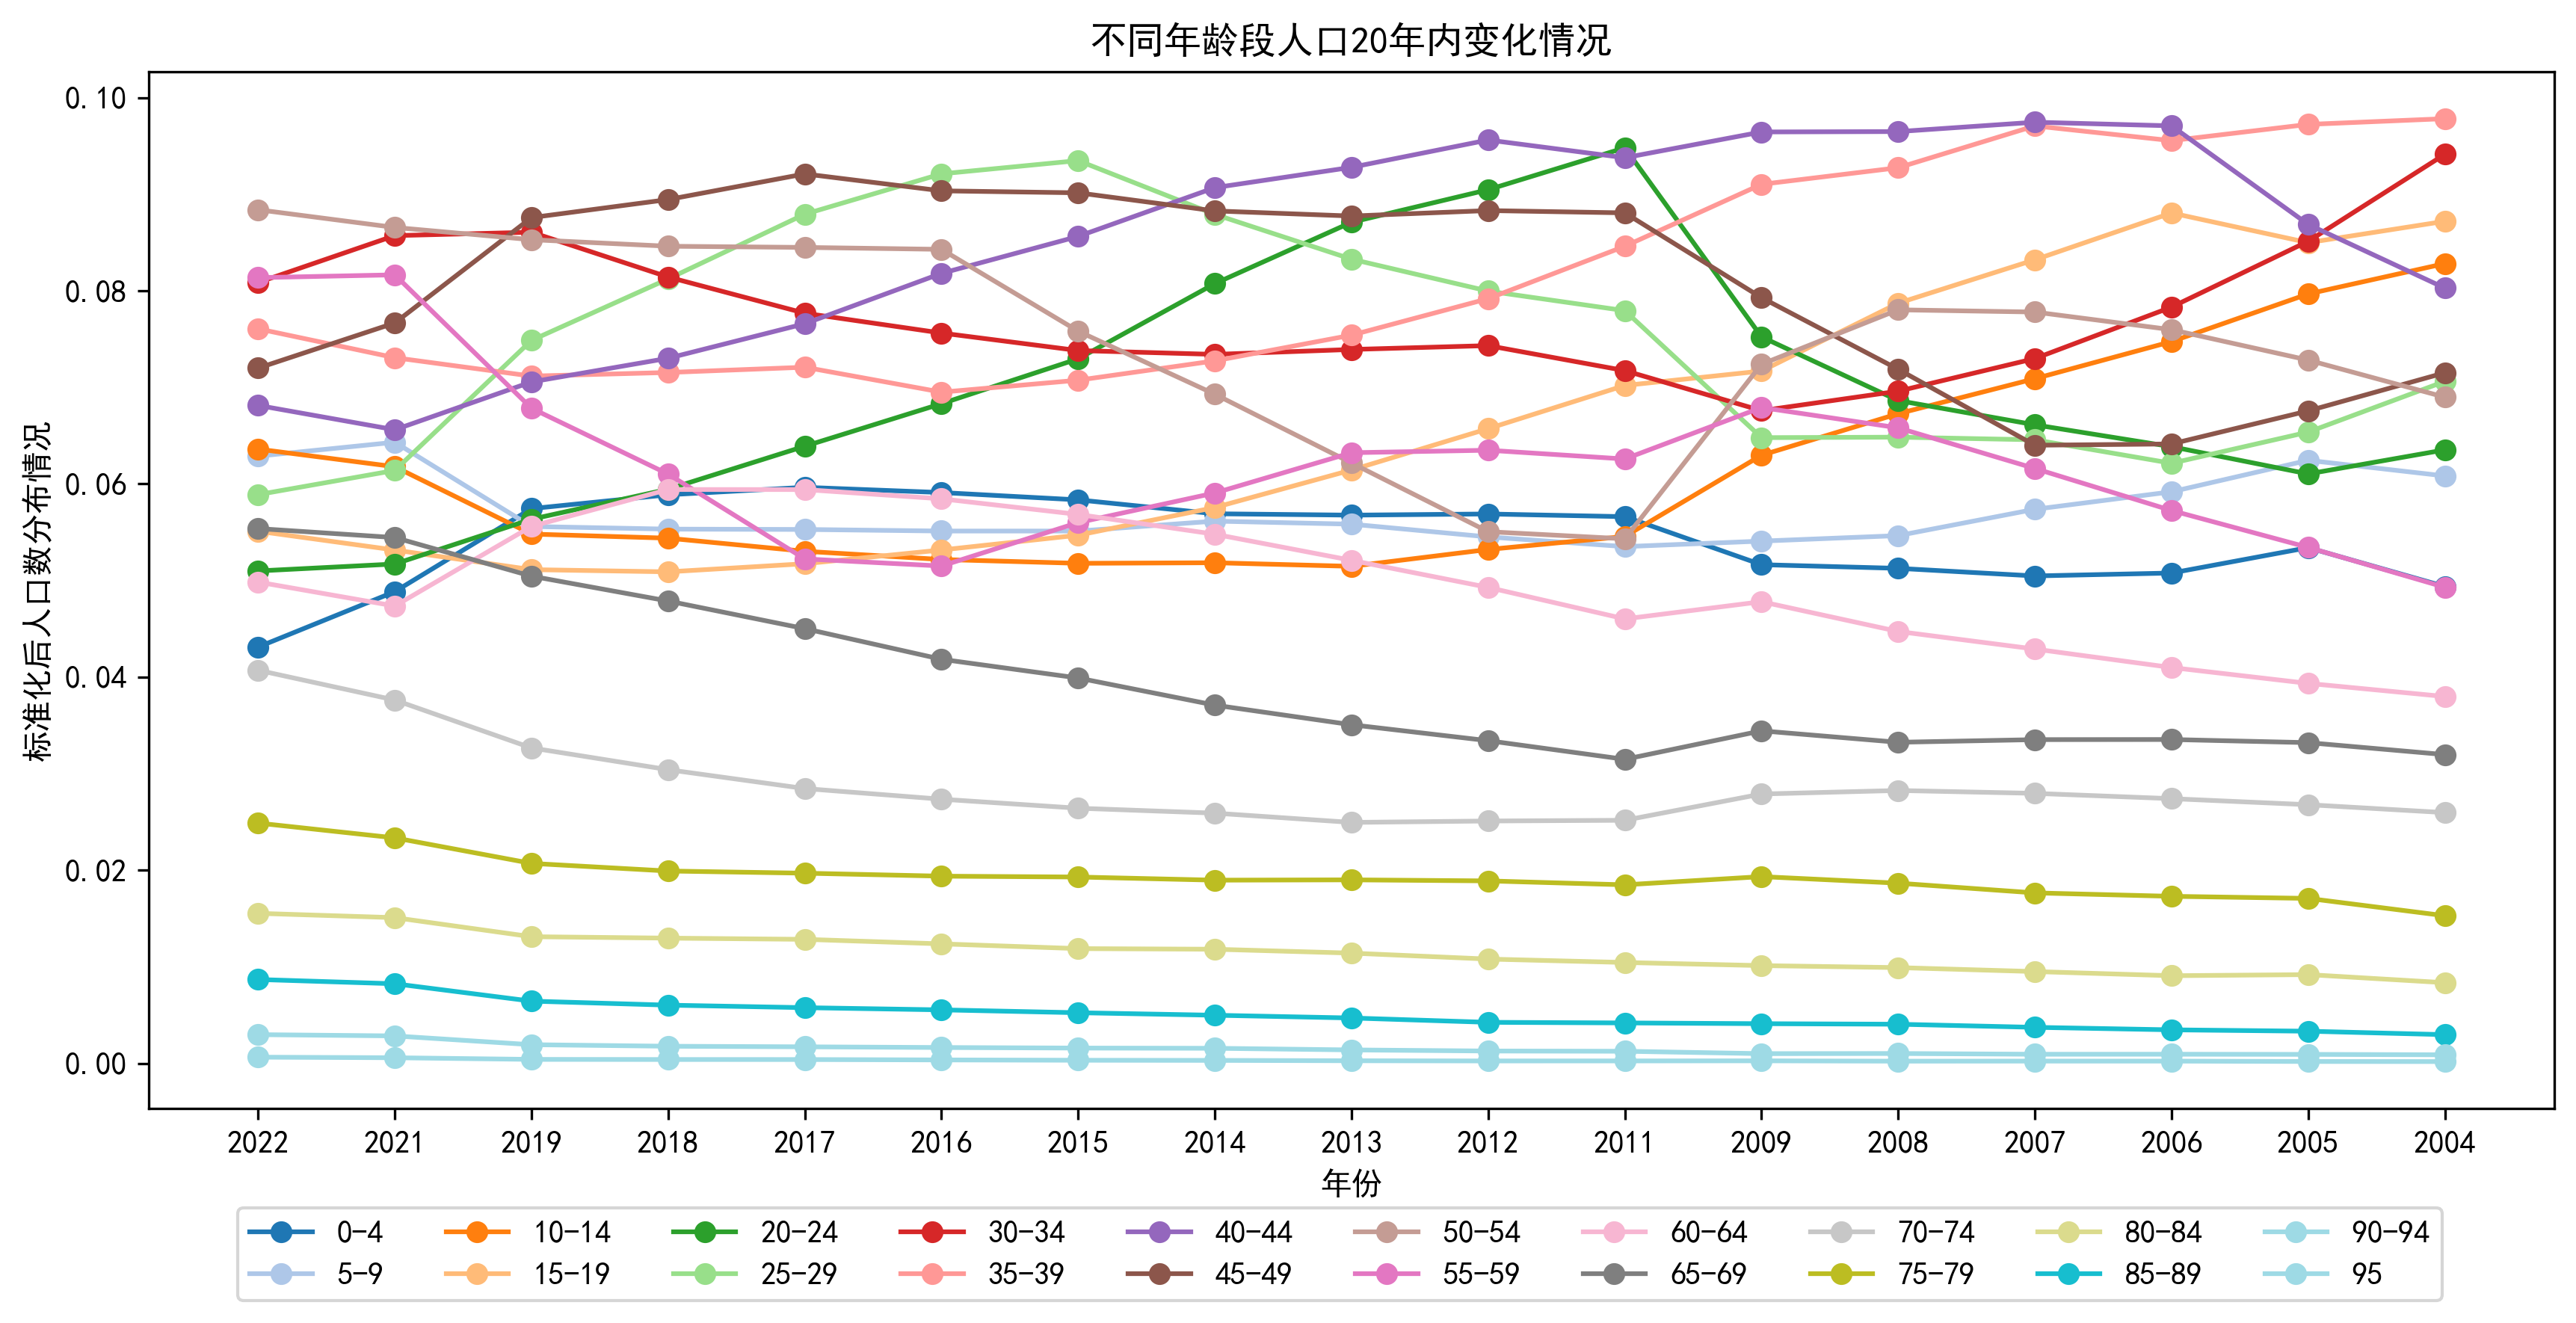

In [197]:
plt.figure(figsize=(12, 6), dpi=300)
for i, (index, row) in enumerate(other_age_groups.drop(
        drop_columns + ['2020', '2010'], axis=0).T.iterrows()):
    x = [index.split('岁')[0] for index in row.index][::-1]
    y = row.values.reshape(-1, 1)[::-1]
    plt.plot(x, y, marker='o', label=index, color=cmap(i / len(x)))

plt.legend(loc='lower right', bbox_to_anchor=(0.96, -0.2), ncol=10)

plt.title('不同年龄段人口20年内变化情况')
plt.xlabel('年份')
plt.ylabel('标准化后人口数分布情况')

plt.tight_layout()

plt.show()

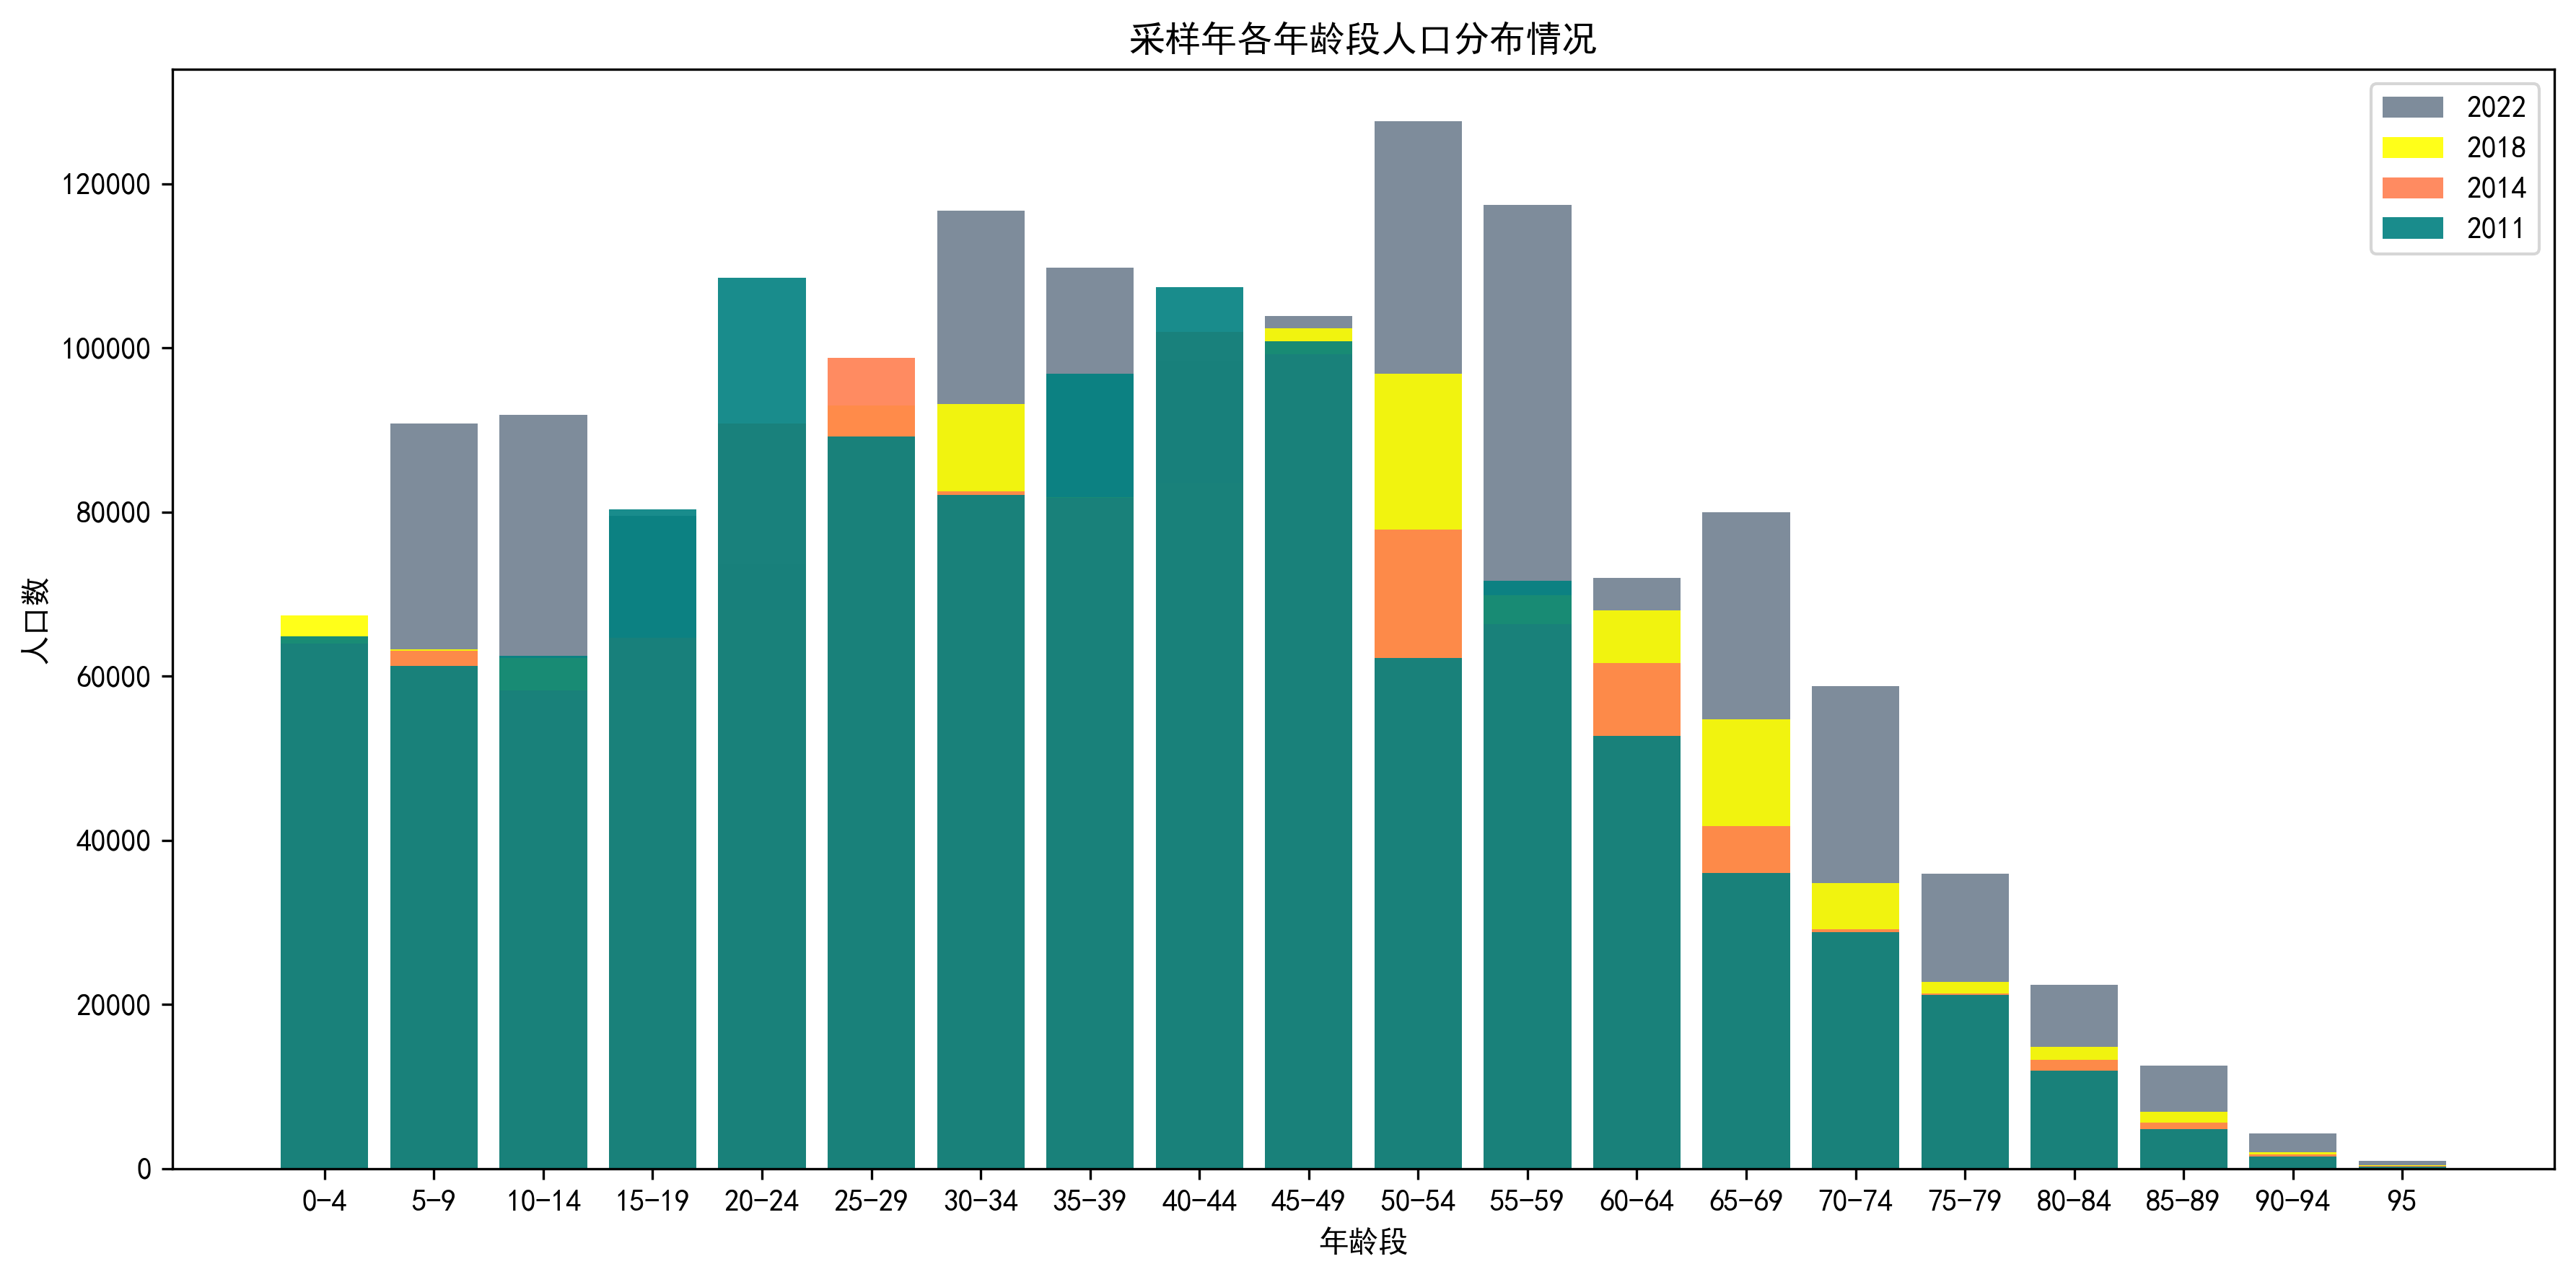

In [198]:
plt.figure(figsize=(12, 6), dpi=300)
for year, color in zip(['2022', '2018', '2014', '2011'], 
                       ['slategray', 'yellow', 'coral', 'teal']):
    age_data = pbya_df.loc[year, :].drop(['人口数'])
    plt.bar(x=age_data.index,height=age_data, color=color, alpha=0.9)

plt.legend(['2022', '2018', '2014', '2011'])
plt.title('采样年各年龄段人口分布情况')
plt.xlabel('年龄段')
plt.ylabel('人口数')

plt.tight_layout()

plt.show()

In [199]:
br_dr_ngr_df.head()

指标     人口出生率(‰)  人口死亡率(‰)  人口自然增长率(‰)
2023年      6.39      7.87       -1.48
2022年      6.77      7.37       -0.60
2021年      7.52      7.18        0.34
2020年      8.52      7.07        1.45
2019年     10.41      7.09        3.32

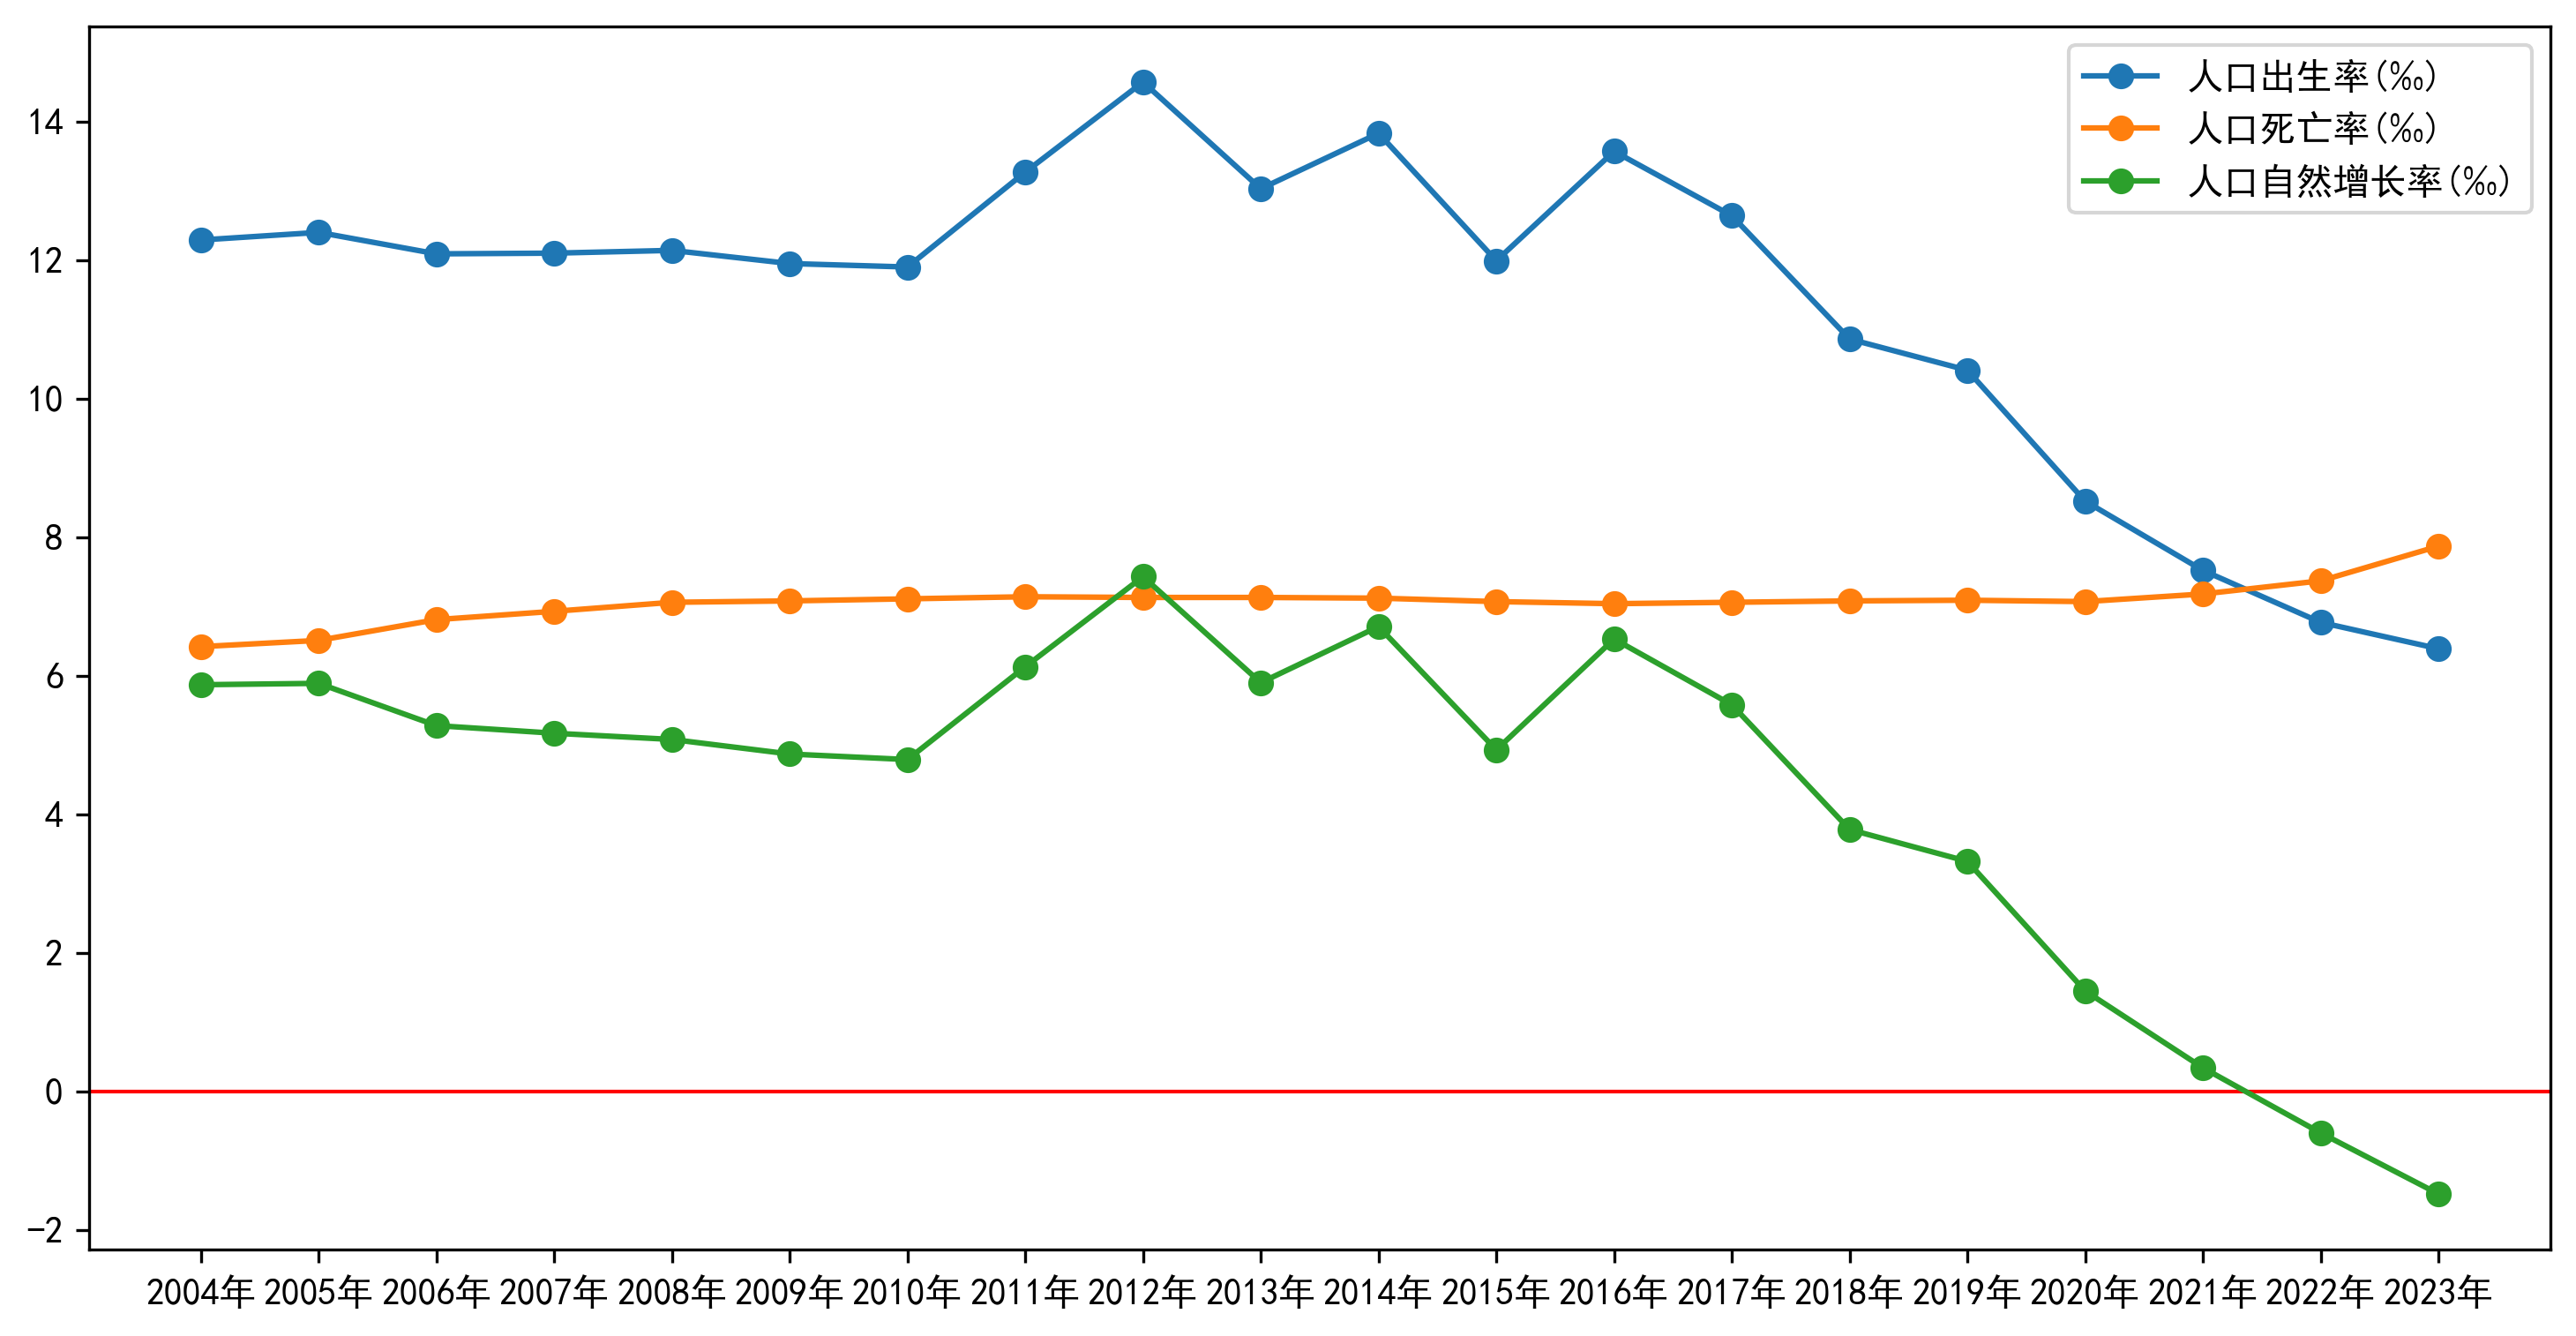

In [200]:
plt.figure(figsize=(12, 6), dpi=300)
plt.axhline(y=0, color='red', linewidth=1)
for index, row in br_dr_ngr_df.T.iterrows():
    if index in drop_columns:
        continue
    x = row.index[::-1]
    y = row[::-1]
    plt.plot(x, y, marker='o', label=index)
plt.legend()
plt.show()

In [201]:
pbya_df.head()

人口数      0-4      5-9    10-14    15-19    20-24    25-29  \
2023        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022  1443996.0  62248.0  90793.0  91846.0  79560.0  73629.0  85040.0   
2021  1494054.0  72978.0  96094.0  92304.0  79414.0  77256.0  91729.0   
2020        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019  1091876.0  62722.0  60701.0  59844.0  55822.0  61519.0  81741.0   

         30-34     35-39    40-44  ...     50-54     55-59    60-64    65-69  \
2023       NaN       NaN      NaN  ...       NaN       NaN      NaN      NaN   
2022  116755.0  109832.0  98379.0  ...  127635.0  117482.0  71964.0  79964.0   
2021  128056.0  109171.0  98023.0  ...  129319.0  121989.0  70755.0  81345.0   
2020       NaN       NaN      NaN  ...       NaN       NaN      NaN      NaN   
2019   93971.0   77703.0  77044.0  ...   93125.0   74068.0  60712.0  55086.0   

        70-74    75-79    80-84    85-89   90-94     95  
2023      NaN      NaN      NaN      NaN     NaN    NaN  
2022  58782.0  35928.0  22434.0  12542.0  4297.0  929.0  
2021  56208.0  34886.0  22543.0  12317.0  4249.0  871.0  
2020      NaN      NaN      NaN      NaN     NaN    NaN  
2019  35665.0  22610.0  14322.0   7036.0  2113.0  450.0  

[5 rows x 21 columns]

首先去除却缺失值,将不同年龄的分布变为占比情况, 用以消除不同尺度数据的影响

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
train_df = pbya_df.dropna(axis=0)
train_df_copy = train_df.iloc[:, 1:].copy()
std = StandardScaler()
train_df.iloc[:, 1:] = std.fit_transform(train_df.iloc[:, 1:].apply(lambda x: x/train_df.iloc[:, 0]))
train_df.drop(['人口数'], axis=1, inplace=True)
train_df.head()

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2022 -2.431481  1.719628  0.233921 -0.789509 -1.445820 -1.414361  0.455979   
2021 -1.160806  2.155358  0.053903 -0.932876 -1.388486 -1.191501  1.176107   
2019  0.743527 -0.481954 -0.634033 -1.082496 -1.019119  0.007113  1.228523   
2018  1.060751 -0.564555 -0.676127 -1.099376 -0.771351  0.573601  0.540200   
2017  1.231854 -0.575398 -0.809965 -1.037383 -0.416397  1.170109 -0.015517   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2022 -0.518373 -1.589753 -0.870343  1.302590  2.158489  0.037447  2.007185   
2021 -0.797329 -1.824214 -0.393738  1.123151  2.191024 -0.324626  1.889312   
2019 -0.975070 -1.363617  0.718029  0.999232  0.644969  0.879715  1.383540   
2018 -0.940236 -1.135595  0.908718  0.932927 -0.118053  1.437036  1.057332   
2017 -0.889398 -0.803014  1.179140  0.920918 -1.100915  1.436330  0.695231   

         70-74     75-79     80-84     85-89     90-94        95  
2022  2.792338  2.590620  2.051938  2.316968  2.419165  2.534344  
2021  2.070531  1.881342  1.827774  2.035984  2.201281  2.051873  
2019  0.911343  0.657220  0.840320  0.890654  0.699349  0.686652  
2018  0.384529  0.291446  0.766285  0.627138  0.433490  0.590665  
2017 -0.072473  0.187120  0.702981  0.460684  0.335268  0.568063

In [204]:
from statsmodels.tsa.stattools import adfuller

- 正如前面所述，差分的目的是使时间序列平稳。但我们应该注意不要过度差分这个序列。
- 过度差分的序列可能仍然是平稳的，这反过来会影响模型参数。
- 所以我们需要确定正确的差分阶数。正确的差分阶数是使序列接近平稳所需的最小差分，该序列围绕一个确定的均值波动，并且自相关图（ACF图）很快达到零。
  
- 如果自相关在许多滞后期（10个或更多）为正，则序列需要进一步差分。另一方面，如果第一滞后自相关本身过于负，则序列可能过度差分了。
- 如果我们在两个差分阶数之间无法做出决定，那么我们就选择使差分序列的标准差最小的阶数。
  
现在，我们将通过以下示例来解释这些概念：
- 首先，我将使用来自statsmodels包的增广迪基-富勒检验（ADF检验）来检查序列是否平稳。原因是只有在序列非平稳时才需要差分。否则，不需要差分，即d=0。
- ADF检验的零假设（Ho）是时间序列是非平稳的。因此，如果检验的p值小于显著性水平（0.05），我们就拒绝零假设，并推断时间序列确实是平稳的。

所以，在我们的情况下，如果P值 > 0.05，我们就继续寻找差分的阶数。


In [205]:
ADF_P_VALs = {}
for col in train_df.columns:
    result = adfuller(train_df.loc[:, col].values)
    ADF_P_VALs[col] = result
adf_p_vals = pd.DataFrame(ADF_P_VALs, [
    'ADF Statistic', 'p-value', 'Lags Used', 
    'Number of Observations Used', 
    'Critical Values (1%)(5%)(10%)', 
    'icbest'
])
adf_p_vals

0-4  \
ADF Statistic                                                          -2.672894   
p-value                                                                 0.078847   
Lags Used                                                                      0   
Number of Observations Used                                                   16   
Critical Values (1%)(5%)(10%)  {'1%': -3.9240193847656246, '5%': -3.068498203...   
icbest                                                                 15.432698   

                                                                             5-9  \
ADF Statistic                                                          -1.864283   
p-value                                                                 0.349046   
Lags Used                                                                      6   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                 10.051519   

                                                                           10-14  \
ADF Statistic                                                           1.219045   
p-value                                                                 0.996115   
Lags Used                                                                      0   
Number of Observations Used                                                   16   
Critical Values (1%)(5%)(10%)  {'1%': -3.9240193847656246, '5%': -3.068498203...   
icbest                                                                  2.544873   

                                                                           15-19  \
ADF Statistic                                                          -2.274257   
p-value                                                                 0.180405   
Lags Used                                                                      6   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                -18.968903   

                                                                           20-24  \
ADF Statistic                                                          -2.111259   
p-value                                                                 0.240012   
Lags Used                                                                      6   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                 20.438823   

                                                                           25-29  \
ADF Statistic                                                          -4.024254   
p-value                                                                 0.001289   
Lags Used                                                                      4   
Number of Observations Used                                                   12   
Critical Values (1%)(5%)(10%)  {'1%': -4.137829282407408, '5%': -3.1549724074...   
icbest                                                                  9.452532   

                                                                           30-34  \
ADF Statistic                                                          -2.073498   
p-value                                                                 0.255304   
Lags Used                                                                      1   
Number of Observations Used                                                   15   
Critical Values (1%)(5%)(10%)  {'1%': -3.9644434814814815, '5%': -3.084908148...   
icbest                                 

### 表格参数解释

这个数据表显示了多个年龄段的人口统计数据通过增广迪基-富勒（ADF）检验的结果。ADF检验是用来判断一个时间序列是否具有单位根，也就是说，它是否是非平稳的。如果时间序列是非平稳的，那么它可能需要差分以使其变得平稳，这在时间序列分析中是一个重要的步骤，特别是在应用如ARIMA模型之前。

以下是对数据表的分析：

1. **ADF Statistic（ADF 统计量）**：这一列显示了ADF检验的统计量。一般来说，ADF统计量越小，拒绝非平稳性的证据越强。对于大多数情况，如果ADF统计量小于临界值，我们可以认为序列是平稳的。

2. **p-value（p 值）**：p 值是用来判断统计检验结果是否显著的。如果p值小于显著性水平（通常是0.05），我们可以拒绝零假设，认为序列是平稳的。在你提供的数据中，有些年龄段的p值远大于0.05，这意味着我们没有足够的证据拒绝序列是非平稳的零假设。

3. **Lags Used（使用的滞后期）**：这一列显示了在进行ADF检验时使用的滞后阶数。滞后阶数的选择可以基于模型选择准则，如赤池信息准则（AIC）或贝叶斯信息准则（BIC）。

4. **Number of Observations Used（使用的观测值数量）**：这一列显示了在ADF检验中实际使用的观测值数量。由于差分操作会减少观测值的数量，所以这个数字通常小于原始序列的长度。

5. **Critical Values (1%)(5%)(10%)（临界值）**：这些是ADF检验的临界值，对应于不同的显著性水平。如果ADF统计量小于临界值，我们可以认为序列是平稳的。

6. **icbest**：这是选择最佳滞后阶数时使用的信息准则值。较小的icbest值通常表示更好的模型拟合。

根据提供的数据，我们可以得出以下结论：

- 对于年龄段 "25-29"，ADF统计量为 -4.024254，p 值为 0.001289，远小于0.05，因此我们可以认为该年龄段的序列是平稳的。
- 年龄段 "0-4"、"5-9"、"10-14"、"15-19"、"30-34"、"35-39"、"40-44"、"45-49"、"50-54"、"55-59"、"60-64"、"65-69"、"70-74"、"75-79"、"80-84"、"85-89"、"90-94" 和 "95" 的p值都大于0.05，表明我们不能拒绝序列是非平稳的零假设。
- 对于这些非平稳的序列，我们可能需要进一步差分。例如，"0-4" 年龄段的序列ADF统计量为 -2.672894，p 值为 0.078847，我们可能需要考虑一阶或二阶差分。

最后，选择正确的差分阶数通常需要结合实际数据的自相关图（ACF）和偏自相关图（PACF）来决定，以及可能的模型诊断检查。


In [206]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

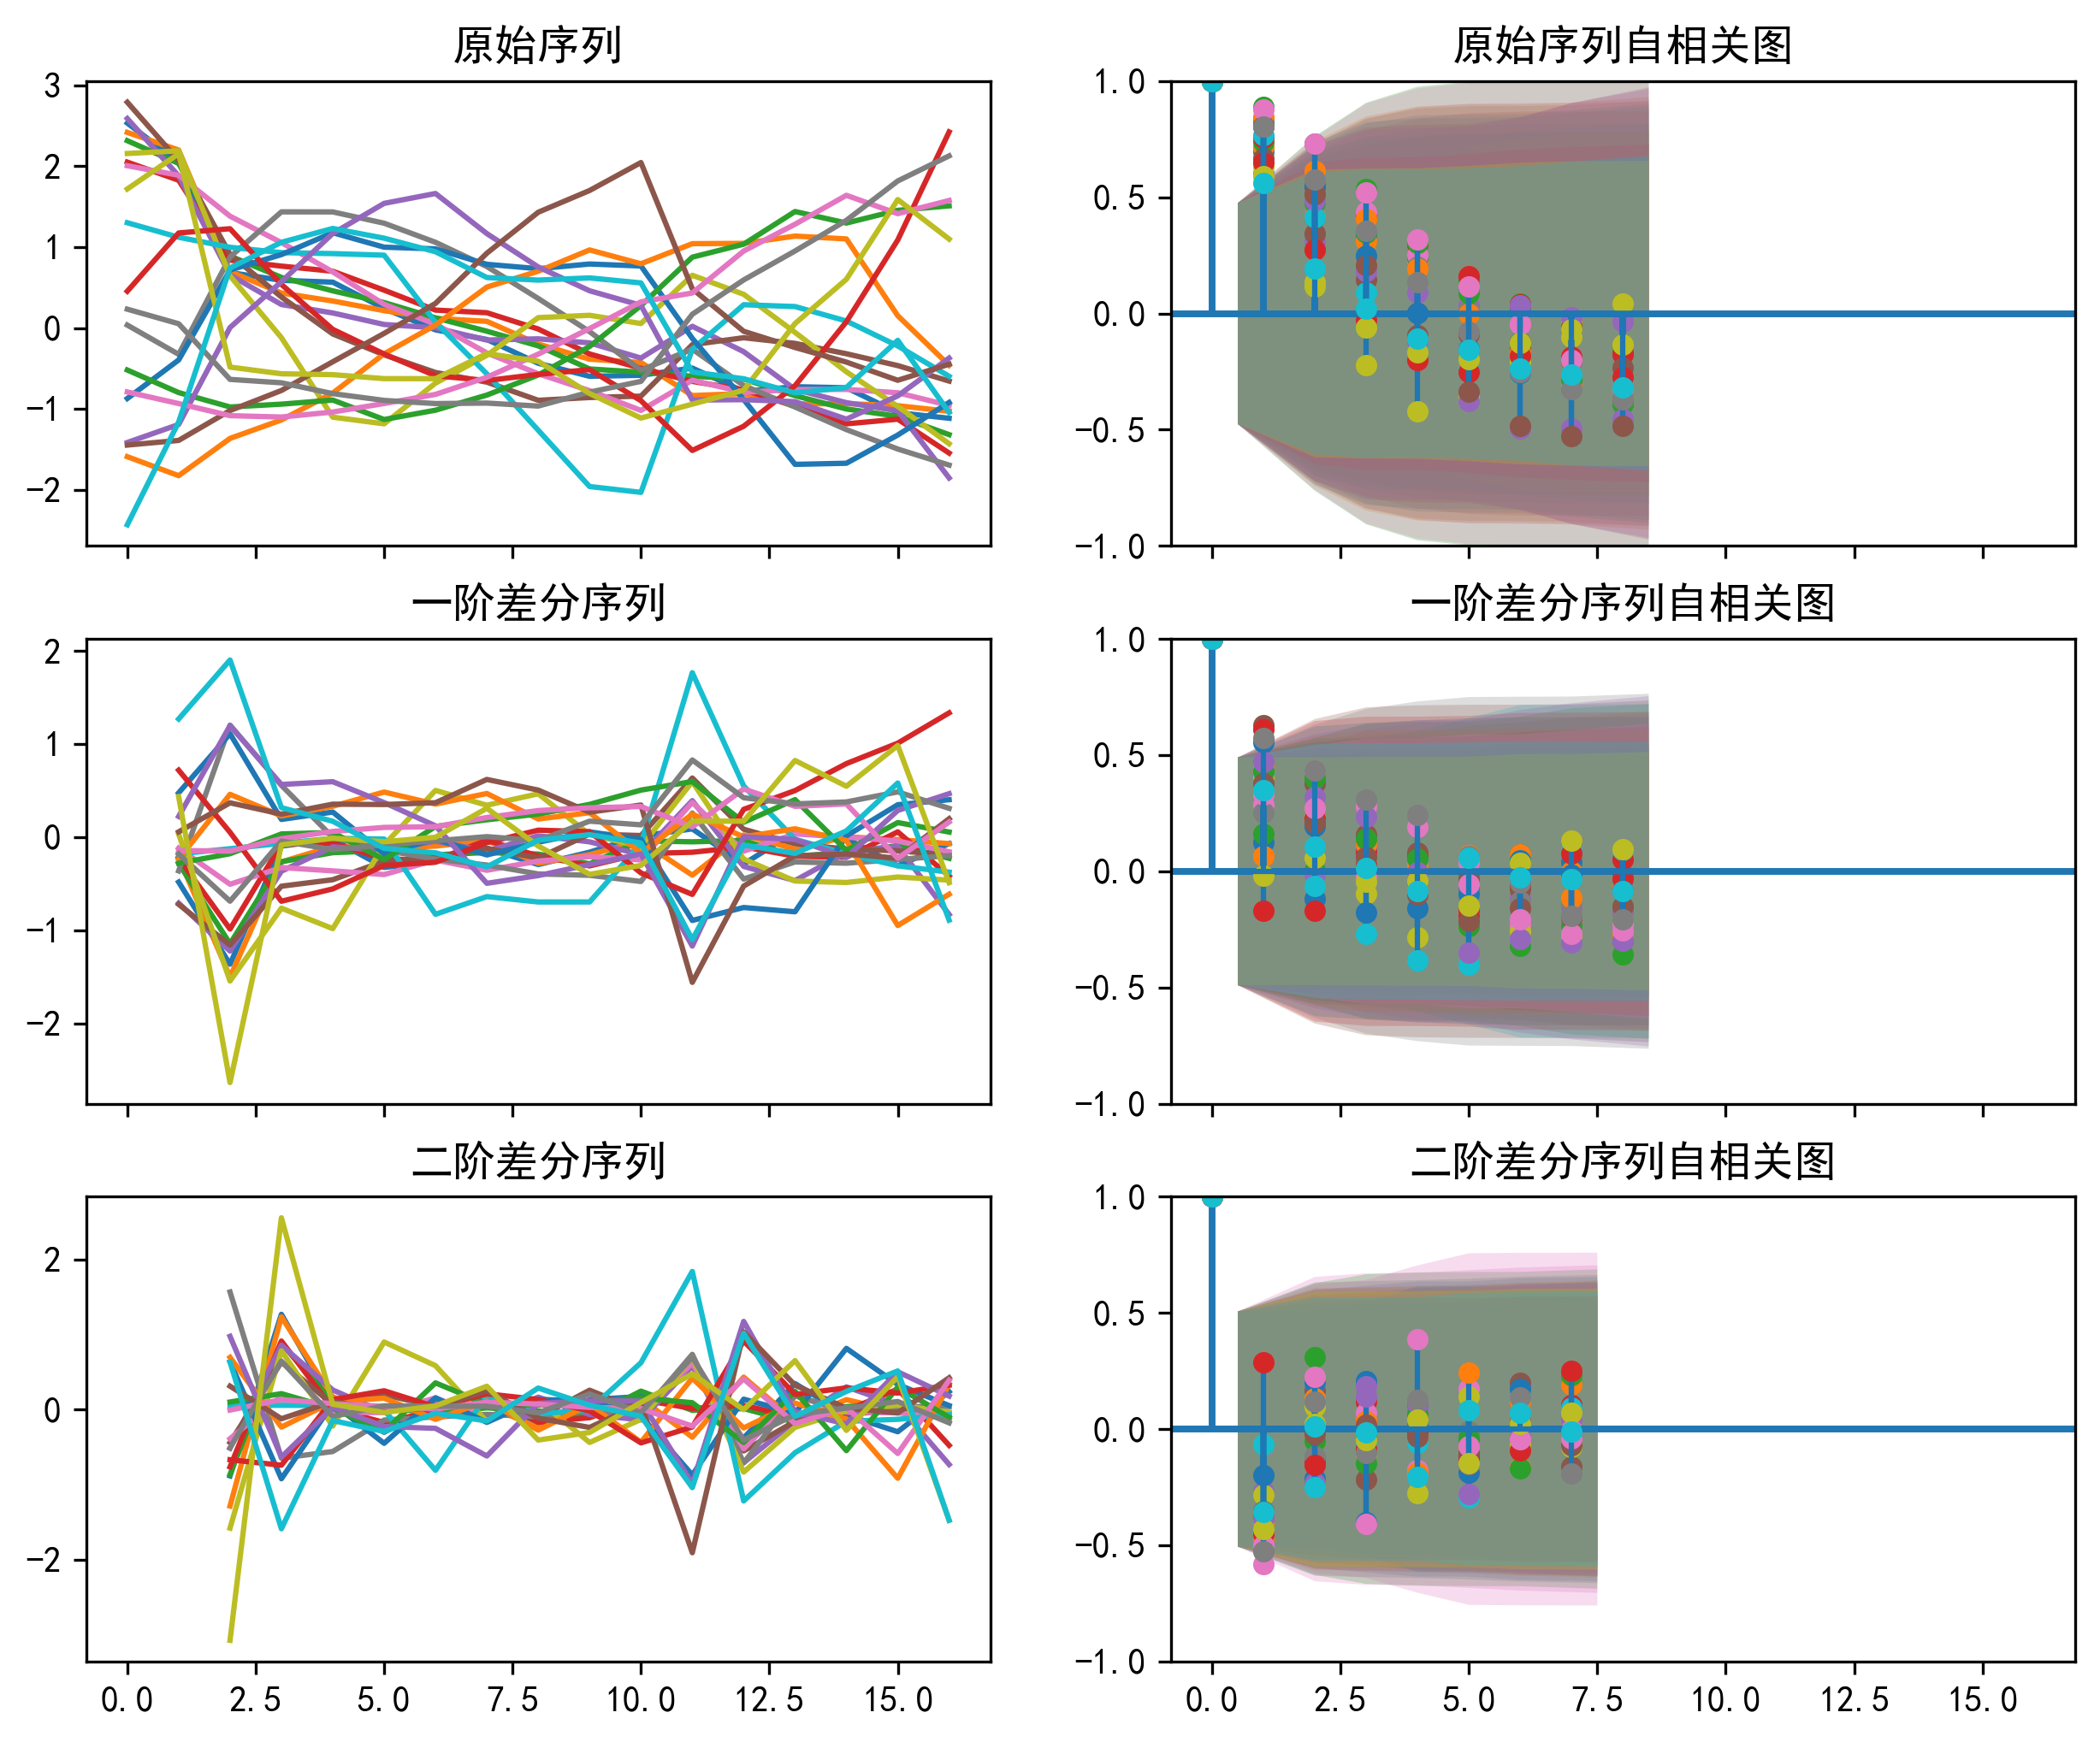

In [207]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10, 8), dpi=300)
for col in train_df.columns[::-1]:
    df = train_df.loc[:, col]
    axes[0, 0].plot(df.values); axes[0, 0].set_title('原始序列')
    plot_acf(df.values, ax=axes[0, 1], title='原始序列自相关图')

    # 1st Differencing
    axes[1, 0].plot(df.diff().values); axes[1, 0].set_title('一阶差分序列')
    plot_acf(df.diff().dropna().values, ax=axes[1, 1], title='一阶差分序列自相关图')

    # 2nd Differencing
    axes[2, 0].plot(df.diff().diff().values), axes[2, 0].set_title('二阶差分序列')
    plot_acf(df.diff().diff().dropna().values, ax=axes[2, 1], title='二阶差分序列自相关图')
plt.show()

根据你提供的图像内容，这似乎是三个时间序列及其自相关函数（ACF）图的文本表示。每个部分分别展示了原始序列、一阶差分后的序列和二阶差分后的序列的自相关性。下面是对这些图的分析：

1. **原始序列（Original Series）**:
   - 从自相关图可以看出，原始序列的自相关值在第一个滞后（即零延迟）是1.0，这符合所有时间序列自相关图的预期，因为任何序列与自身在零延迟时完全相关。
   - 随着滞后的增加，自相关值迅速下降，但仍然保持正值，这表明原始序列可能具有持久性（即自相关性衰减缓慢）。

2. **一阶差分后的序列（1st Order Differencing）**:
   - 一阶差分后的自相关图显示，在第一个滞后（即一阶差分后的零延迟）自相关值接近0.5，这表明差分后的序列仍然存在一定的自相关性。
   - 随着滞后的增加，自相关值进一步下降，但仍然保持正值。这可能表明序列在一阶差分后仍然需要进一步的处理。

3. **二阶差分后的序列（2nd Order Differencing）**:
   - 二阶差分后的自相关图显示，在第一个滞后自相关值接近0.5，与一阶差分后的情况相似。
   - 然而，值得注意的是，自相关图的模式似乎与一阶差分后的模式相似，这可能表明二阶差分并没有显著改变序列的自相关结构。

4. **时间序列图**:
   - 时间序列图显示了序列的波动情况。从图中可以看到，序列在一段时间内呈现出周期性的波动，这可能是季节性因素或其他周期性影响的结果。
   - 序列的值在一定的范围内上下波动，但没有显示出明显的趋势或季节性模式。

**结论**:
- 原始序列的自相关性衰减较慢，表明它可能是非平稳的。
- 一阶和二阶差分后的序列自相关性有所降低，但仍然存在。这可能表明序列可能需要更多的差分或考虑其他形式的转换来实现平稳性。
- 根据自相关图，我们不能直接得出序列是否已经平稳，可能需要进一步的分析，如偏自相关图（PACF）或再次进行ADF检验。

请注意，这些结论是基于文本描述的简化分析，实际分析时需要查看图形并结合其他统计检验。如果你能提供实际的图形文件，我可以提供更具体的分析。


下一步是确定模型是否需要任何自回归（AR）项。我们将通过检查偏自相关（PACF）图来找出所需的AR项的数量。
偏自相关可以想象为系列与其滞后之间的相关性，在排除了中间滞后的贡献之后。因此，PACF在某种程度上传达了滞后和系列之间的纯相关性。这样，我们就可以知道是否需要将该滞后包含在AR项中。
系列的滞后（k）的偏自相关是Y的自回归方程中该滞后的系数。
Yt = α0 + α1Yt−1 + α2Yt−2 + α3Yt−3

也就是说，假设Y_t是当前系列，Y_t-1是Y的滞后1，则滞后3（Y_t-3）的偏自相关是上述方程中Y_t-3的系数α3。

现在，我们应该找出AR项的数量。在平稳系列中的任何自相关都可以通过添加足够的AR项来纠正。因此，我们最初将AR项的阶数设置为PACF图中超过显著性极限的滞后数量。

这段描述解释了在时间序列分析中如何使用偏自相关图来确定自回归模型的阶数。通过观察PACF图中显著不为零的滞后值，可以帮助我们识别需要包含在自回归模型中的滞后项。如果滞后值在某个点之后迅速下降至零，则该点之前的所有滞后都可能是模型中需要的AR项。


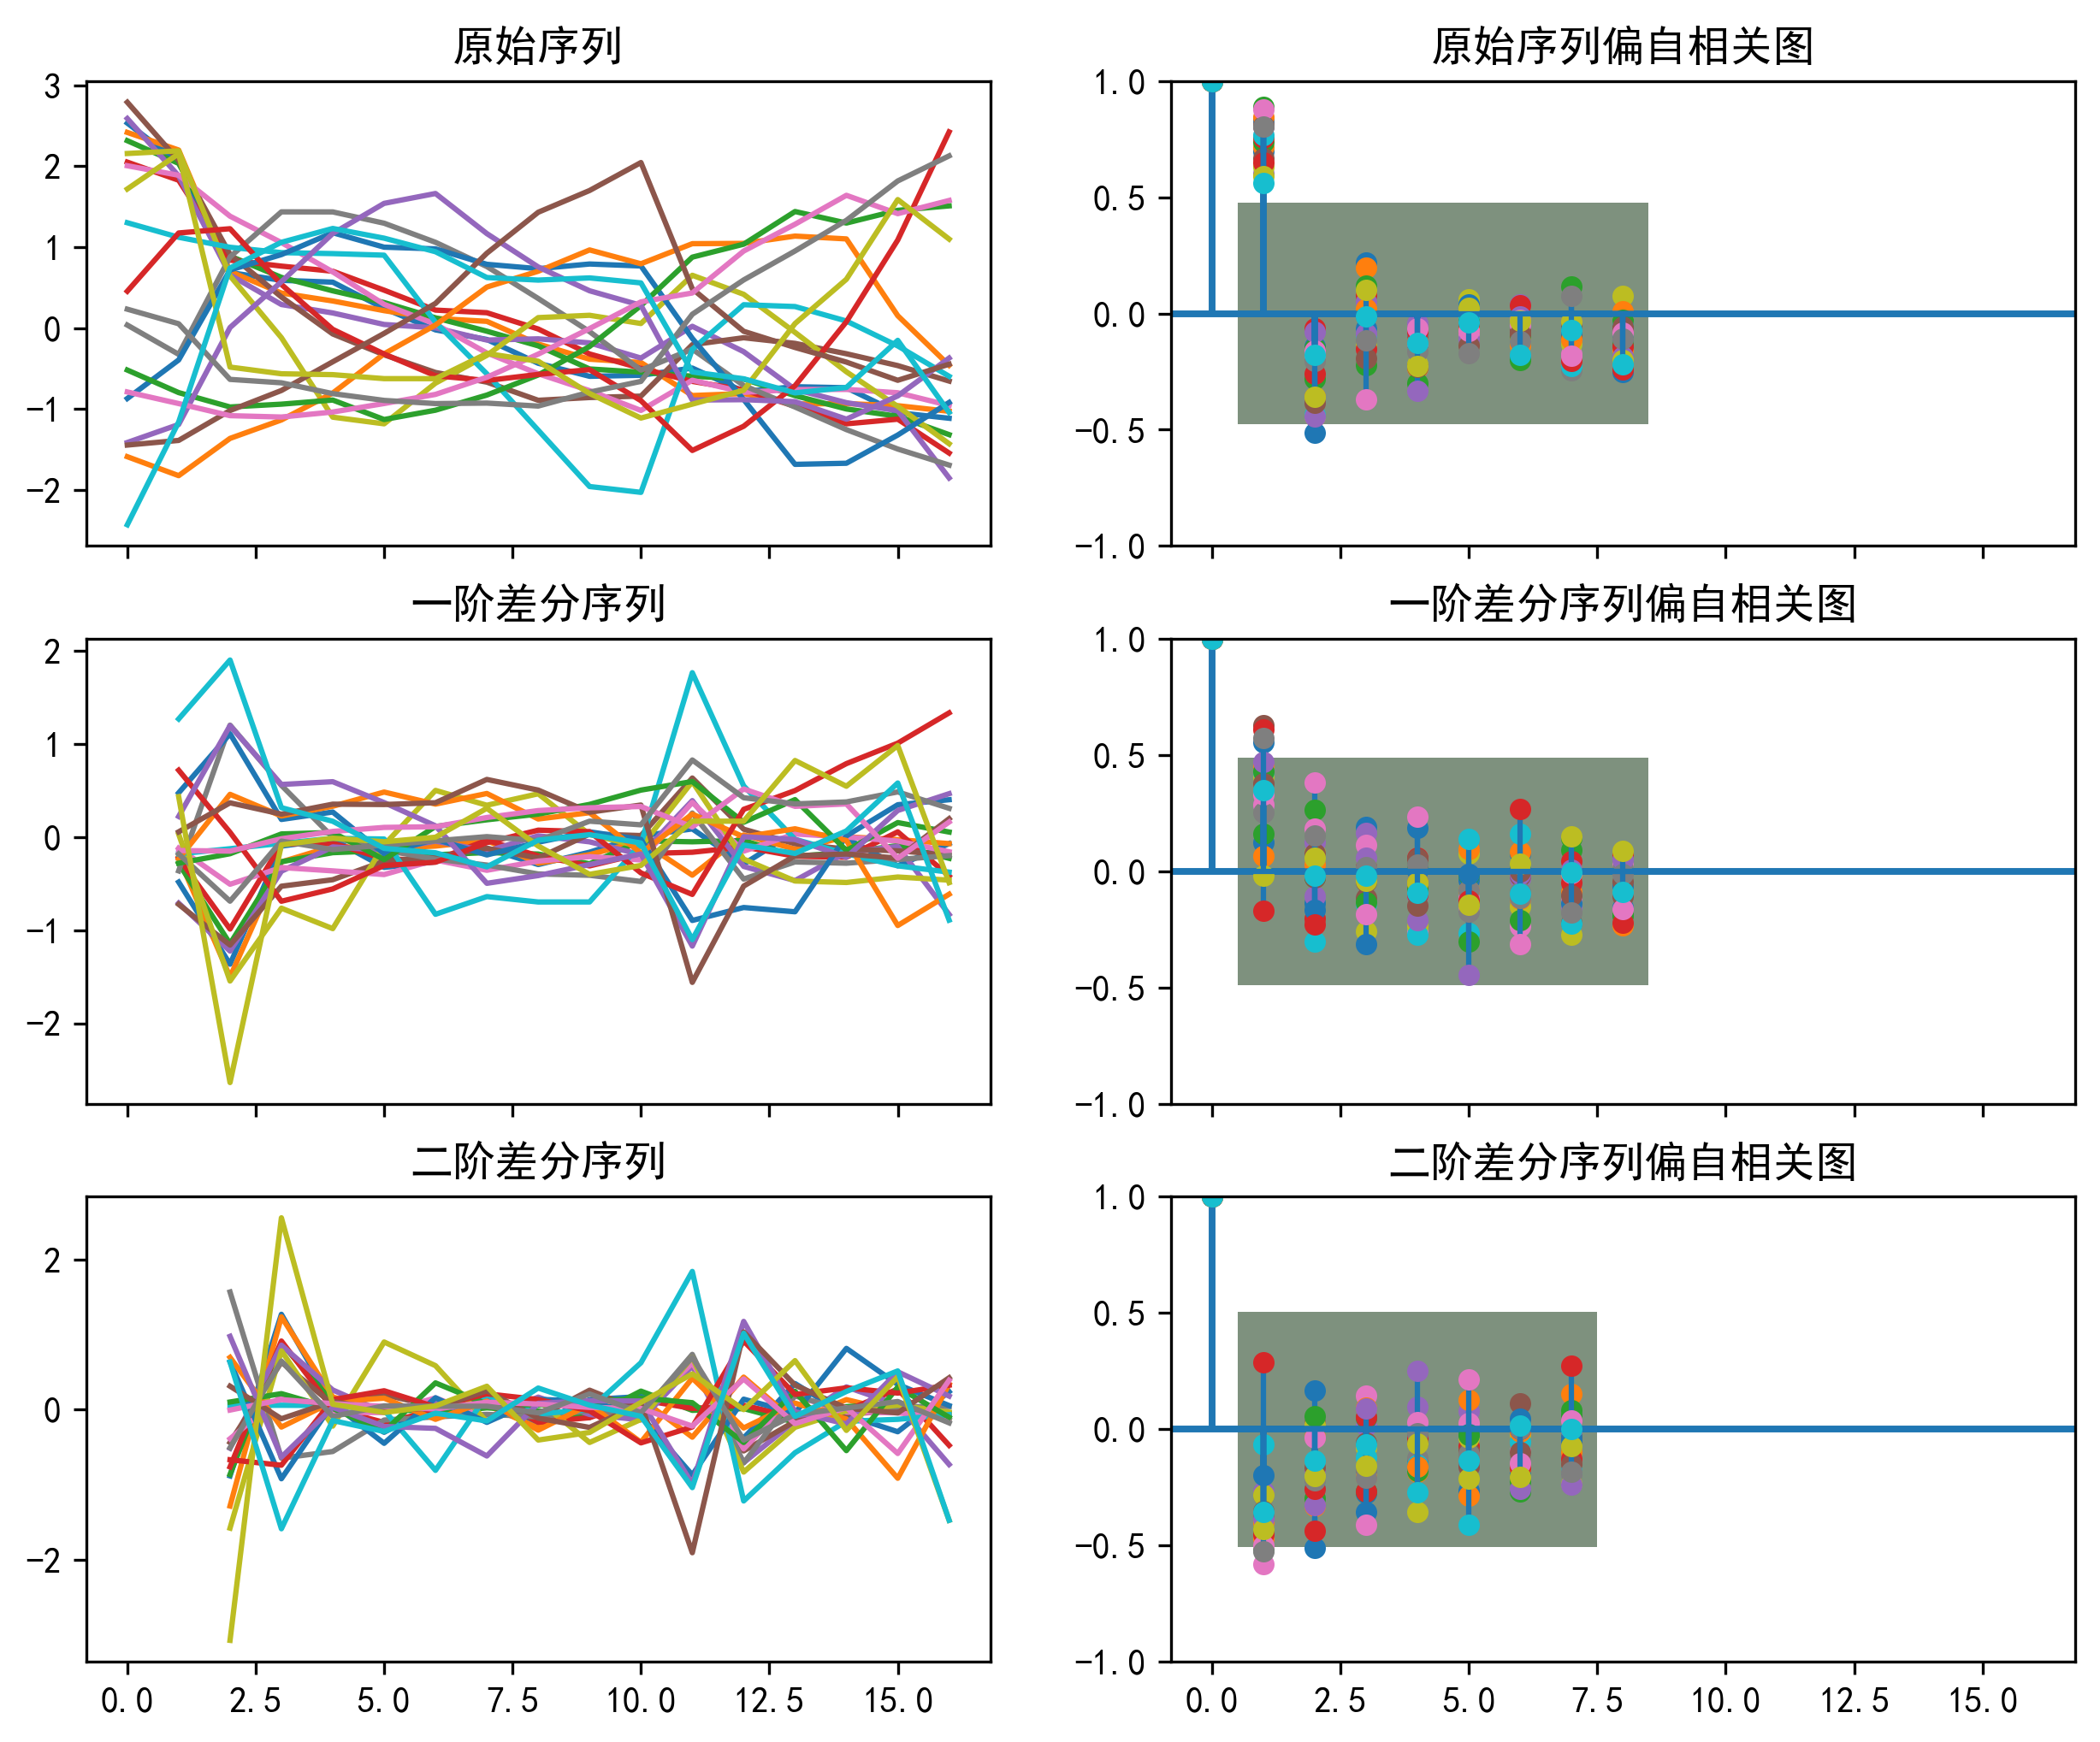

In [208]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10, 8), dpi=300)
for col in train_df.columns[::-1]:
    df = train_df.loc[:, col]
    axes[0, 0].plot(df.values); axes[0, 0].set_title('原始序列')
    plot_pacf(df.values, ax=axes[0, 1], title='原始序列偏自相关图')

    # 1st Differencing
    axes[1, 0].plot(df.diff().values); axes[1, 0].set_title('一阶差分序列')
    plot_pacf(df.diff().dropna().values, ax=axes[1, 1], title='一阶差分序列偏自相关图')

    # 2nd Differencing
    axes[2, 0].plot(df.diff().diff().values), axes[2, 0].set_title('二阶差分序列')
    plot_pacf(df.diff().diff().dropna().values, ax=axes[2, 1], title='二阶差分序列偏自相关图')
plt.show()

根据你提供的文件内容，这是三个时间序列的偏自相关函数（PACF）图的文本表示。偏自相关函数图用于识别时间序列模型的阶数，特别是自回归（AR）部分的阶数。下面是对这些图的分析：

1. **原始序列（Original Series）**:
   - 偏自相关图中，零延迟（即当lag=0时）的值是1.0，这是预期的，因为它代表了序列与其自身的相关性。
   - 随着滞后增加，偏自相关值开始下降，但仍然有一些滞后期的偏自相关值保持在显著水平（例如0.10和0.08），这可能表明原始序列具有一些短期的自相关性。

2. **一阶差分后的序列（1st Order Differencing）**:
   - 一阶差分后的偏自相关图显示，在第一个滞后（lag=1）偏自相关值显著下降，接近0.5，这表明一阶差分后的序列仍然存在一些自相关性。
   - 随着滞后的进一步增加，偏自相关值迅速下降并接近-0.01和-0.5，这可能表明序列在一阶差分后仍需要进一步处理。

3. **二阶差分后的序列（2nd Order Differencing）**:
   - 二阶差分后的偏自相关图显示，在第一个滞后偏自相关值略有下降，但仍然接近0.5，表明序列可能仍存在一些自相关性。
   - 然而，从文本中可以看出，随着滞后的增加，偏自相关值迅速下降并接近零或负值，这可能表明二阶差分后的序列自相关性已经大大减弱。

**结论**:
- 原始序列的偏自相关图表明序列可能需要差分以减少自相关性。
- 一阶差分后的序列仍然显示出一些自相关性，这可能表明需要进一步的差分。
- 二阶差分后的序列偏自相关图显示自相关性已经减弱，这可能表明序列已经接近平稳，或者至少自相关性已经降低到可以接受的水平。

请注意，选择正确的差分阶数应该基于综合考虑ACF和PACF图的结果，以及ADF检验的统计量和p值。此外，偏自相关图的截断（即在滞后大于某个值之后偏自相关迅速下降到零）通常表明可以考虑在这个滞后阶数的AR模型。然而，最终模型的选择还应考虑其他因素，如模型的AIC或BIC值，以及模型的诊断检验结果。


正如我们通过PACF图来确定AR项的数量一样，我们也会通过ACF图来确定MA项的数量。从技术上讲，MA项是滞后预测的误差。

ACF显示了为了在平稳系列中消除任何自相关性需要多少MA项。

让我们来看一下差分系列的自相关图。



In [209]:
adf_p_vals

0-4  \
ADF Statistic                                                          -2.672894   
p-value                                                                 0.078847   
Lags Used                                                                      0   
Number of Observations Used                                                   16   
Critical Values (1%)(5%)(10%)  {'1%': -3.9240193847656246, '5%': -3.068498203...   
icbest                                                                 15.432698   

                                                                             5-9  \
ADF Statistic                                                          -1.864283   
p-value                                                                 0.349046   
Lags Used                                                                      6   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                 10.051519   

                                                                           10-14  \
ADF Statistic                                                           1.219045   
p-value                                                                 0.996115   
Lags Used                                                                      0   
Number of Observations Used                                                   16   
Critical Values (1%)(5%)(10%)  {'1%': -3.9240193847656246, '5%': -3.068498203...   
icbest                                                                  2.544873   

                                                                           15-19  \
ADF Statistic                                                          -2.274257   
p-value                                                                 0.180405   
Lags Used                                                                      6   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                -18.968903   

                                                                           20-24  \
ADF Statistic                                                          -2.111259   
p-value                                                                 0.240012   
Lags Used                                                                      6   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                 20.438823   

                                                                           25-29  \
ADF Statistic                                                          -4.024254   
p-value                                                                 0.001289   
Lags Used                                                                      4   
Number of Observations Used                                                   12   
Critical Values (1%)(5%)(10%)  {'1%': -4.137829282407408, '5%': -3.1549724074...   
icbest                                                                  9.452532   

                                                                           30-34  \
ADF Statistic                                                          -2.073498   
p-value                                                                 0.255304   
Lags Used                                                                      1   
Number of Observations Used                                                   15   
Critical Values (1%)(5%)(10%)  {'1%': -3.9644434814814815, '5%': -3.084908148...   
icbest                                 

In [210]:
diff_1_df = train_df[::-1].diff().dropna()
ADF_P_VALs_1 = {}
for col in diff_1_df.columns:
    result = adfuller(diff_1_df.loc[:, col].values)
    ADF_P_VALs_1[col] = result
adf_p_vals_1 = pd.DataFrame(ADF_P_VALs_1, [
    'ADF Statistic', 'p-value', 'Lags Used', 
    'Number of Observations Used', 
    'Critical Values (1%)(5%)(10%)', 
    'icbest'
])
adf_p_vals_1

0-4  \
ADF Statistic                                                          -2.134742   
p-value                                                                 0.230776   
Lags Used                                                                      0   
Number of Observations Used                                                   15   
Critical Values (1%)(5%)(10%)  {'1%': -3.9644434814814815, '5%': -3.084908148...   
icbest                                                                 18.558152   

                                                                             5-9  \
ADF Statistic                                                           3.306636   
p-value                                                                      1.0   
Lags Used                                                                      6   
Number of Observations Used                                                    9   
Critical Values (1%)(5%)(10%)  {'1%': -4.473135048010974, '5%': -3.2898806035...   
icbest                                                                 -3.788649   

                                                                           10-14  \
ADF Statistic                                                          -0.378649   
p-value                                                                 0.913603   
Lags Used                                                                      1   
Number of Observations Used                                                   14   
Critical Values (1%)(5%)(10%)  {'1%': -4.01203360058309, '5%': -3.10418387755...   
icbest                                                                  0.343505   

                                                                           15-19  \
ADF Statistic                                                           0.000279   
p-value                                                                 0.958555   
Lags Used                                                                      6   
Number of Observations Used                                                    9   
Critical Values (1%)(5%)(10%)  {'1%': -4.473135048010974, '5%': -3.2898806035...   
icbest                                                                -27.248257   

                                                                           20-24  \
ADF Statistic                                                          -7.975201   
p-value                                                                      0.0   
Lags Used                                                                      5   
Number of Observations Used                                                   10   
Critical Values (1%)(5%)(10%)  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}   
icbest                                                                -11.776464   

                                                                           25-29  \
ADF Statistic                                                          -2.200588   
p-value                                                                 0.206032   
Lags Used                                                                      0   
Number of Observations Used                                                   15   
Critical Values (1%)(5%)(10%)  {'1%': -3.9644434814814815, '5%': -3.084908148...   
icbest                                                                 13.258393   

                                                                           30-34  \
ADF Statistic                                                          -9.573743   
p-value                                                                      0.0   
Lags Used                                                                      6   
Number of Observations Used                                                    9   
Critical Values (1%)(5%)(10%)  {'1%': -4.473135048010974, '5%': -3.2898806035...   
icbest                                 

In [211]:
diff_2_df = train_df[::-1].diff().diff().dropna()
ADF_P_VALs_2 = {}
for col in diff_2_df.columns:
    result = adfuller(diff_2_df.loc[:, col].values)
    ADF_P_VALs_2[col] = result
adf_p_vals_2 = pd.DataFrame(ADF_P_VALs_2, [
    'ADF Statistic', 'p-value', 'Lags Used', 
    'Number of Observations Used', 
    'Critical Values (1%)(5%)(10%)', 
    'icbest'
])
adf_p_vals_2

0-4  \
ADF Statistic                                                           -5.83728   
p-value                                                                      0.0   
Lags Used                                                                      0   
Number of Observations Used                                                   14   
Critical Values (1%)(5%)(10%)  {'1%': -4.01203360058309, '5%': -3.10418387755...   
icbest                                                                  18.09647   

                                                                             5-9  \
ADF Statistic                                                          -4.692635   
p-value                                                                 0.000087   
Lags Used                                                                      5   
Number of Observations Used                                                    9   
Critical Values (1%)(5%)(10%)  {'1%': -4.473135048010974, '5%': -3.2898806035...   
icbest                                                                 16.525755   

                                                                           10-14  \
ADF Statistic                                                          -6.628372   
p-value                                                                      0.0   
Lags Used                                                                      0   
Number of Observations Used                                                   14   
Critical Values (1%)(5%)(10%)  {'1%': -4.01203360058309, '5%': -3.10418387755...   
icbest                                                                  1.334081   

                                                                           15-19  \
ADF Statistic                                                          -1.725682   
p-value                                                                 0.417931   
Lags Used                                                                      5   
Number of Observations Used                                                    9   
Critical Values (1%)(5%)(10%)  {'1%': -4.473135048010974, '5%': -3.2898806035...   
icbest                                                                -29.248256   

                                                                           20-24  \
ADF Statistic                                                          -1.741952   
p-value                                                                 0.409637   
Lags Used                                                                      3   
Number of Observations Used                                                   11   
Critical Values (1%)(5%)(10%)  {'1%': -4.223238279489106, '5%': -3.1893689256...   
icbest                                                                 -4.770326   

                                                                           25-29  \
ADF Statistic                                                          -5.116319   
p-value                                                                 0.000013   
Lags Used                                                                      0   
Number of Observations Used                                                   14   
Critical Values (1%)(5%)(10%)  {'1%': -4.01203360058309, '5%': -3.10418387755...   
icbest                                                                 13.440915   

                                                                           30-34  \
ADF Statistic                                                          -1.849642   
p-value                                                                 0.356109   
Lags Used                                                                      1   
Number of Observations Used                                                   13   
Critical Values (1%)(5%)(10%)  {'1%': -4.068853732362312, '5%': -3.1271488757...   
icbest                                 

In [212]:
diff_2_df.head()

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2006 -1.473999 -1.473948 -0.176641  0.389945  0.423674  0.180246  0.325328   
2007  0.515283  0.437596  0.107925 -0.584303 -0.044461  0.503600  0.219995   
2008  0.241708 -0.276688  0.020905  0.025843  0.019684 -0.192010  0.289818   
2009 -0.090349  0.652468 -0.066232 -0.186627  0.325392 -0.028760  0.201761   
2011  1.016831 -0.000102 -0.405714  0.408104  1.034887  1.174862  0.914377   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2006 -0.101863  0.336524  0.053837 -0.067654 -0.033578  0.041525 -0.115658   
2007  0.299392 -0.914436  0.335193 -0.129242  0.058931  0.039221 -0.042787   
2008 -0.546139 -0.125209  0.815363 -0.156190 -0.015949 -0.013269 -0.033118   
2009  0.243530  0.086539 -0.045912 -0.573978 -0.235537  0.183998  0.184824   
2011 -0.437931 -0.244637  0.139013 -1.216684 -0.831958 -0.709746 -0.523618   

         70-74     75-79     80-84     85-89     90-94        95  
2006 -0.044753 -0.730839 -0.475924 -0.136853 -0.043054  0.238726  
2007 -0.018285  0.064035  0.273248  0.074472 -0.030664 -0.295005  
2008 -0.058406  0.302308 -0.011512  0.040026  0.133094 -0.071165  
2009 -0.155397 -0.152378 -0.100346 -0.168718 -0.152881  0.346975  
2011 -0.550518 -0.706985  0.057780  0.013633  0.432671 -0.377824

无外部影响的时序预测

In [213]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [214]:
model_10 = VAR(diff_1_df)
result_10 = model_10.fit(5, method='ols', trend='c')
res_10 = result_10.forecast(train_df[::-1].iloc[:5, :].values, 1)
res_10_df = pd.DataFrame(res_10, index=['2010'], columns=train_df.columns)

train_df = pd.concat([train_df[::-1], res_10_df]).sort_index()

In [215]:
train_df

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2004 -1.042874  1.100359  2.129099  1.577862 -0.446360 -0.370628  2.425327   
2005 -0.151342  1.589059  1.818964  1.414751 -0.645063 -0.838164  1.089225   
2006 -0.733809  0.603811  1.332188  1.641585 -0.420092 -1.125454  0.078451   
2007 -0.800993  0.056158  0.953337  1.284117 -0.239583 -0.909144 -0.712329   
2008 -0.626469 -0.768181  0.595390  0.952491 -0.039390 -0.884844 -1.213290   
2009 -0.542294 -0.940053  0.171211  0.434239  0.486194 -0.889304 -1.512491   
2010 -0.411402 -0.394313  0.418207  0.708752  0.434675 -0.684261 -0.875930   
2011  0.558711 -1.112026 -0.658682  0.324091  2.046665  0.281099 -0.897314   
2012  0.620587 -0.808430 -0.791584 -0.005897  1.700978  0.461420 -0.513264   
2013  0.593519 -0.409353 -0.963748 -0.321768  1.432086  0.755710 -0.572431   
2014  0.625262 -0.314522 -0.927087 -0.607953  0.925823  1.168273 -0.647920   
2015  0.944088 -0.625128 -0.932960 -0.819600  0.305183  1.664055 -0.589122   
2016  1.111769 -0.624773 -0.893828 -0.932278 -0.065266  1.542023 -0.320133   
2017  1.231854 -0.575398 -0.809965 -1.037383 -0.416397  1.170109 -0.015517   
2018  1.060751 -0.564555 -0.676127 -1.099376 -0.771351  0.573601  0.540200   
2019  0.743527 -0.481954 -0.634033 -1.082496 -1.019119  0.007113  1.228523   
2021 -1.160806  2.155358  0.053903 -0.932876 -1.388486 -1.191501  1.176107   
2022 -2.431481  1.719628  0.233921 -0.789509 -1.445820 -1.414361  0.455979   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2004  1.511027 -0.459790 -0.919200 -0.596011 -1.429600 -1.693430 -0.955978   
2005  1.455844  0.153112 -1.321874 -0.220353 -0.968032 -1.494903 -0.799163   
2006  1.298798  1.102539 -1.670711  0.087650 -0.540042 -1.254851 -0.758007   
2007  1.441143  1.137529 -1.684355  0.266412 -0.053122 -0.975577 -0.759637   
2008  1.037349  1.047310 -0.882636  0.288983  0.417849 -0.709572 -0.794386   
2009  0.877086  1.043630 -0.126828 -0.262424  0.653283 -0.259569 -0.644310   
2010  0.927196  0.866887 -0.320982 -0.319778  0.045455 -0.695167 -0.752625   
2011  0.278891  0.795313  0.767991 -2.030515  0.056759 -0.519312 -1.017853   
2012 -0.227199  0.966318  0.792330 -1.958488  0.158451 -0.043382 -0.773367   
2013 -0.579692  0.703084  0.734640 -1.262295  0.129572  0.366144 -0.564513   
2014 -0.827890  0.507395  0.788693 -0.565880 -0.336995  0.761176 -0.307383   
2015 -1.014832  0.037773  0.979621  0.072711 -0.680359  1.060656  0.048311   
2016 -1.130119 -0.318019  1.000521  0.901390 -1.183278  1.296720  0.293685   
2017 -0.889398 -0.803014  1.179140  0.920918 -1.100915  1.436330  0.695231   
2018 -0.940236 -1.135595  0.908718  0.932927 -0.118053  1.437036  1.057332   
2019 -0.975070 -1.363617  0.718029  0.999232  0.644969  0.879715  1.383540   
2021 -0.797329 -1.824214 -0.393738  1.123151  2.191024 -0.324626  1.889312   
2022 -0.518373 -1.589753 -0.870343  1.302590  2.158489  0.037447  2.007185   

         70-74     75-79     80-84     85-89     90-94        95  
2004 -0.654746 -1.852611 -1.544752 -1.316994 -1.028424 -1.114481  
2005 -0.463521 -1.021767 -1.126090 -1.089949 -0.959266 -1.045304  
2006 -0.317049 -0.921762 -1.183352 -0.999758 -0.933161 -0.737401  
2007 -0.188862 -0.757721 -0.967366 -0.835094 -0.937720 -0.724503  
2008 -0.119081 -0.291373 -0.762891 -0.630404 -0.809185 -0.782770  
2009 -0.204697  0.022598 -0.658763 -0.594432 -0.833532 -0.494063  
2010 -0.352405 -0.266960 -0.724473 -0.659308 -0.749733 -0.547939  
2011 -0.840831 -0.370417 -0.496855 -0.544828 -0.425207 -0.583179  
2012 -0.858253 -0.182621 -0.319765 -0.505196 -0.384377 -0.595945  
2013 -0.892479 -0.132637 -0.011109 -0.219341 -0.196749 -0.434705  
2014 -0.668065 -0.147644  0.190158 -0.038289  0.083540 -0.140636  
2015 -0.548450  0.003317  0.222504  0.127052  0.120013 -0.021827  
2016 -0.330234  0.044890  0.468984  0.315806  0.215516  0.243217  
2017 -0.072473  0.187120  0.702981  0.460684  0.335268  0.568063  
2018  0.384529  0.291446  0.766285  0.62

In [216]:
diff_1_df = train_df.diff().dropna()
diff_1_df

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2005  0.891532  0.488700 -0.310135 -0.163111 -0.198703 -0.467536 -1.336102   
2006 -0.582467 -0.985248 -0.486776  0.226834  0.224970 -0.287290 -1.010774   
2007 -0.067184 -0.547652 -0.378851 -0.357469  0.180509  0.216310 -0.790780   
2008  0.174524 -0.824340 -0.357947 -0.331625  0.200193  0.024300 -0.500961   
2009  0.084175 -0.171871 -0.424179 -0.518252  0.525584 -0.004460 -0.299200   
2010  0.130893  0.545739  0.246996  0.274512 -0.051519  0.205043  0.636561   
2011  0.970113 -0.717713 -1.076889 -0.384661  1.611990  0.965360 -0.021384   
2012  0.061876  0.303596 -0.132902 -0.329988 -0.345686  0.180321  0.384050   
2013 -0.027068  0.399077 -0.172164 -0.315870 -0.268892  0.294289 -0.059166   
2014  0.031743  0.094831  0.036661 -0.286186 -0.506264  0.412564 -0.075489   
2015  0.318826 -0.310606 -0.005873 -0.211647 -0.620640  0.495782  0.058798   
2016  0.167681  0.000355  0.039132 -0.112678 -0.370449 -0.122032  0.268989   
2017  0.120085  0.049375  0.083863 -0.105105 -0.351130 -0.371913  0.304616   
2018 -0.171102  0.010844  0.133838 -0.061993 -0.354955 -0.596509  0.555718   
2019 -0.317225  0.082601  0.042094  0.016880 -0.247768 -0.566488  0.688323   
2021 -1.904333  2.637312  0.687937  0.149620 -0.369367 -1.198614 -0.052416   
2022 -1.270675 -0.435730  0.180017  0.143367 -0.057334 -0.222860 -0.720127   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2005 -0.055183  0.612903 -0.402674  0.375658  0.461568  0.198527  0.156814   
2006 -0.157046  0.949426 -0.348837  0.308004  0.427989  0.240053  0.041156   
2007  0.142345  0.034990 -0.013644  0.178761  0.486920  0.279274 -0.001630   
2008 -0.403794 -0.090219  0.801719  0.022572  0.470971  0.266005 -0.034748   
2009 -0.160263 -0.003680  0.755807 -0.551407  0.235434  0.450003  0.150075   
2010  0.050111 -0.176743 -0.194153 -0.057354 -0.607828 -0.435598 -0.108314   
2011 -0.648305 -0.071574  1.088973 -1.710737  0.011304  0.175854 -0.265228   
2012 -0.506090  0.171005  0.024339  0.072027  0.101691  0.475930  0.244485   
2013 -0.352494 -0.263234 -0.057690  0.696193 -0.028879  0.409526  0.208855   
2014 -0.248197 -0.195689  0.054053  0.696415 -0.466567  0.395032  0.257130   
2015 -0.186943 -0.469622  0.190929  0.638591 -0.343363  0.299480  0.355694   
2016 -0.115287 -0.355792  0.020900  0.828679 -0.502920  0.236064  0.245374   
2017  0.240721 -0.484995  0.178619  0.019528  0.082363  0.139610  0.401546   
2018 -0.050837 -0.332581 -0.270422  0.012009  0.982862  0.000706  0.362101   
2019 -0.034834 -0.228022 -0.190689  0.066306  0.763022 -0.557321  0.326208   
2021  0.177740 -0.460597 -1.111767  0.123919  1.546055 -1.204342  0.505773   
2022  0.278957  0.234461 -0.476605  0.179439 -0.032536  0.362074  0.117873   

         70-74     75-79     80-84     85-89     90-94        95  
2005  0.191225  0.830844  0.418662  0.227045  0.069159  0.069177  
2006  0.146472  0.100005 -0.057262  0.090192  0.026105  0.307903  
2007  0.128187  0.164040  0.215986  0.164664 -0.004559  0.012898  
2008  0.069781  0.466348  0.204474  0.204690  0.128535 -0.058267  
2009 -0.085616  0.313970  0.104129  0.035972 -0.024346  0.288708  
2010 -0.147707 -0.289557 -0.065710 -0.064876  0.083799 -0.053876  
2011 -0.488427 -0.103458  0.227619  0.114481  0.324526 -0.035241  
2012 -0.017421  0.187796  0.177090  0.039632  0.040830 -0.012766  
2013 -0.034226  0.049984  0.308656  0.285854  0.187628  0.161240  
2014  0.224414 -0.015008  0.201267  0.181052  0.280289  0.294069  
2015  0.119615  0.150962  0.032347  0.165341  0.036473  0.118808  
2016  0.218215  0.041573  0.246479  0.188754  0.095503  0.265044  
2017  0.257762  0.142230  0.233997  0.144878  0.119752  0.324846  
2018  0.457002  0.104327  0.063304  0.166455  0.098223  0.022602  
2019  0.526813  0.365774  0.074035  0.263516  0.265859  0.095987  
2021  1.159189  1.224122  0.987454  1.145330  1.501932  1.365221  
2022  0.721806  0.709279  0.224164  0.280983  0.217884  0.4824

In [217]:
model_20 = VAR(diff_1_df)
result_20 = model_20.fit(10, method='ols', trend='c')
res_20 = result_20.forecast(train_df[::-1].iloc[:16, :].values, 1)
res_20_df = pd.DataFrame(res_20, index=['2020'], columns=train_df.columns)

train_df = pd.concat([train_df[::-1], res_20_df]).sort_index()

In [218]:
train_df

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2004 -1.042874  1.100359  2.129099  1.577862 -0.446360 -0.370628  2.425327   
2005 -0.151342  1.589059  1.818964  1.414751 -0.645063 -0.838164  1.089225   
2006 -0.733809  0.603811  1.332188  1.641585 -0.420092 -1.125454  0.078451   
2007 -0.800993  0.056158  0.953337  1.284117 -0.239583 -0.909144 -0.712329   
2008 -0.626469 -0.768181  0.595390  0.952491 -0.039390 -0.884844 -1.213290   
2009 -0.542294 -0.940053  0.171211  0.434239  0.486194 -0.889304 -1.512491   
2010 -0.411402 -0.394313  0.418207  0.708752  0.434675 -0.684261 -0.875930   
2011  0.558711 -1.112026 -0.658682  0.324091  2.046665  0.281099 -0.897314   
2012  0.620587 -0.808430 -0.791584 -0.005897  1.700978  0.461420 -0.513264   
2013  0.593519 -0.409353 -0.963748 -0.321768  1.432086  0.755710 -0.572431   
2014  0.625262 -0.314522 -0.927087 -0.607953  0.925823  1.168273 -0.647920   
2015  0.944088 -0.625128 -0.932960 -0.819600  0.305183  1.664055 -0.589122   
2016  1.111769 -0.624773 -0.893828 -0.932278 -0.065266  1.542023 -0.320133   
2017  1.231854 -0.575398 -0.809965 -1.037383 -0.416397  1.170109 -0.015517   
2018  1.060751 -0.564555 -0.676127 -1.099376 -0.771351  0.573601  0.540200   
2019  0.743527 -0.481954 -0.634033 -1.082496 -1.019119  0.007113  1.228523   
2020  0.469443 -0.692342 -0.148573 -0.042034  0.078142  0.150925  0.072777   
2021 -1.160806  2.155358  0.053903 -0.932876 -1.388486 -1.191501  1.176107   
2022 -2.431481  1.719628  0.233921 -0.789509 -1.445820 -1.414361  0.455979   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2004  1.511027 -0.459790 -0.919200 -0.596011 -1.429600 -1.693430 -0.955978   
2005  1.455844  0.153112 -1.321874 -0.220353 -0.968032 -1.494903 -0.799163   
2006  1.298798  1.102539 -1.670711  0.087650 -0.540042 -1.254851 -0.758007   
2007  1.441143  1.137529 -1.684355  0.266412 -0.053122 -0.975577 -0.759637   
2008  1.037349  1.047310 -0.882636  0.288983  0.417849 -0.709572 -0.794386   
2009  0.877086  1.043630 -0.126828 -0.262424  0.653283 -0.259569 -0.644310   
2010  0.927196  0.866887 -0.320982 -0.319778  0.045455 -0.695167 -0.752625   
2011  0.278891  0.795313  0.767991 -2.030515  0.056759 -0.519312 -1.017853   
2012 -0.227199  0.966318  0.792330 -1.958488  0.158451 -0.043382 -0.773367   
2013 -0.579692  0.703084  0.734640 -1.262295  0.129572  0.366144 -0.564513   
2014 -0.827890  0.507395  0.788693 -0.565880 -0.336995  0.761176 -0.307383   
2015 -1.014832  0.037773  0.979621  0.072711 -0.680359  1.060656  0.048311   
2016 -1.130119 -0.318019  1.000521  0.901390 -1.183278  1.296720  0.293685   
2017 -0.889398 -0.803014  1.179140  0.920918 -1.100915  1.436330  0.695231   
2018 -0.940236 -1.135595  0.908718  0.932927 -0.118053  1.437036  1.057332   
2019 -0.975070 -1.363617  0.718029  0.999232  0.644969  0.879715  1.383540   
2020  0.059607  0.057063  0.299395 -0.268145 -0.137195  0.337215 -0.057848   
2021 -0.797329 -1.824214 -0.393738  1.123151  2.191024 -0.324626  1.889312   
2022 -0.518373 -1.589753 -0.870343  1.302590  2.158489  0.037447  2.007185   

         70-74     75-79     80-84     85-89     90-94        95  
2004 -0.654746 -1.852611 -1.544752 -1.316994 -1.028424 -1.114481  
2005 -0.463521 -1.021767 -1.126090 -1.089949 -0.959266 -1.045304  
2006 -0.317049 -0.921762 -1.183352 -0.999758 -0.933161 -0.737401  
2007 -0.188862 -0.757721 -0.967366 -0.835094 -0.937720 -0.724503  
2008 -0.119081 -0.291373 -0.762891 -0.630404 -0.809185 -0.782770  
2009 -0.204697  0.022598 -0.658763 -0.594432 -0.833532 -0.494063  
2010 -0.352405 -0.266960 -0.724473 -0.659308 -0.749733 -0.547939  
2011 -0.840831 -0.370417 -0.496855 -0.544828 -0.425207 -0.583179  
2012 -0.858253 -0.182621 -0.319765 -0.505196 -0.384377 -0.595945  
2013 -0.892479 -0.132637 -0.011109 -0.219341 -0.196749 -0.434705  
2014 -0.668065 -0.147644  0.190158 -0.038289  0.083540 -0.140636  
2015 -0.548450  0.003317  0.222504  0.127052  0.120013 -0.021827  
2016 -0.330234  0.

In [219]:
diff_1_df = train_df.diff().dropna()
diff_1_df

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2005  0.891532  0.488700 -0.310135 -0.163111 -0.198703 -0.467536 -1.336102   
2006 -0.582467 -0.985248 -0.486776  0.226834  0.224970 -0.287290 -1.010774   
2007 -0.067184 -0.547652 -0.378851 -0.357469  0.180509  0.216310 -0.790780   
2008  0.174524 -0.824340 -0.357947 -0.331625  0.200193  0.024300 -0.500961   
2009  0.084175 -0.171871 -0.424179 -0.518252  0.525584 -0.004460 -0.299200   
2010  0.130893  0.545739  0.246996  0.274512 -0.051519  0.205043  0.636561   
2011  0.970113 -0.717713 -1.076889 -0.384661  1.611990  0.965360 -0.021384   
2012  0.061876  0.303596 -0.132902 -0.329988 -0.345686  0.180321  0.384050   
2013 -0.027068  0.399077 -0.172164 -0.315870 -0.268892  0.294289 -0.059166   
2014  0.031743  0.094831  0.036661 -0.286186 -0.506264  0.412564 -0.075489   
2015  0.318826 -0.310606 -0.005873 -0.211647 -0.620640  0.495782  0.058798   
2016  0.167681  0.000355  0.039132 -0.112678 -0.370449 -0.122032  0.268989   
2017  0.120085  0.049375  0.083863 -0.105105 -0.351130 -0.371913  0.304616   
2018 -0.171102  0.010844  0.133838 -0.061993 -0.354955 -0.596509  0.555718   
2019 -0.317225  0.082601  0.042094  0.016880 -0.247768 -0.566488  0.688323   
2020 -0.274084 -0.210388  0.485460  1.040462  1.097262  0.143812 -1.155745   
2021 -1.630249  2.847700  0.202476 -0.890842 -1.466629 -1.342426  1.103329   
2022 -1.270675 -0.435730  0.180017  0.143367 -0.057334 -0.222860 -0.720127   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2005 -0.055183  0.612903 -0.402674  0.375658  0.461568  0.198527  0.156814   
2006 -0.157046  0.949426 -0.348837  0.308004  0.427989  0.240053  0.041156   
2007  0.142345  0.034990 -0.013644  0.178761  0.486920  0.279274 -0.001630   
2008 -0.403794 -0.090219  0.801719  0.022572  0.470971  0.266005 -0.034748   
2009 -0.160263 -0.003680  0.755807 -0.551407  0.235434  0.450003  0.150075   
2010  0.050111 -0.176743 -0.194153 -0.057354 -0.607828 -0.435598 -0.108314   
2011 -0.648305 -0.071574  1.088973 -1.710737  0.011304  0.175854 -0.265228   
2012 -0.506090  0.171005  0.024339  0.072027  0.101691  0.475930  0.244485   
2013 -0.352494 -0.263234 -0.057690  0.696193 -0.028879  0.409526  0.208855   
2014 -0.248197 -0.195689  0.054053  0.696415 -0.466567  0.395032  0.257130   
2015 -0.186943 -0.469622  0.190929  0.638591 -0.343363  0.299480  0.355694   
2016 -0.115287 -0.355792  0.020900  0.828679 -0.502920  0.236064  0.245374   
2017  0.240721 -0.484995  0.178619  0.019528  0.082363  0.139610  0.401546   
2018 -0.050837 -0.332581 -0.270422  0.012009  0.982862  0.000706  0.362101   
2019 -0.034834 -0.228022 -0.190689  0.066306  0.763022 -0.557321  0.326208   
2020  1.034677  1.420680 -0.418634 -1.267378 -0.782164 -0.542500 -1.441387   
2021 -0.856937 -1.881277 -0.693133  1.391296  2.328219 -0.661841  1.947160   
2022  0.278957  0.234461 -0.476605  0.179439 -0.032536  0.362074  0.117873   

         70-74     75-79     80-84     85-89     90-94        95  
2005  0.191225  0.830844  0.418662  0.227045  0.069159  0.069177  
2006  0.146472  0.100005 -0.057262  0.090192  0.026105  0.307903  
2007  0.128187  0.164040  0.215986  0.164664 -0.004559  0.012898  
2008  0.069781  0.466348  0.204474  0.204690  0.128535 -0.058267  
2009 -0.085616  0.313970  0.104129  0.035972 -0.024346  0.288708  
2010 -0.147707 -0.289557 -0.065710 -0.064876  0.083799 -0.053876  
2011 -0.488427 -0.103458  0.227619  0.114481  0.324526 -0.035241  
2012 -0.017421  0.187796  0.177090  0.039632  0.040830 -0.012766  
2013 -0.034226  0.049984  0.308656  0.285854  0.187628  0.161240  
2014  0.224414 -0.015008  0.201267  0.181052  0.280289  0.294069  
2015  0.119615  0.150962  0.032347  0.165341  0.036473  0.118808  
2016  0.218215  0.041573  0.246479  0.188754  0.095503  0.265044  
2017  0.257762  0.142230  0.233997  0.144878  0.119752  0.324846  
2018  0.457002  0.104327  0.063304  0.166455  0.098223  0.022602  
2019  0.526813  0.365774  0.074035  0.26

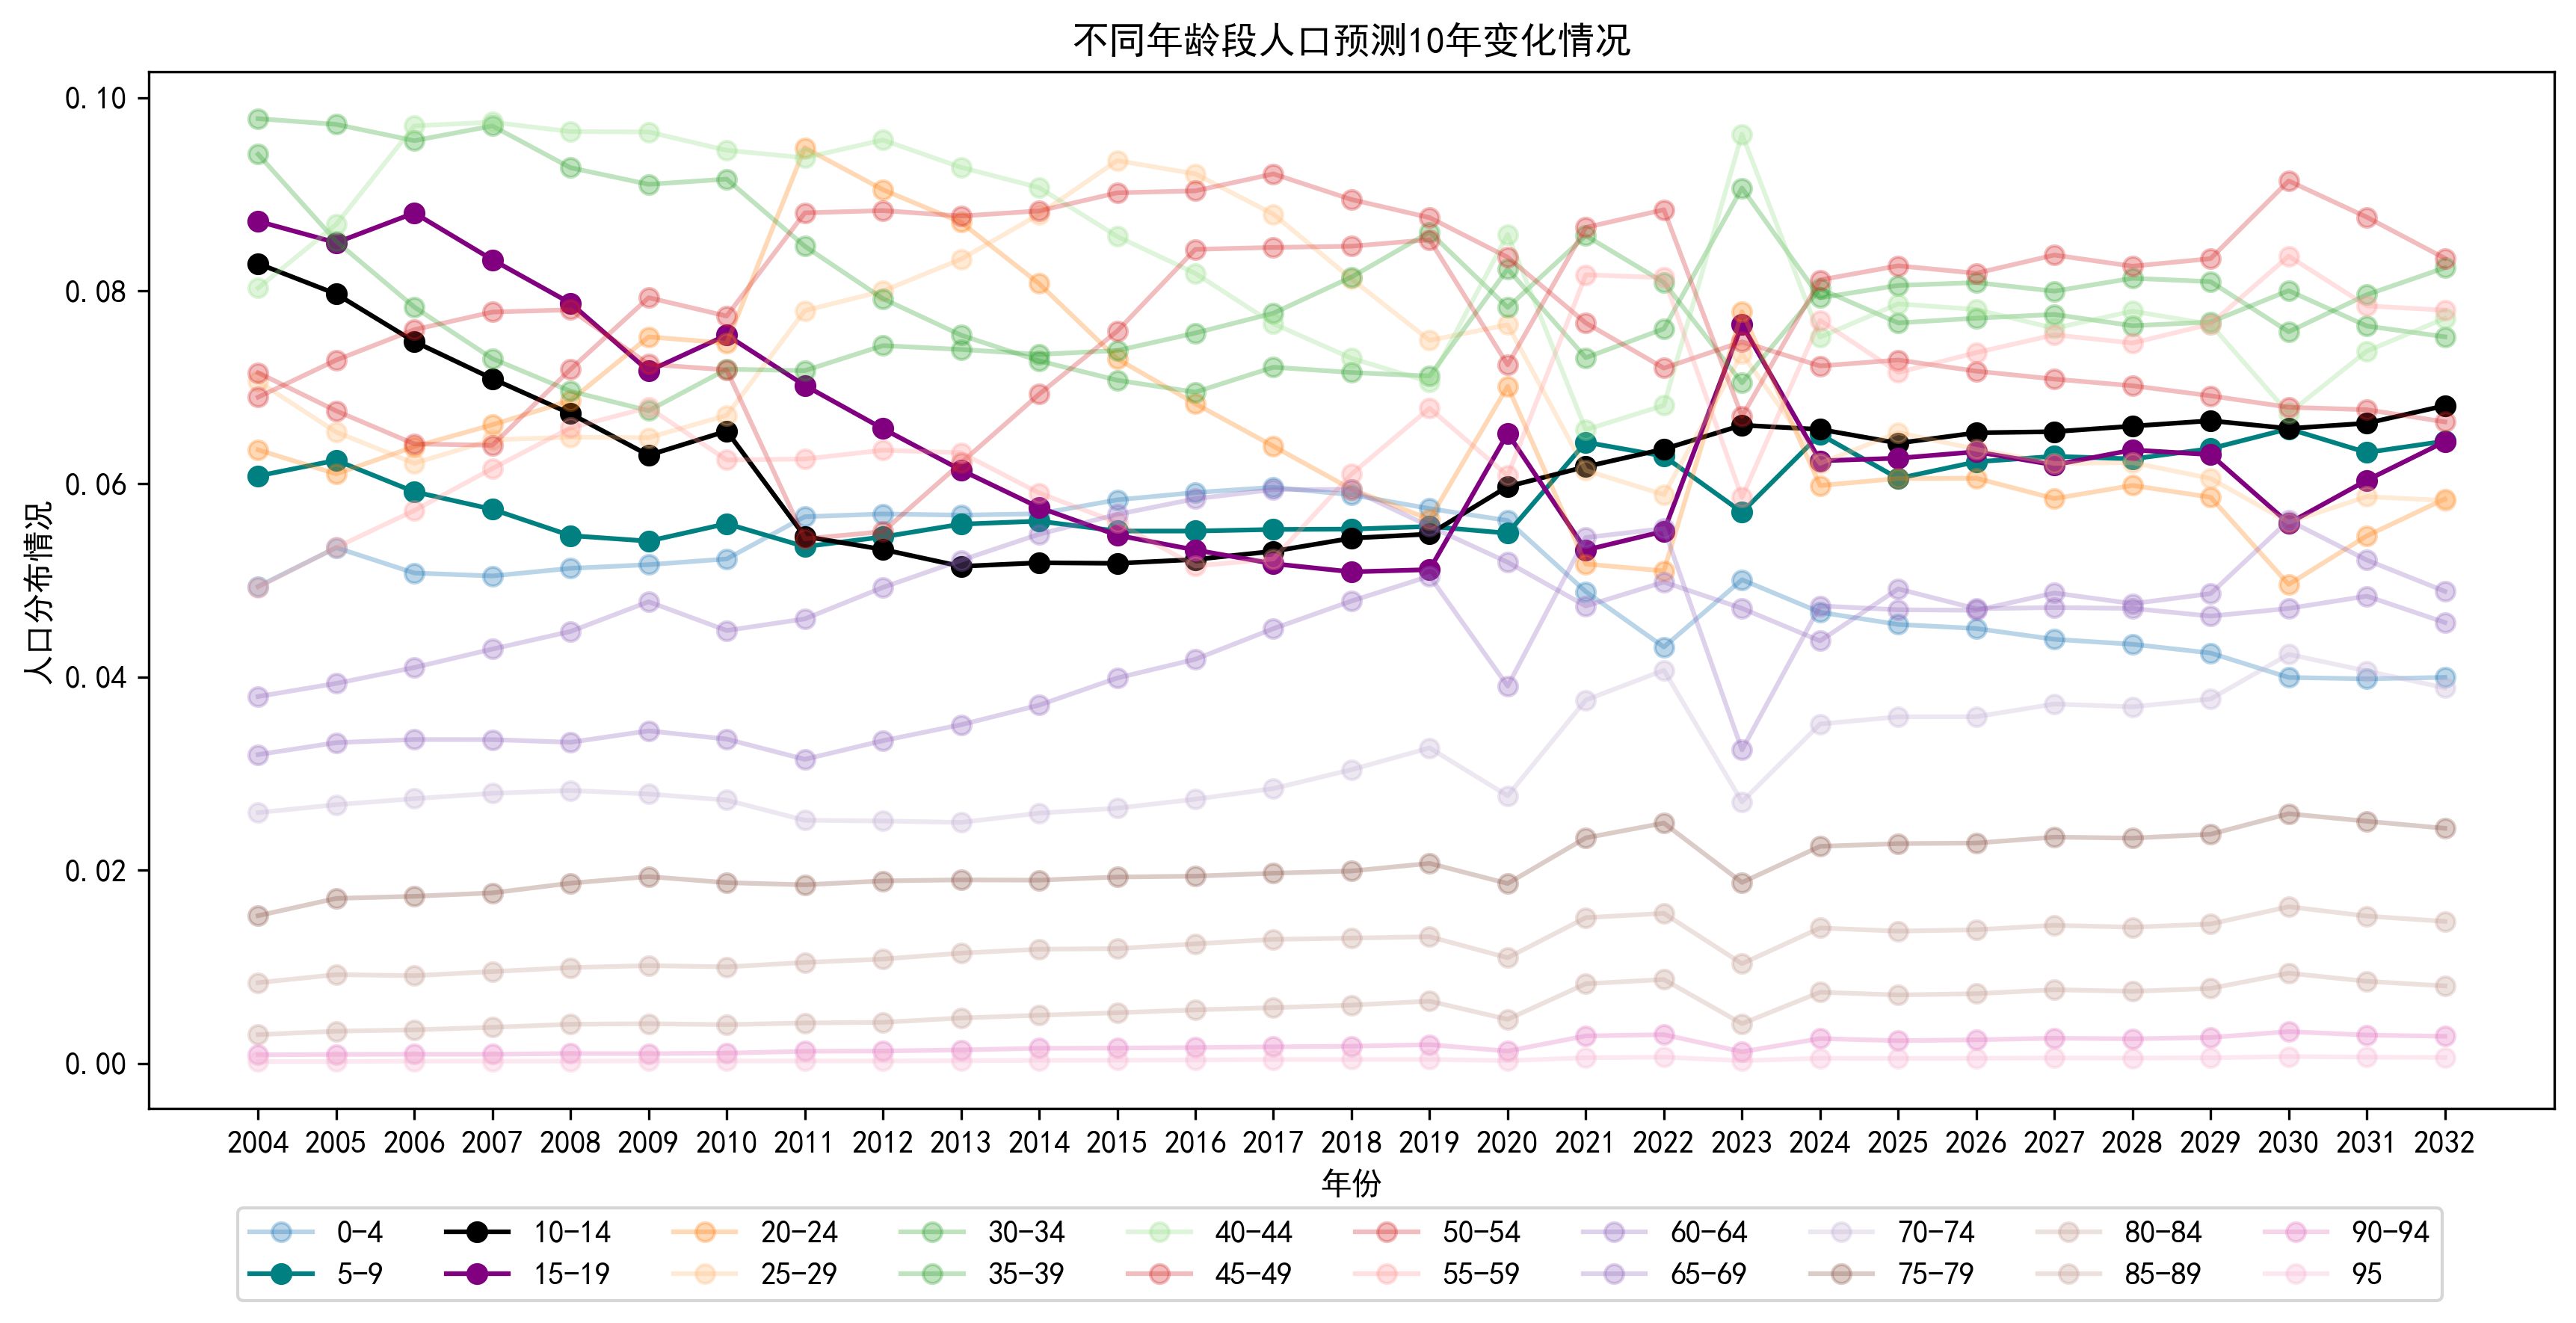

In [220]:
model = VAR(diff_1_df)
result = model.fit(15, method='ols', trend='ctt')

res = result.forecast(train_df.values, 10)

first = 2023
predicted_df = pd.DataFrame(res, columns=train_df.columns, index=range(first, first + len(res)))
res_df = pd.concat([train_df, predicted_df])
index = train_df.index.append(predicted_df.index)
res_df = pd.DataFrame(
    std.inverse_transform(res_df), 
    index=index, 
    columns=train_df.columns
)

tgt_cols = ['5-9', '10-14', '15-19']
tgt_color = {col: color for col, color in zip(tgt_cols, ['teal', 'black', 'purple'])}
plt.figure(figsize=(12, 6), dpi=300)
for i, (index, row) in enumerate(res_df.T.iterrows()):
    x = [index for index in row.index]
    y = row.values.reshape(-1, 1)
    if index in tgt_cols:
        plt.plot(x, y, marker='o', label=index, color=tgt_color[index])
    else:
        plt.plot(x, y, marker='o', label=index, color=cmap(i / len(y)), alpha=0.3)

plt.legend(loc='lower right', bbox_to_anchor=(0.96, -0.2), ncol=10)

plt.title('不同年龄段人口预测10年变化情况')
plt.xlabel('年份')
plt.ylabel('人口分布情况')

plt.tight_layout()

plt.show()

In [222]:
res_df

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2004  0.049378  0.060828  0.082814  0.087193  0.063527  0.070619  0.094132   
2005  0.053404  0.062444  0.079670  0.084982  0.061035  0.065366  0.085125   
2006  0.050774  0.059185  0.074737  0.088057  0.063857  0.062138  0.078310   
2007  0.050470  0.057373  0.070897  0.083211  0.066121  0.064568  0.072979   
2008  0.051258  0.054646  0.067269  0.078715  0.068633  0.064841  0.069602   
2009  0.051638  0.054078  0.062970  0.071688  0.075226  0.064791  0.067585   
2010  0.052229  0.055883  0.065473  0.075410  0.074580  0.067095  0.071876   
2011  0.056610  0.053509  0.054559  0.070195  0.094801  0.077941  0.071732   
2012  0.056889  0.054513  0.053212  0.065721  0.090465  0.079967  0.074321   
2013  0.056767  0.055833  0.051467  0.061439  0.087091  0.083274  0.073922   
2014  0.056910  0.056147  0.051838  0.057559  0.080741  0.087909  0.073413   
2015  0.058350  0.055120  0.051779  0.054689  0.072955  0.093479  0.073810   
2016  0.059107  0.055121  0.052175  0.053161  0.068308  0.092108  0.075623   
2017  0.059649  0.055284  0.053025  0.051736  0.063903  0.087930  0.077677   
2018  0.058877  0.055320  0.054382  0.050896  0.059451  0.081228  0.081423   
2019  0.057444  0.055593  0.054808  0.051125  0.056342  0.074863  0.086064   
2020  0.056207  0.054897  0.059729  0.065231  0.070107  0.076479  0.078272   
2021  0.048846  0.064318  0.061781  0.053153  0.051709  0.061396  0.085710   
2022  0.043108  0.062876  0.063605  0.055097  0.050990  0.058892  0.080855   
2023  0.050080  0.057069  0.066078  0.076499  0.077842  0.073491  0.070475   
2024  0.046707  0.065136  0.065646  0.062389  0.059832  0.062135  0.080206   
2025  0.045449  0.060569  0.064222  0.062667  0.060564  0.065314  0.076673   
2026  0.045030  0.062290  0.065295  0.063327  0.060589  0.063590  0.077162   
2027  0.043909  0.062857  0.065409  0.061966  0.058482  0.062121  0.077549   
2028  0.043399  0.062589  0.065985  0.063515  0.059843  0.062204  0.076379   
2029  0.042492  0.063653  0.066543  0.063038  0.058620  0.060566  0.076757   
2030  0.039959  0.065706  0.065741  0.055925  0.049594  0.056031  0.080013   
2031  0.039816  0.063253  0.066286  0.060378  0.054616  0.058685  0.076353   
2032  0.039966  0.064428  0.068099  0.064373  0.058443  0.058284  0.075233   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2004  0.097819  0.080279  0.071512  0.068981  0.049299  0.037986  0.031971   
2005  0.097228  0.086869  0.067561  0.072822  0.053423  0.039345  0.033210   
2006  0.095544  0.097077  0.064139  0.075970  0.057247  0.040989  0.033535   
2007  0.097070  0.097454  0.064005  0.077798  0.061598  0.042901  0.033522   
2008  0.092741  0.096484  0.071871  0.078028  0.065806  0.044722  0.033248   
2009  0.091023  0.096444  0.079286  0.072391  0.067910  0.047803  0.034433   
2010  0.091560  0.094544  0.077381  0.071805  0.062479  0.044821  0.033577   
2011  0.084609  0.093774  0.088065  0.054317  0.062580  0.046025  0.031482   
2012  0.079183  0.095613  0.088304  0.055053  0.063488  0.049283  0.033414   
2013  0.075404  0.092782  0.087738  0.062170  0.063230  0.052087  0.035063   
2014  0.072743  0.090678  0.088268  0.069289  0.059062  0.054792  0.037094   
2015  0.070738  0.085629  0.090141  0.075817  0.055994  0.056842  0.039904   
2016  0.069502  0.081803  0.090347  0.084289  0.051500  0.058458  0.041842   
2017  0.072083  0.076589  0.092099  0.084488  0.052236  0.059414  0.045014   
2018  0.071538  0.073013  0.089446  0.084611  0.061018  0.059419  0.047874   
2019  0.071165  0.070561  0.087575  0.085289  0.067836  0.055603  0.050451   
2020  0.082258  0.085836  0.083468  0.072333  0.060847  0.051889  0.039065   
2021  0.073070  0.065609  0.076667  0.086556  0.081650  0.047358  0.054446   
2022  0.076061  0.068130  0.071991  0.088390  0.081359  0.049837  0.055377   
2023  0.090636  0.096212  0.074715  0.066995  0.058606  0.047115  0.032462   
2024  0.079266  0.075200  0.0722

In [223]:
rate_df = br_dr_ngr_df[::-1].copy()
std2 = StandardScaler()
r_df = pd.DataFrame(std2.fit_transform(rate_df), columns=rate_df.columns, index=[idx.split('年')[0] for idx in rate_df.index])
r_df

指标    人口出生率(‰)  人口死亡率(‰)  人口自然增长率(‰)
2004  0.385557 -2.287694    0.624247
2005  0.433861 -1.967736    0.632453
2006  0.297731 -0.901213    0.382180
2007  0.302122 -0.474603    0.337048
2008  0.319687 -0.012443    0.300123
2009  0.236252  0.058659    0.213963
2010  0.214296  0.165311    0.181140
2011  0.815905  0.271964    0.730921
2012  1.386775  0.236413    1.264291
2013  0.710514  0.236413    0.636556
2014  1.061818  0.200862    0.968886
2015  0.253818  0.023108    0.238580
2016  0.947644 -0.083544    0.895035
2017  0.539253 -0.012443    0.505265
2018 -0.242400  0.058659   -0.233247
2019 -0.440009  0.094210   -0.421977
2020 -1.269966  0.023108   -1.189209
2021 -1.709097  0.414167   -1.644624
2022 -2.038445  1.089632   -2.030291
2023 -2.205315  2.867172   -2.391341

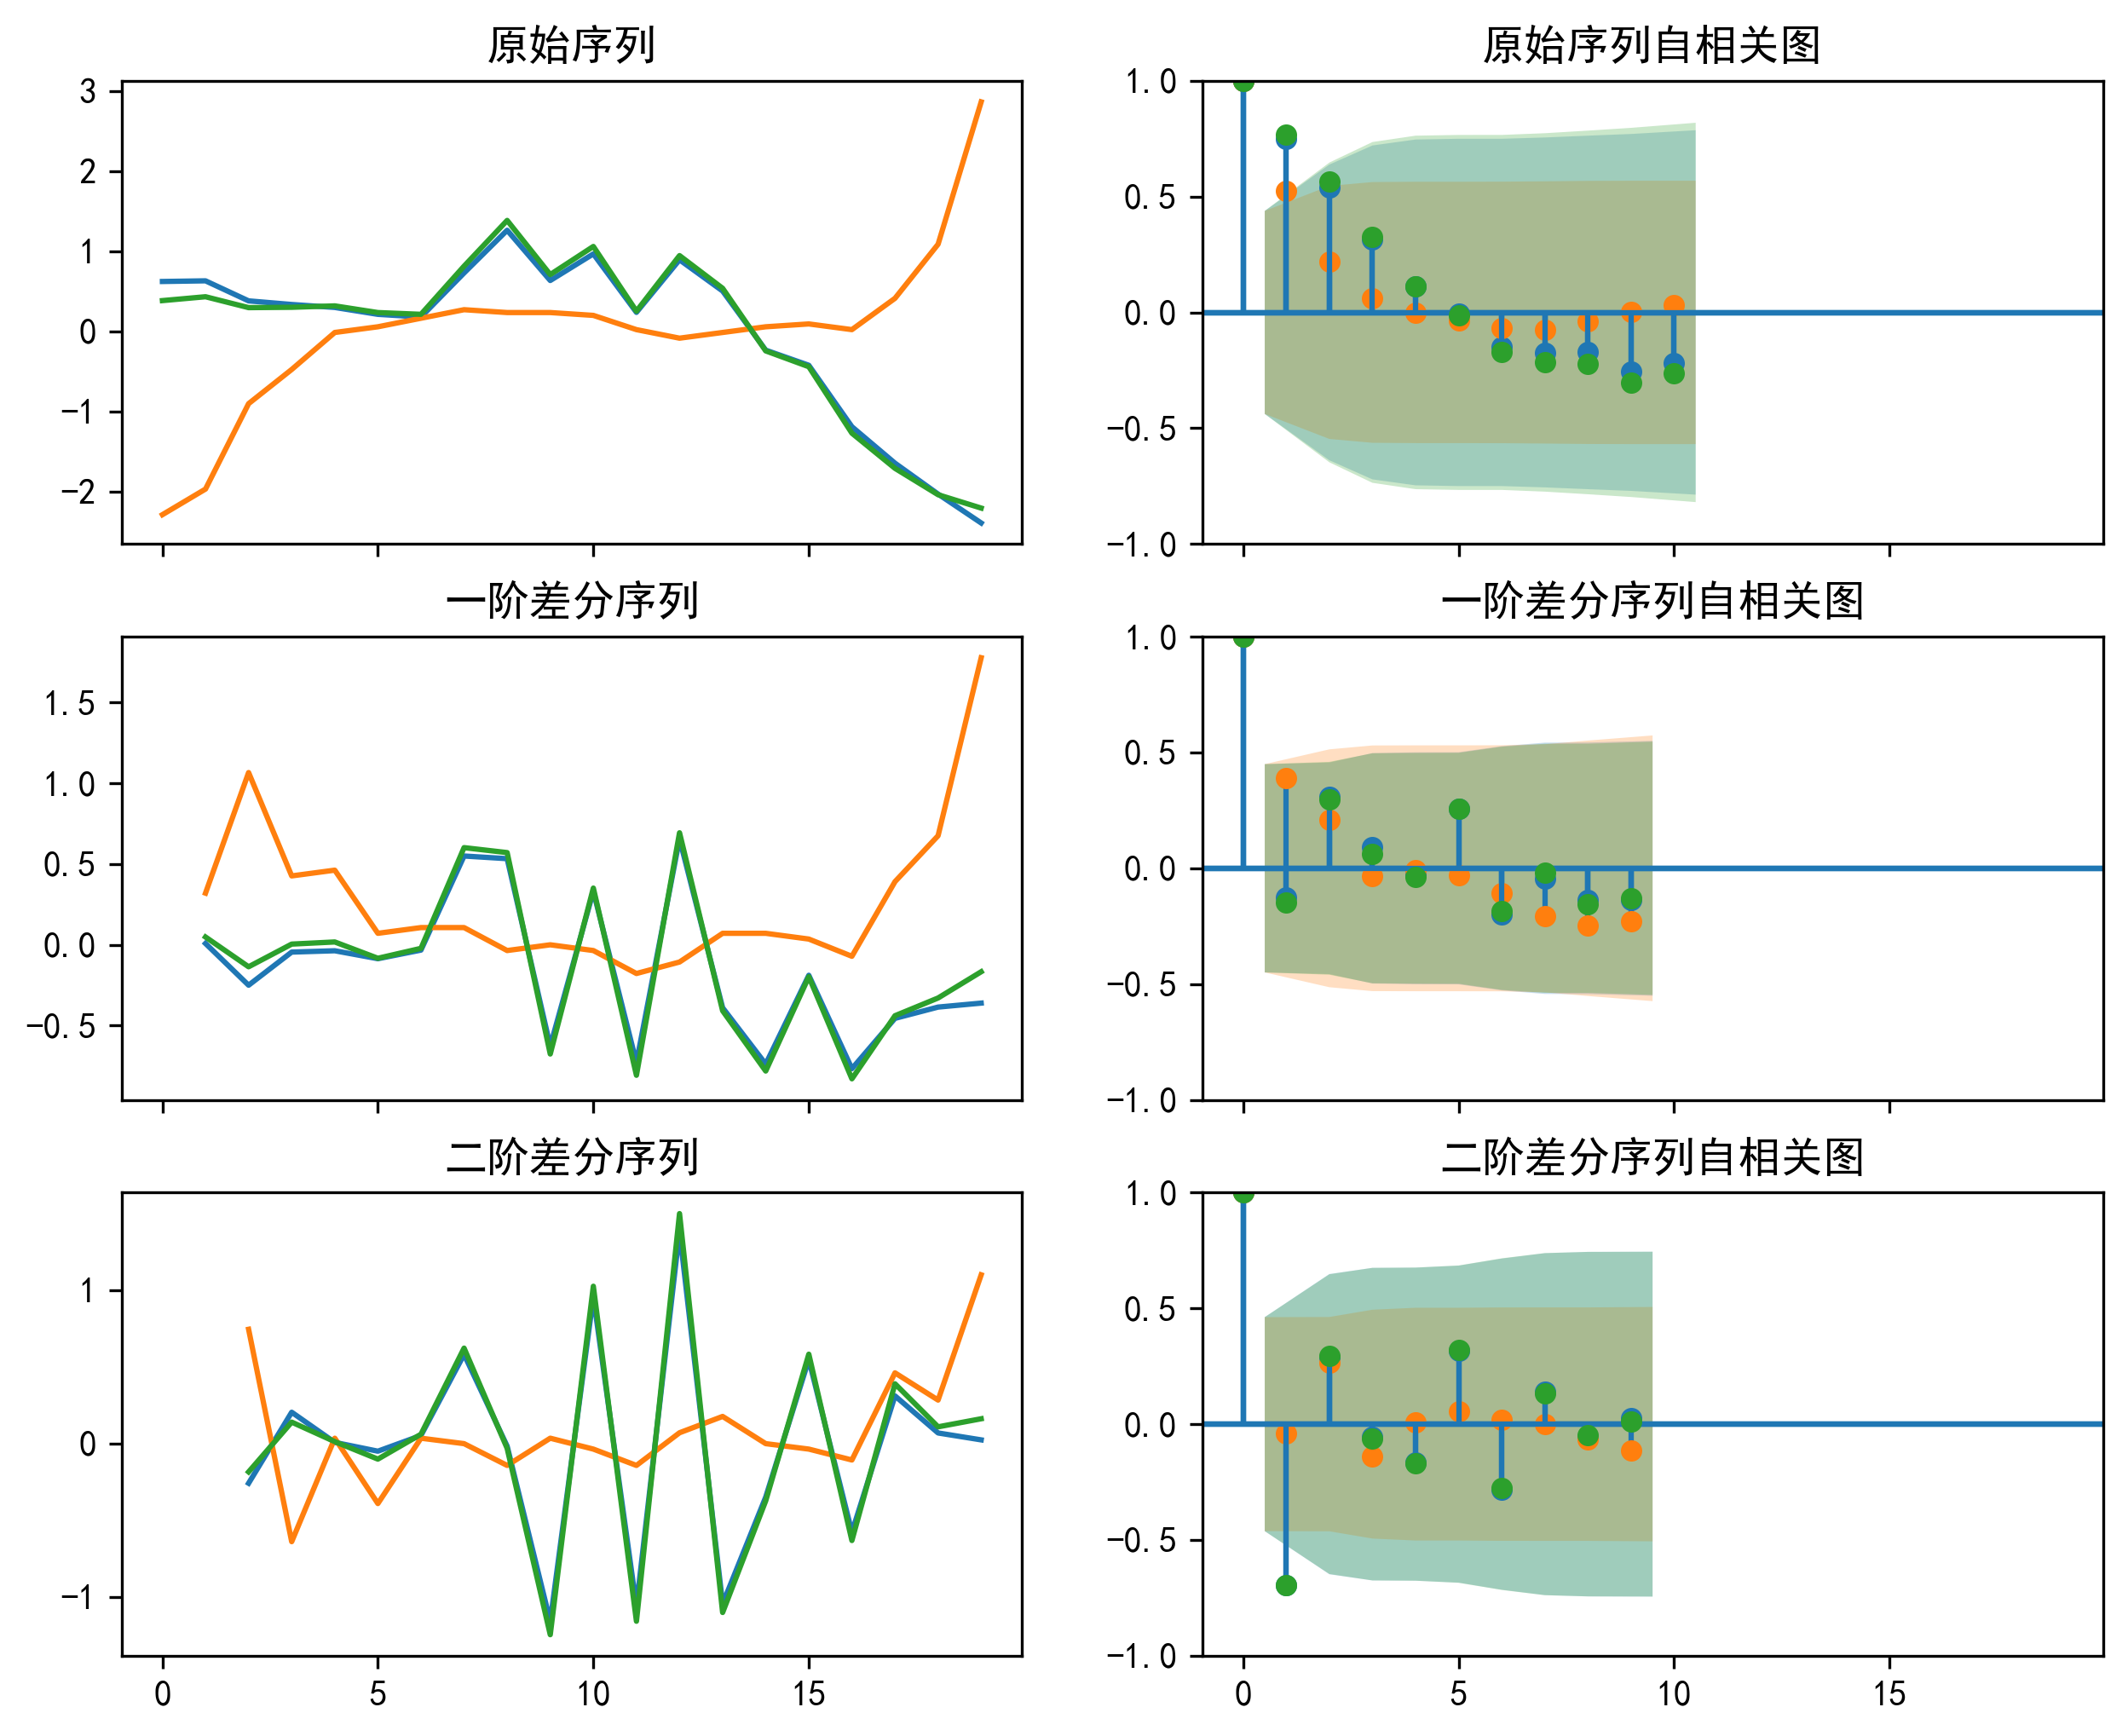

In [224]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10, 8), dpi=300)
for col in r_df.columns[::-1]:
    df = r_df.loc[:, col]
    axes[0, 0].plot(df.values); axes[0, 0].set_title('原始序列')
    plot_acf(df.values, ax=axes[0, 1], title='原始序列自相关图')

    # 1st Differencing
    axes[1, 0].plot(df.diff().values); axes[1, 0].set_title('一阶差分序列')
    plot_acf(df.diff().dropna().values, ax=axes[1, 1], title='一阶差分序列自相关图')

    # 2nd Differencing
    axes[2, 0].plot(df.diff().diff().values), axes[2, 0].set_title('二阶差分序列')
    plot_acf(df.diff().diff().dropna().values, ax=axes[2, 1], title='二阶差分序列自相关图')
plt.show()

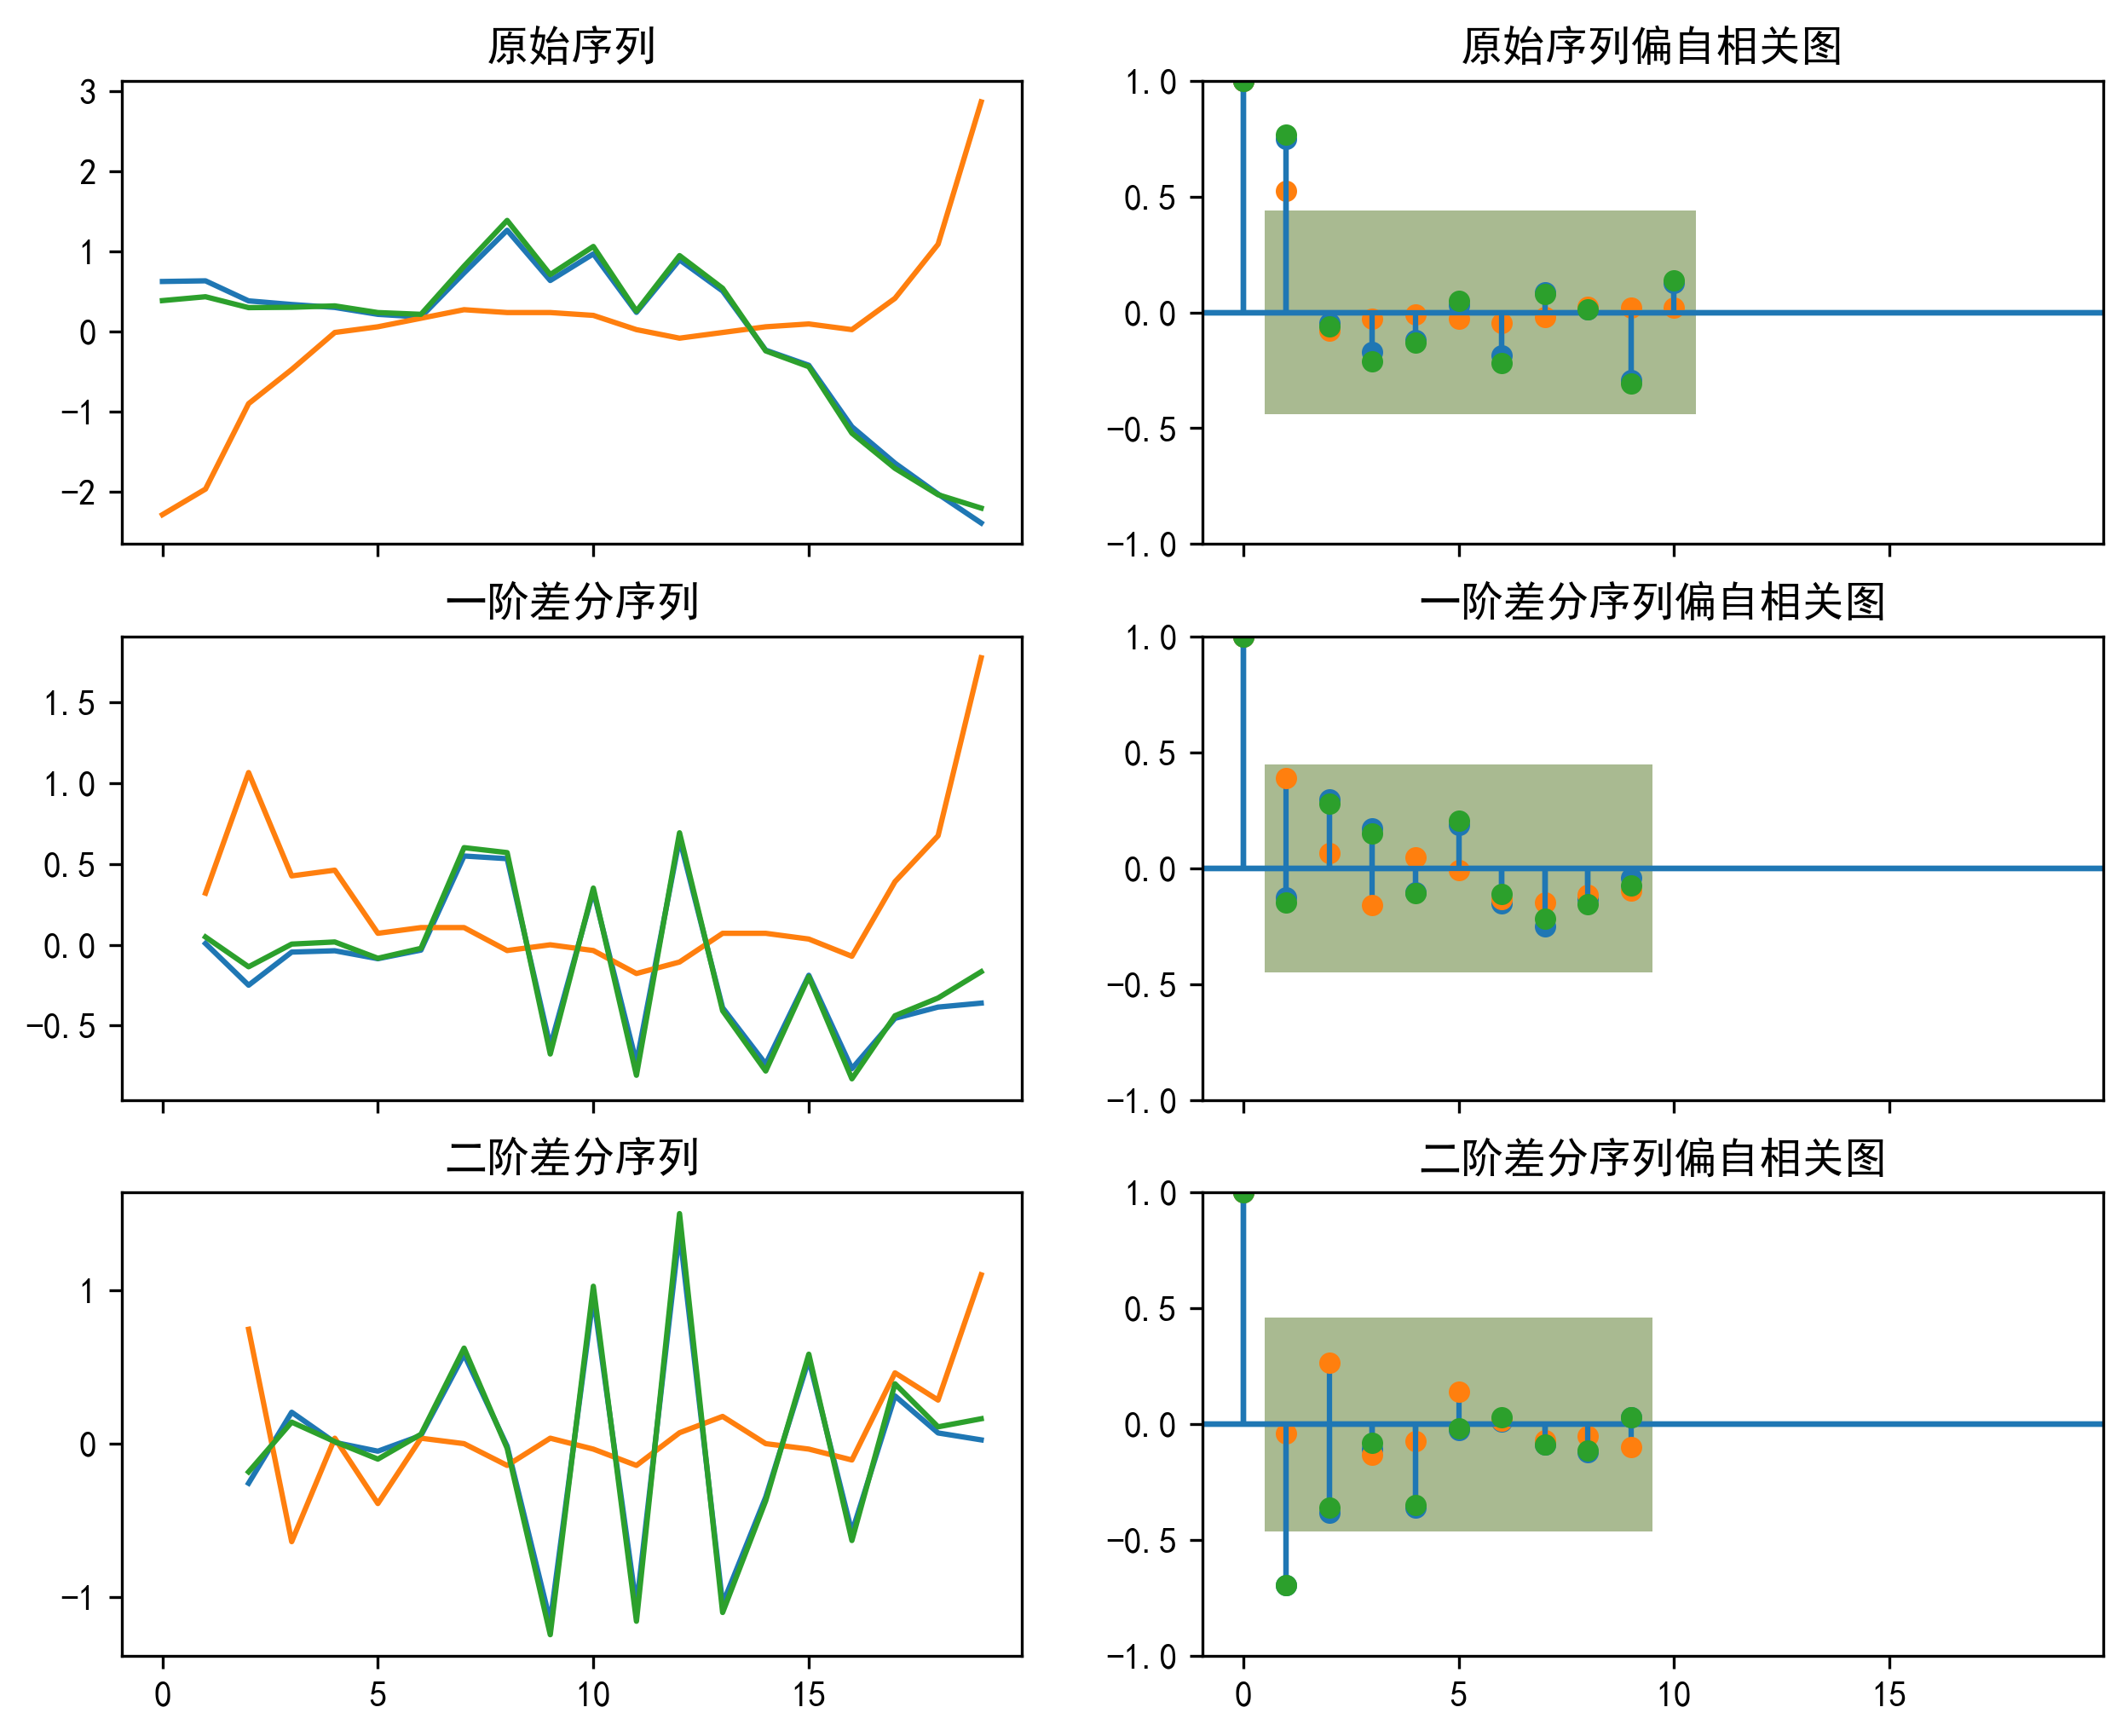

In [225]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10, 8), dpi=300)
for col in r_df.columns[::-1]:
    df = r_df.loc[:, col]
    axes[0, 0].plot(df.values); axes[0, 0].set_title('原始序列')
    plot_pacf(df.values, ax=axes[0, 1], title='原始序列偏自相关图')

    # 1st Differencing
    axes[1, 0].plot(df.diff().values); axes[1, 0].set_title('一阶差分序列')
    plot_pacf(df.diff().dropna().values, ax=axes[1, 1], title='一阶差分序列偏自相关图')

    # 2nd Differencing
    axes[2, 0].plot(df.diff().diff().values), axes[2, 0].set_title('二阶差分序列')
    plot_pacf(df.diff().diff().dropna().values, ax=axes[2, 1], title='二阶差分序列偏自相关图')
plt.show()

In [226]:
r_tr = r_df.diff().dropna()

In [227]:
r_model = VAR(r_df)
r_tr_res = r_model.fit(maxlags=2, trend='c')
r_pred = r_tr_res.forecast(r_df.values, steps=9)

first = 2024
predicted_df = pd.DataFrame(r_pred, columns=r_df.columns, index=range(first, first + len(r_pred)))
res_df_2 = pd.concat([r_df, predicted_df])
index = r_df.index.append(predicted_df.index)
res_df_2 = pd.DataFrame(
    std2.inverse_transform(res_df_2),
    index=index, 
    columns=predicted_df.columns
)
res_df_2

指标     人口出生率(‰)  人口死亡率(‰)  人口自然增长率(‰)
2004  12.290000  6.420000    5.870000
2005  12.400000  6.510000    5.890000
2006  12.090000  6.810000    5.280000
2007  12.100000  6.930000    5.170000
2008  12.140000  7.060000    5.080000
2009  11.950000  7.080000    4.870000
2010  11.900000  7.110000    4.790000
2011  13.270000  7.140000    6.130000
2012  14.570000  7.130000    7.430000
2013  13.030000  7.130000    5.900000
2014  13.830000  7.120000    6.710000
2015  11.990000  7.070000    4.930000
2016  13.570000  7.040000    6.530000
2017  12.640000  7.060000    5.580000
2018  10.860000  7.080000    3.780000
2019  10.410000  7.090000    3.320000
2020   8.520000  7.070000    1.450000
2021   7.520000  7.180000    0.340000
2022   6.770000  7.370000   -0.600000
2023   6.390000  7.870000   -1.480000
2024   7.046272  8.212777   -1.167809
2025   7.680228  8.437401   -0.759121
2026   8.250911  8.536781   -0.287600
2027   8.767274  8.535725    0.229988
2028   9.097947  8.465554    0.631076
2029   9.237593  8.357835    0.878719
2030   9.215815  8.243024    0.971961
2031   9.071666  8.144298    0.926671
2032   8.859741  8.075558    0.783541

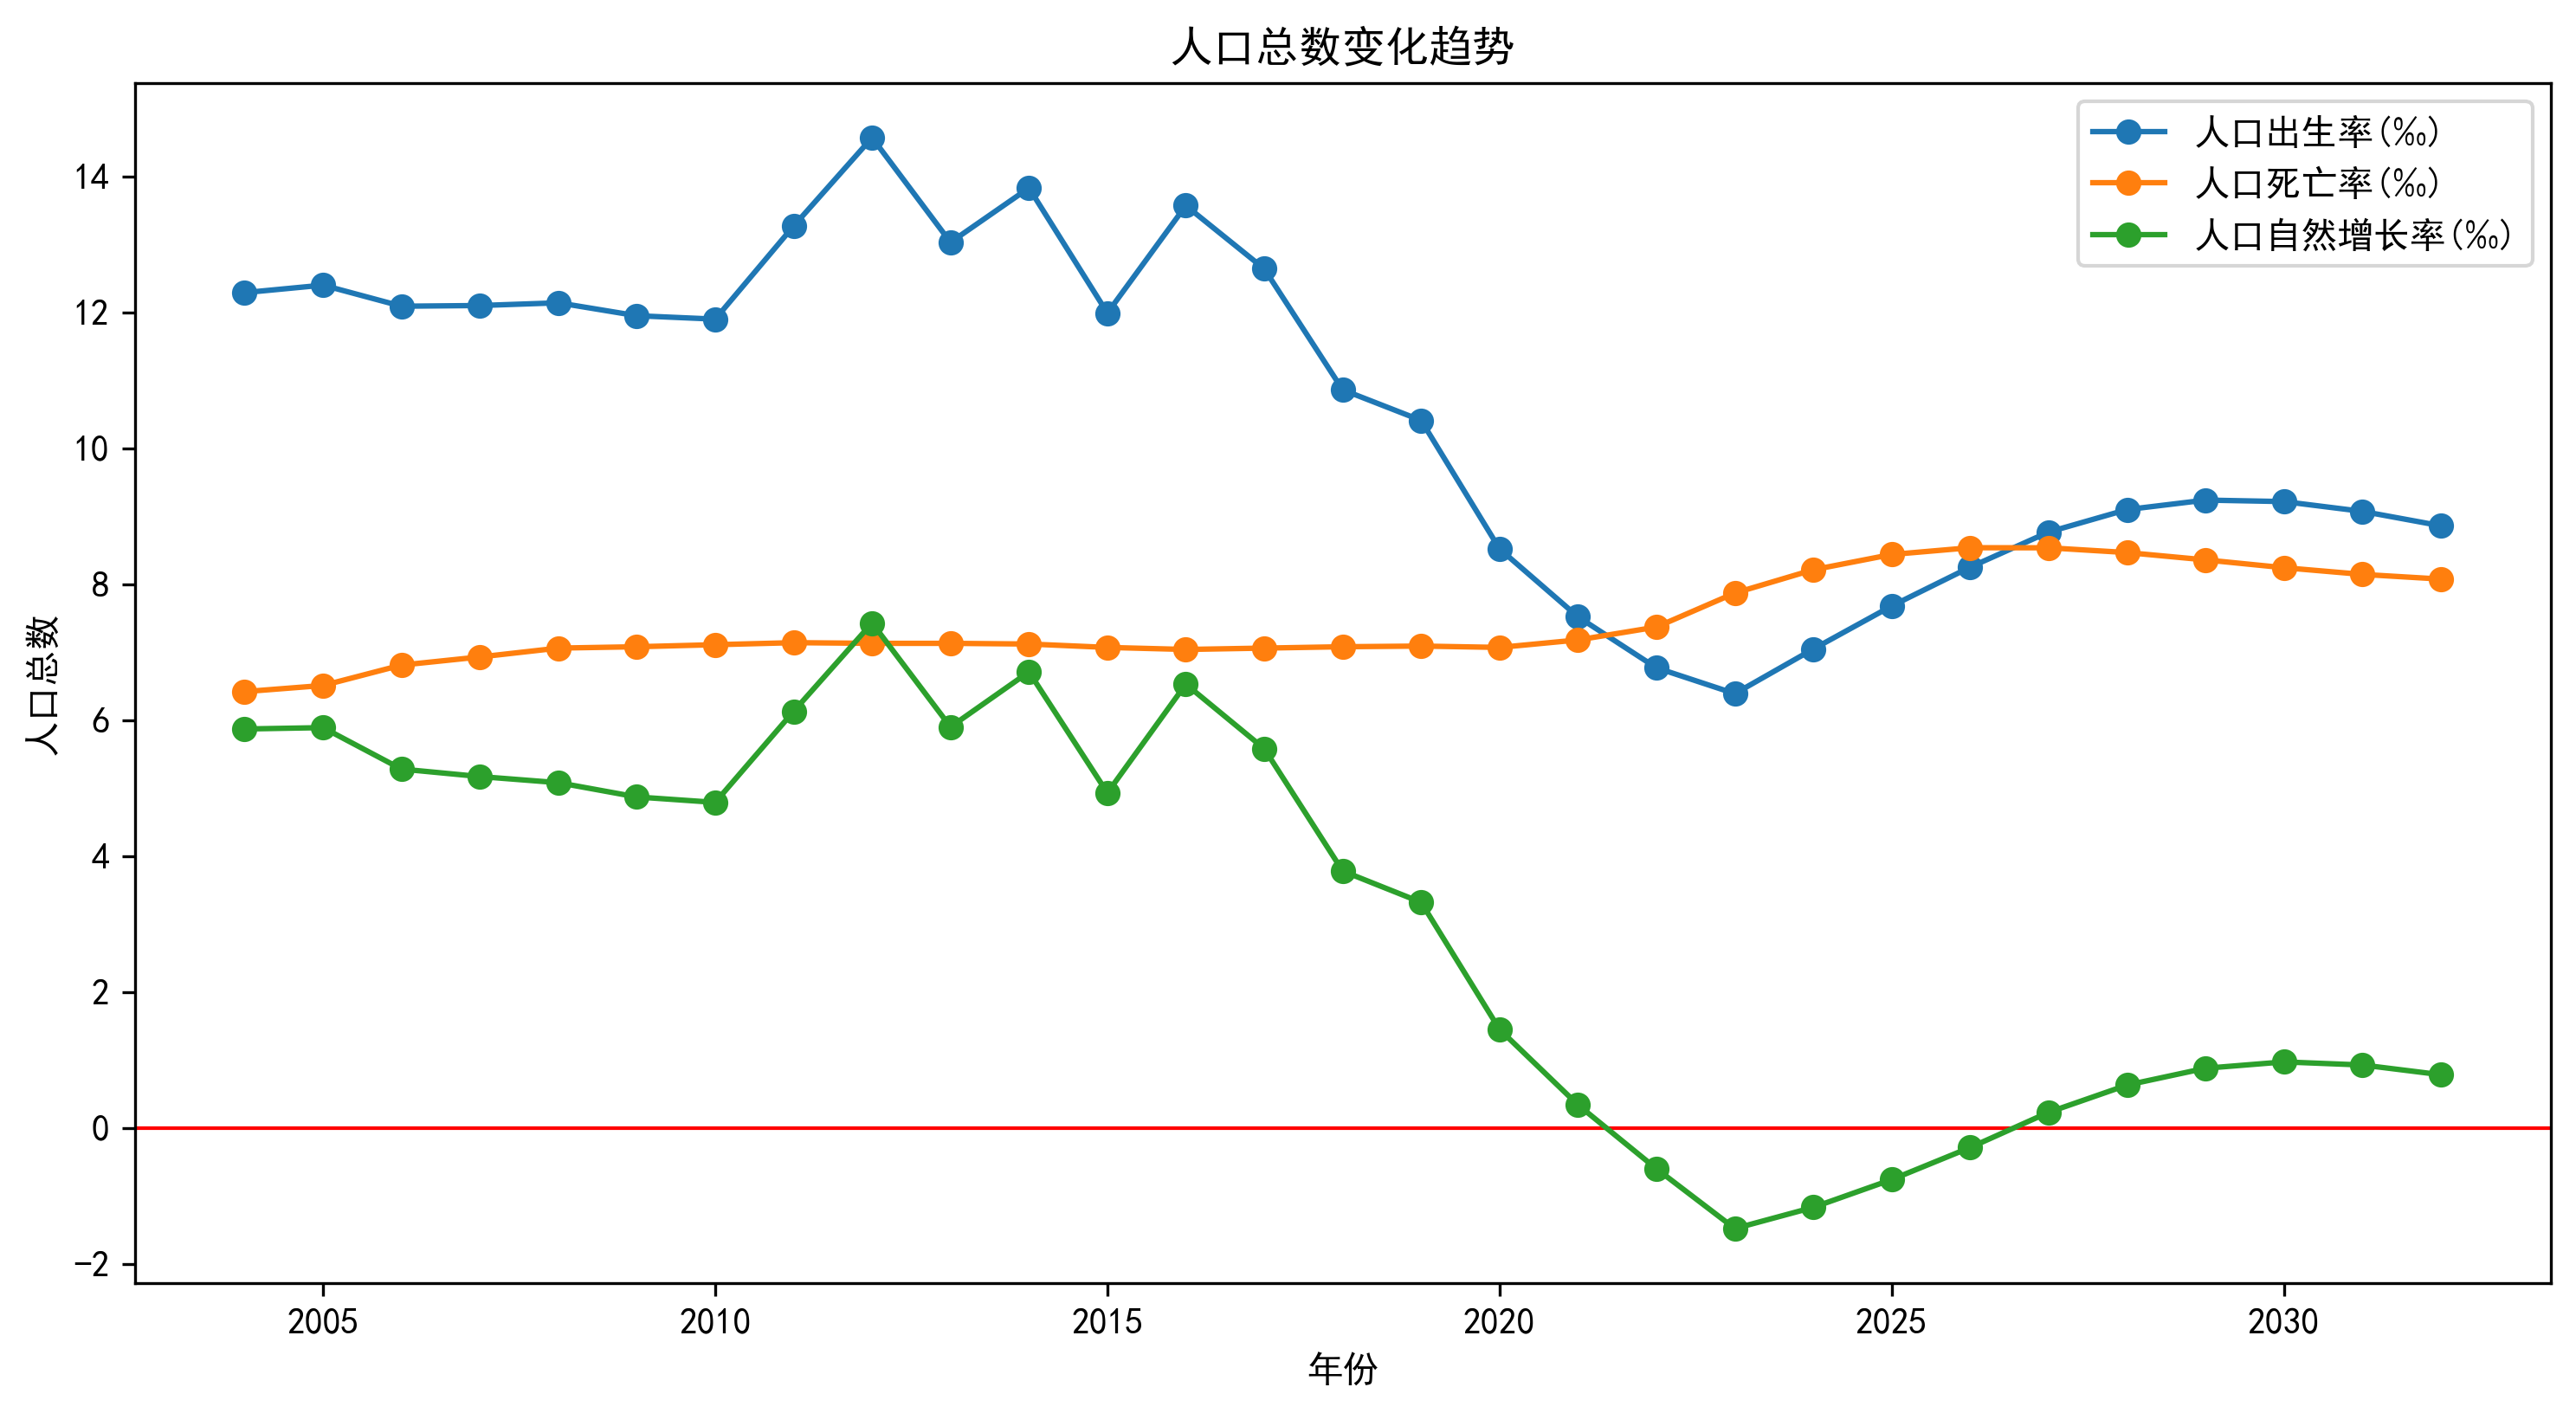

In [228]:
plt.figure(figsize=(12, 6), dpi=300)
plt.axhline(y=0, color='red', linewidth=1)
for index, row in res_df_2.T.iterrows():
    if index in drop_columns:
        continue
    x = row.index[::-1]
    y = row[::-1]
    plt.plot(x, y, marker='o', label=index)
plt.xlabel('年份')
plt.ylabel('人口总数')
plt.title('人口总数变化趋势')
plt.legend()
plt.show()

In [229]:
tp_df.head()

指标     年末总人口(万人)  男性人口(万人)  女性人口(万人)  城镇人口(万人)  乡村人口(万人)
2023年   140967.0   72032.0   68935.0   93267.0   47700.0
2022年   141175.0   72206.0   68969.0   92071.0   49104.0
2021年   141260.0   72311.0   68949.0   91425.0   49835.0
2020年   141212.0   72357.0   68855.0   90220.0   50992.0
2019年   141008.0   72039.0   68969.0   88426.0   52582.0

In [230]:
def get_pop(last, rate):
    return last * (1 + rate/1000)

pop_list = list(tp_df[::-1].iloc[:, 0].values)
cur_pop = pop_list[-1]
for rate in res_df_2.loc[2024:, '人口自然增长率(‰)']:
    cur_pop = get_pop(cur_pop, rate)
    pop_list.append(cur_pop)
pop_df = pd.DataFrame(pop_list, index=res_df_2.index, columns=['population'])

In [232]:
res_df

0-4       5-9     10-14     15-19     20-24     25-29     30-34  \
2004  0.049378  0.060828  0.082814  0.087193  0.063527  0.070619  0.094132   
2005  0.053404  0.062444  0.079670  0.084982  0.061035  0.065366  0.085125   
2006  0.050774  0.059185  0.074737  0.088057  0.063857  0.062138  0.078310   
2007  0.050470  0.057373  0.070897  0.083211  0.066121  0.064568  0.072979   
2008  0.051258  0.054646  0.067269  0.078715  0.068633  0.064841  0.069602   
2009  0.051638  0.054078  0.062970  0.071688  0.075226  0.064791  0.067585   
2010  0.052229  0.055883  0.065473  0.075410  0.074580  0.067095  0.071876   
2011  0.056610  0.053509  0.054559  0.070195  0.094801  0.077941  0.071732   
2012  0.056889  0.054513  0.053212  0.065721  0.090465  0.079967  0.074321   
2013  0.056767  0.055833  0.051467  0.061439  0.087091  0.083274  0.073922   
2014  0.056910  0.056147  0.051838  0.057559  0.080741  0.087909  0.073413   
2015  0.058350  0.055120  0.051779  0.054689  0.072955  0.093479  0.073810   
2016  0.059107  0.055121  0.052175  0.053161  0.068308  0.092108  0.075623   
2017  0.059649  0.055284  0.053025  0.051736  0.063903  0.087930  0.077677   
2018  0.058877  0.055320  0.054382  0.050896  0.059451  0.081228  0.081423   
2019  0.057444  0.055593  0.054808  0.051125  0.056342  0.074863  0.086064   
2020  0.056207  0.054897  0.059729  0.065231  0.070107  0.076479  0.078272   
2021  0.048846  0.064318  0.061781  0.053153  0.051709  0.061396  0.085710   
2022  0.043108  0.062876  0.063605  0.055097  0.050990  0.058892  0.080855   
2023  0.050080  0.057069  0.066078  0.076499  0.077842  0.073491  0.070475   
2024  0.046707  0.065136  0.065646  0.062389  0.059832  0.062135  0.080206   
2025  0.045449  0.060569  0.064222  0.062667  0.060564  0.065314  0.076673   
2026  0.045030  0.062290  0.065295  0.063327  0.060589  0.063590  0.077162   
2027  0.043909  0.062857  0.065409  0.061966  0.058482  0.062121  0.077549   
2028  0.043399  0.062589  0.065985  0.063515  0.059843  0.062204  0.076379   
2029  0.042492  0.063653  0.066543  0.063038  0.058620  0.060566  0.076757   
2030  0.039959  0.065706  0.065741  0.055925  0.049594  0.056031  0.080013   
2031  0.039816  0.063253  0.066286  0.060378  0.054616  0.058685  0.076353   
2032  0.039966  0.064428  0.068099  0.064373  0.058443  0.058284  0.075233   

         35-39     40-44     45-49     50-54     55-59     60-64     65-69  \
2004  0.097819  0.080279  0.071512  0.068981  0.049299  0.037986  0.031971   
2005  0.097228  0.086869  0.067561  0.072822  0.053423  0.039345  0.033210   
2006  0.095544  0.097077  0.064139  0.075970  0.057247  0.040989  0.033535   
2007  0.097070  0.097454  0.064005  0.077798  0.061598  0.042901  0.033522   
2008  0.092741  0.096484  0.071871  0.078028  0.065806  0.044722  0.033248   
2009  0.091023  0.096444  0.079286  0.072391  0.067910  0.047803  0.034433   
2010  0.091560  0.094544  0.077381  0.071805  0.062479  0.044821  0.033577   
2011  0.084609  0.093774  0.088065  0.054317  0.062580  0.046025  0.031482   
2012  0.079183  0.095613  0.088304  0.055053  0.063488  0.049283  0.033414   
2013  0.075404  0.092782  0.087738  0.062170  0.063230  0.052087  0.035063   
2014  0.072743  0.090678  0.088268  0.069289  0.059062  0.054792  0.037094   
2015  0.070738  0.085629  0.090141  0.075817  0.055994  0.056842  0.039904   
2016  0.069502  0.081803  0.090347  0.084289  0.051500  0.058458  0.041842   
2017  0.072083  0.076589  0.092099  0.084488  0.052236  0.059414  0.045014   
2018  0.071538  0.073013  0.089446  0.084611  0.061018  0.059419  0.047874   
2019  0.071165  0.070561  0.087575  0.085289  0.067836  0.055603  0.050451   
2020  0.082258  0.085836  0.083468  0.072333  0.060847  0.051889  0.039065   
2021  0.073070  0.065609  0.076667  0.086556  0.081650  0.047358  0.054446   
2022  0.076061  0.068130  0.071991  0.088390  0.081359  0.049837  0.055377   
2023  0.090636  0.096212  0.074715  0.066995  0.058606  0.047115  0.032462   
2024  0.079266  0.075200  0.0722

In [242]:
using_df = res_df[['0-4'] + tgt_cols + ['20-24']]
color = ['slategray', 'teal', 'black', 'purple', 'coral']
using_df['prob_sum'] = using_df.apply(lambda x: sum(x[1:4]), axis=1)
using_df['pop_total'] = pop_list
using_df['pop_cnt'] = using_df.apply(lambda x: x[-1] * x[-2], axis=1)
using_df

0-4       5-9     10-14     15-19     20-24  prob_sum  \
2004  0.049378  0.060828  0.082814  0.087193  0.063527  0.230835   
2005  0.053404  0.062444  0.079670  0.084982  0.061035  0.227097   
2006  0.050774  0.059185  0.074737  0.088057  0.063857  0.221979   
2007  0.050470  0.057373  0.070897  0.083211  0.066121  0.211481   
2008  0.051258  0.054646  0.067269  0.078715  0.068633  0.200630   
2009  0.051638  0.054078  0.062970  0.071688  0.075226  0.188736   
2010  0.052229  0.055883  0.065473  0.075410  0.074580  0.196767   
2011  0.056610  0.053509  0.054559  0.070195  0.094801  0.178263   
2012  0.056889  0.054513  0.053212  0.065721  0.090465  0.173446   
2013  0.056767  0.055833  0.051467  0.061439  0.087091  0.168739   
2014  0.056910  0.056147  0.051838  0.057559  0.080741  0.165544   
2015  0.058350  0.055120  0.051779  0.054689  0.072955  0.161588   
2016  0.059107  0.055121  0.052175  0.053161  0.068308  0.160458   
2017  0.059649  0.055284  0.053025  0.051736  0.063903  0.160046   
2018  0.058877  0.055320  0.054382  0.050896  0.059451  0.160598   
2019  0.057444  0.055593  0.054808  0.051125  0.056342  0.161527   
2020  0.056207  0.054897  0.059729  0.065231  0.070107  0.179857   
2021  0.048846  0.064318  0.061781  0.053153  0.051709  0.179252   
2022  0.043108  0.062876  0.063605  0.055097  0.050990  0.181579   
2023  0.050080  0.057069  0.066078  0.076499  0.077842  0.199647   
2024  0.046707  0.065136  0.065646  0.062389  0.059832  0.193171   
2025  0.045449  0.060569  0.064222  0.062667  0.060564  0.187457   
2026  0.045030  0.062290  0.065295  0.063327  0.060589  0.190913   
2027  0.043909  0.062857  0.065409  0.061966  0.058482  0.190232   
2028  0.043399  0.062589  0.065985  0.063515  0.059843  0.192089   
2029  0.042492  0.063653  0.066543  0.063038  0.058620  0.193233   
2030  0.039959  0.065706  0.065741  0.055925  0.049594  0.187372   
2031  0.039816  0.063253  0.066286  0.060378  0.054616  0.189917   
2032  0.039966  0.064428  0.068099  0.064373  0.058443  0.196900   

          pop_total       pop_cnt  
2004  129988.000000  30005.753084  
2005  130756.000000  29694.252983  
2006  131448.000000  29178.716972  
2007  132129.000000  27942.805009  
2008  132802.000000  26644.102646  
2009  133450.000000  25186.842374  
2010  134091.000000  26384.638854  
2011  134916.000000  24050.484731  
2012  135922.000000  23575.133037  
2013  136726.000000  23070.975998  
2014  137646.000000  22786.468850  
2015  138326.000000  22351.754196  
2016  139232.000000  22340.838636  
2017  140011.000000  22408.195455  
2018  140541.000000  22570.581478  
2019  141008.000000  22776.540501  
2020  141212.000000  25398.005545  
2021  141260.000000  25321.121673  
2022  141175.000000  25634.381137  
2023  140967.000000  28143.616576  
2024  140802.377475  27198.996886  
2025  140695.491489  26374.375465  
2026  140655.027492  26852.828156  
2027  140687.376447  26763.263156  
2028  140776.160843  27041.602135  
2029  140899.863588  27226.449787  
2030  141036.812758  26426.353738  
2031  141167.507462  26810.114254  
2032  141278.118002  27817.695846

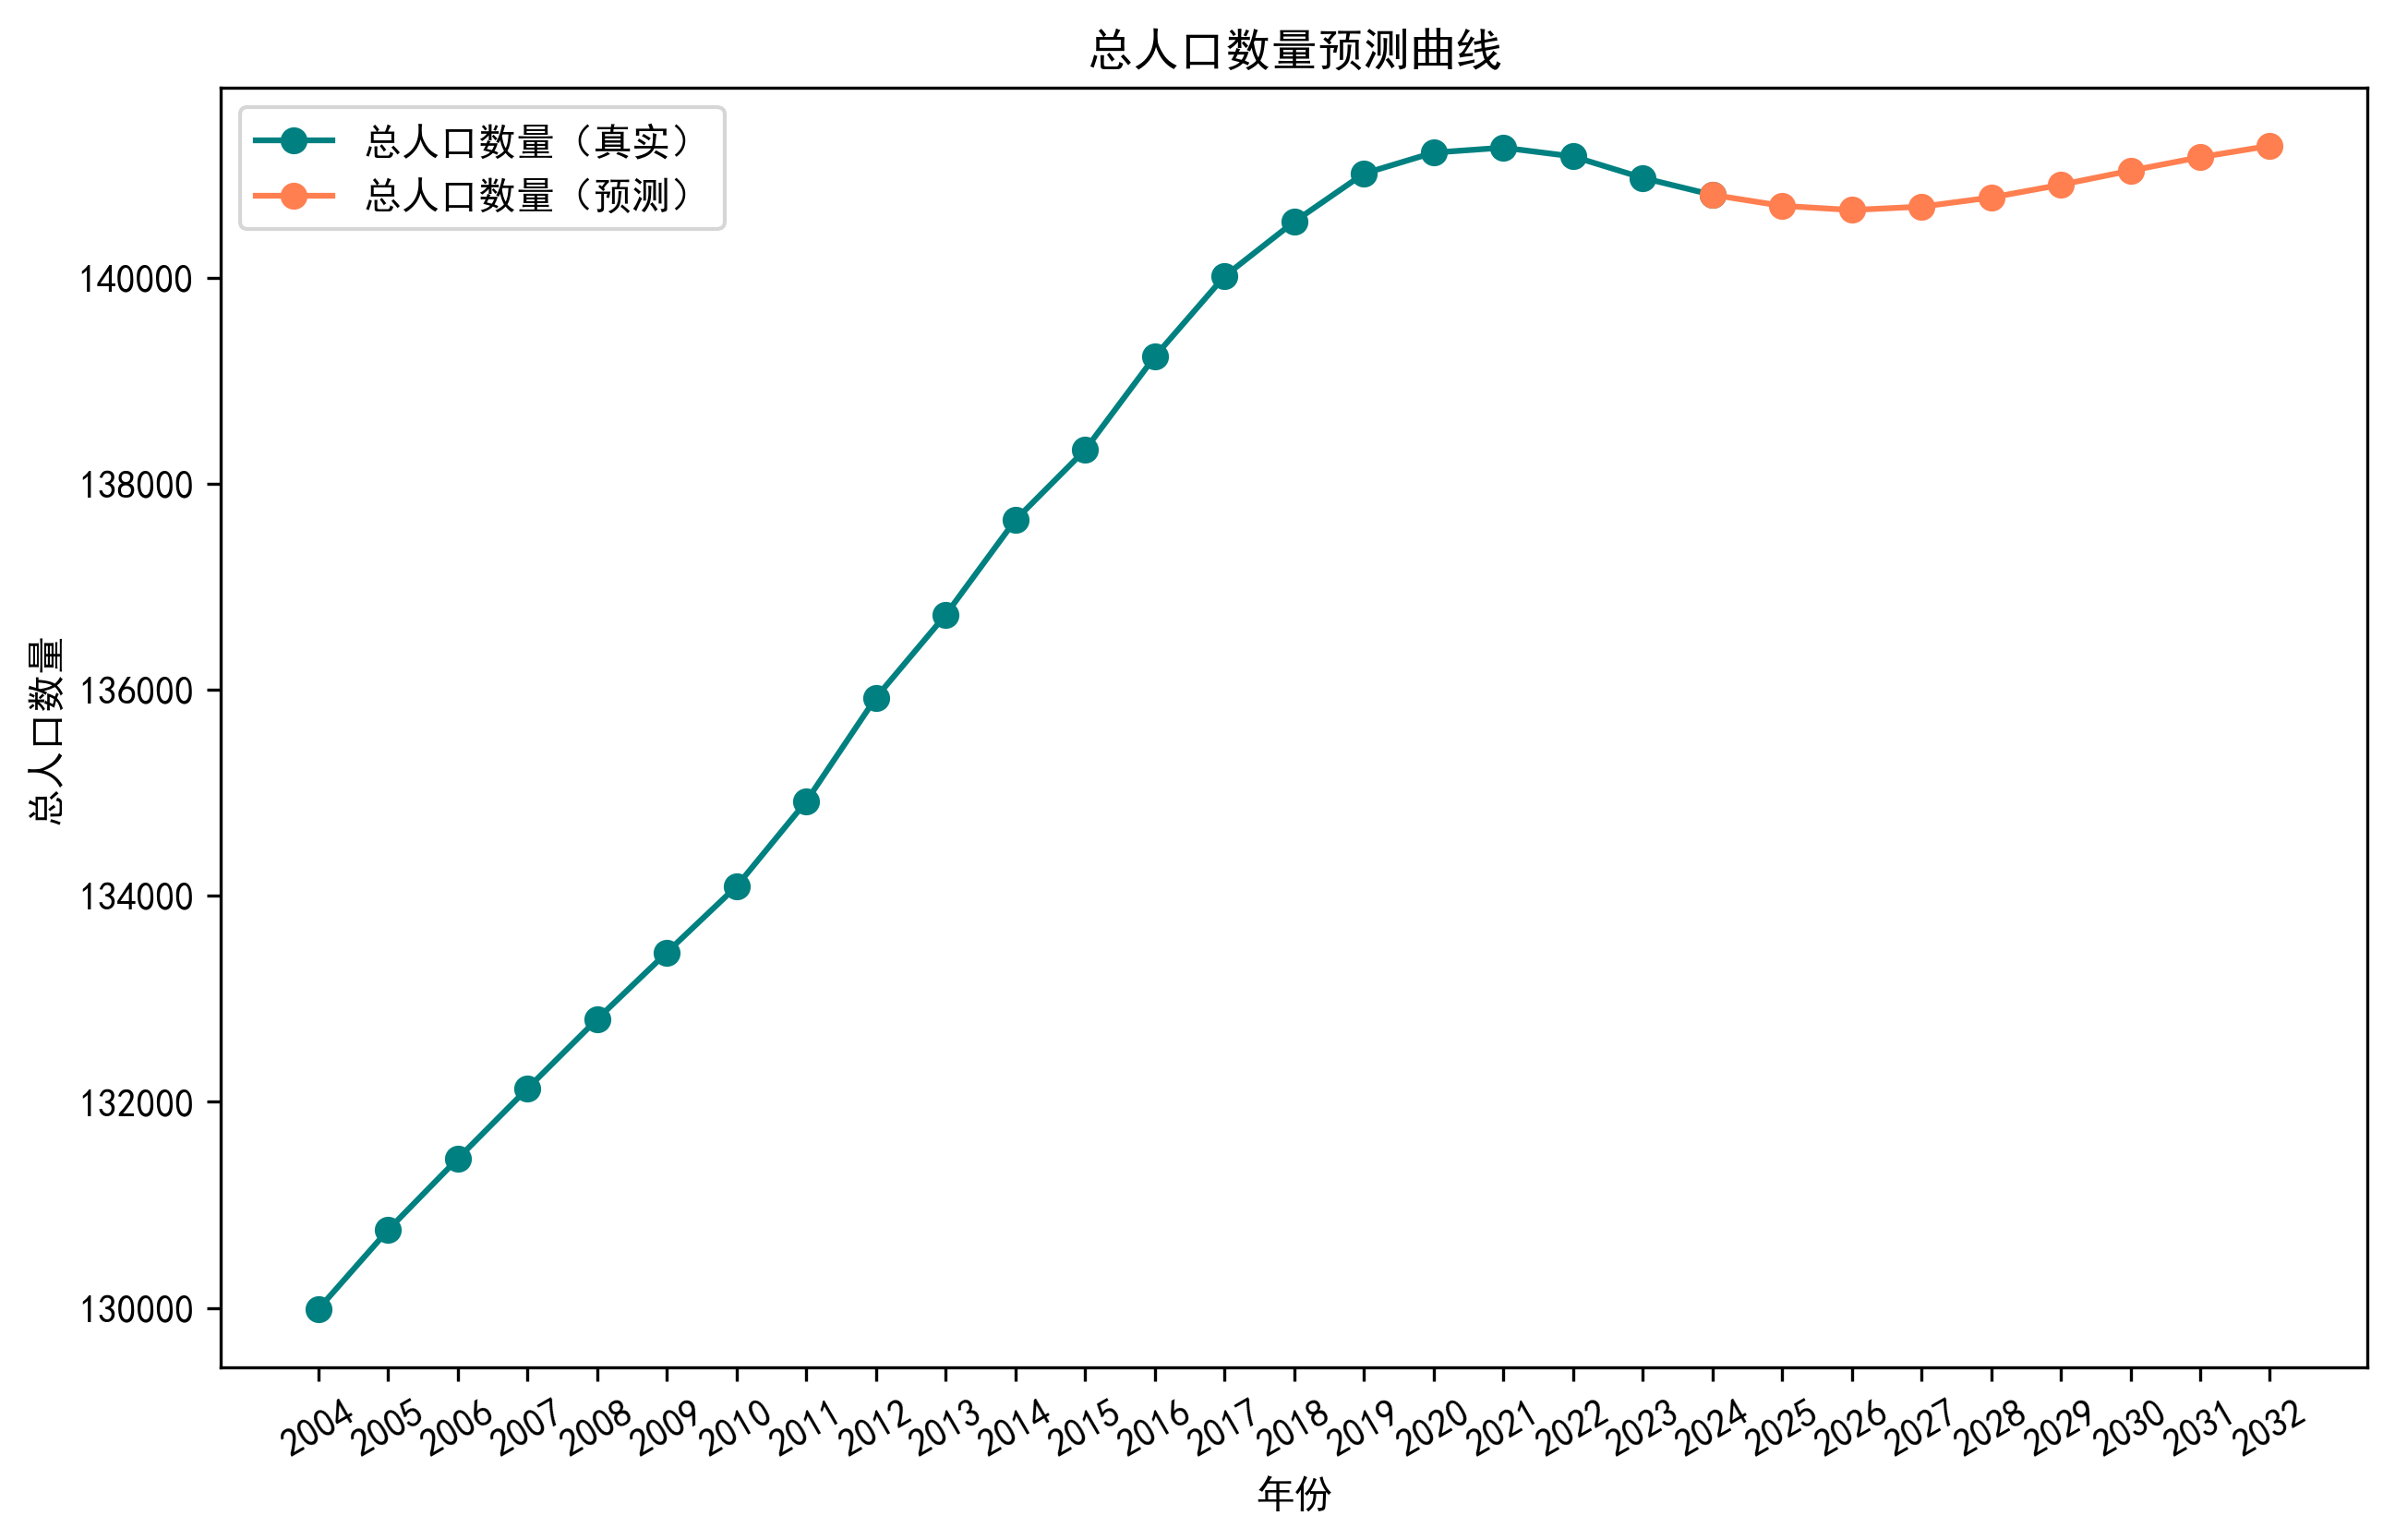

In [245]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(pop_df.index[:21].astype(str), pop_df[:21], marker='o', color='teal', label='总人口数量（真实）')
plt.plot(pop_df.index[20:].astype(str), pop_df[20:], marker='o', color='coral', label='总人口数量（预测）')
plt.ylabel('总人口数量')
plt.xlabel('年份')
plt.title('总人口数量预测曲线')
plt.xticks(rotation=30)
plt.legend()
plt.show()

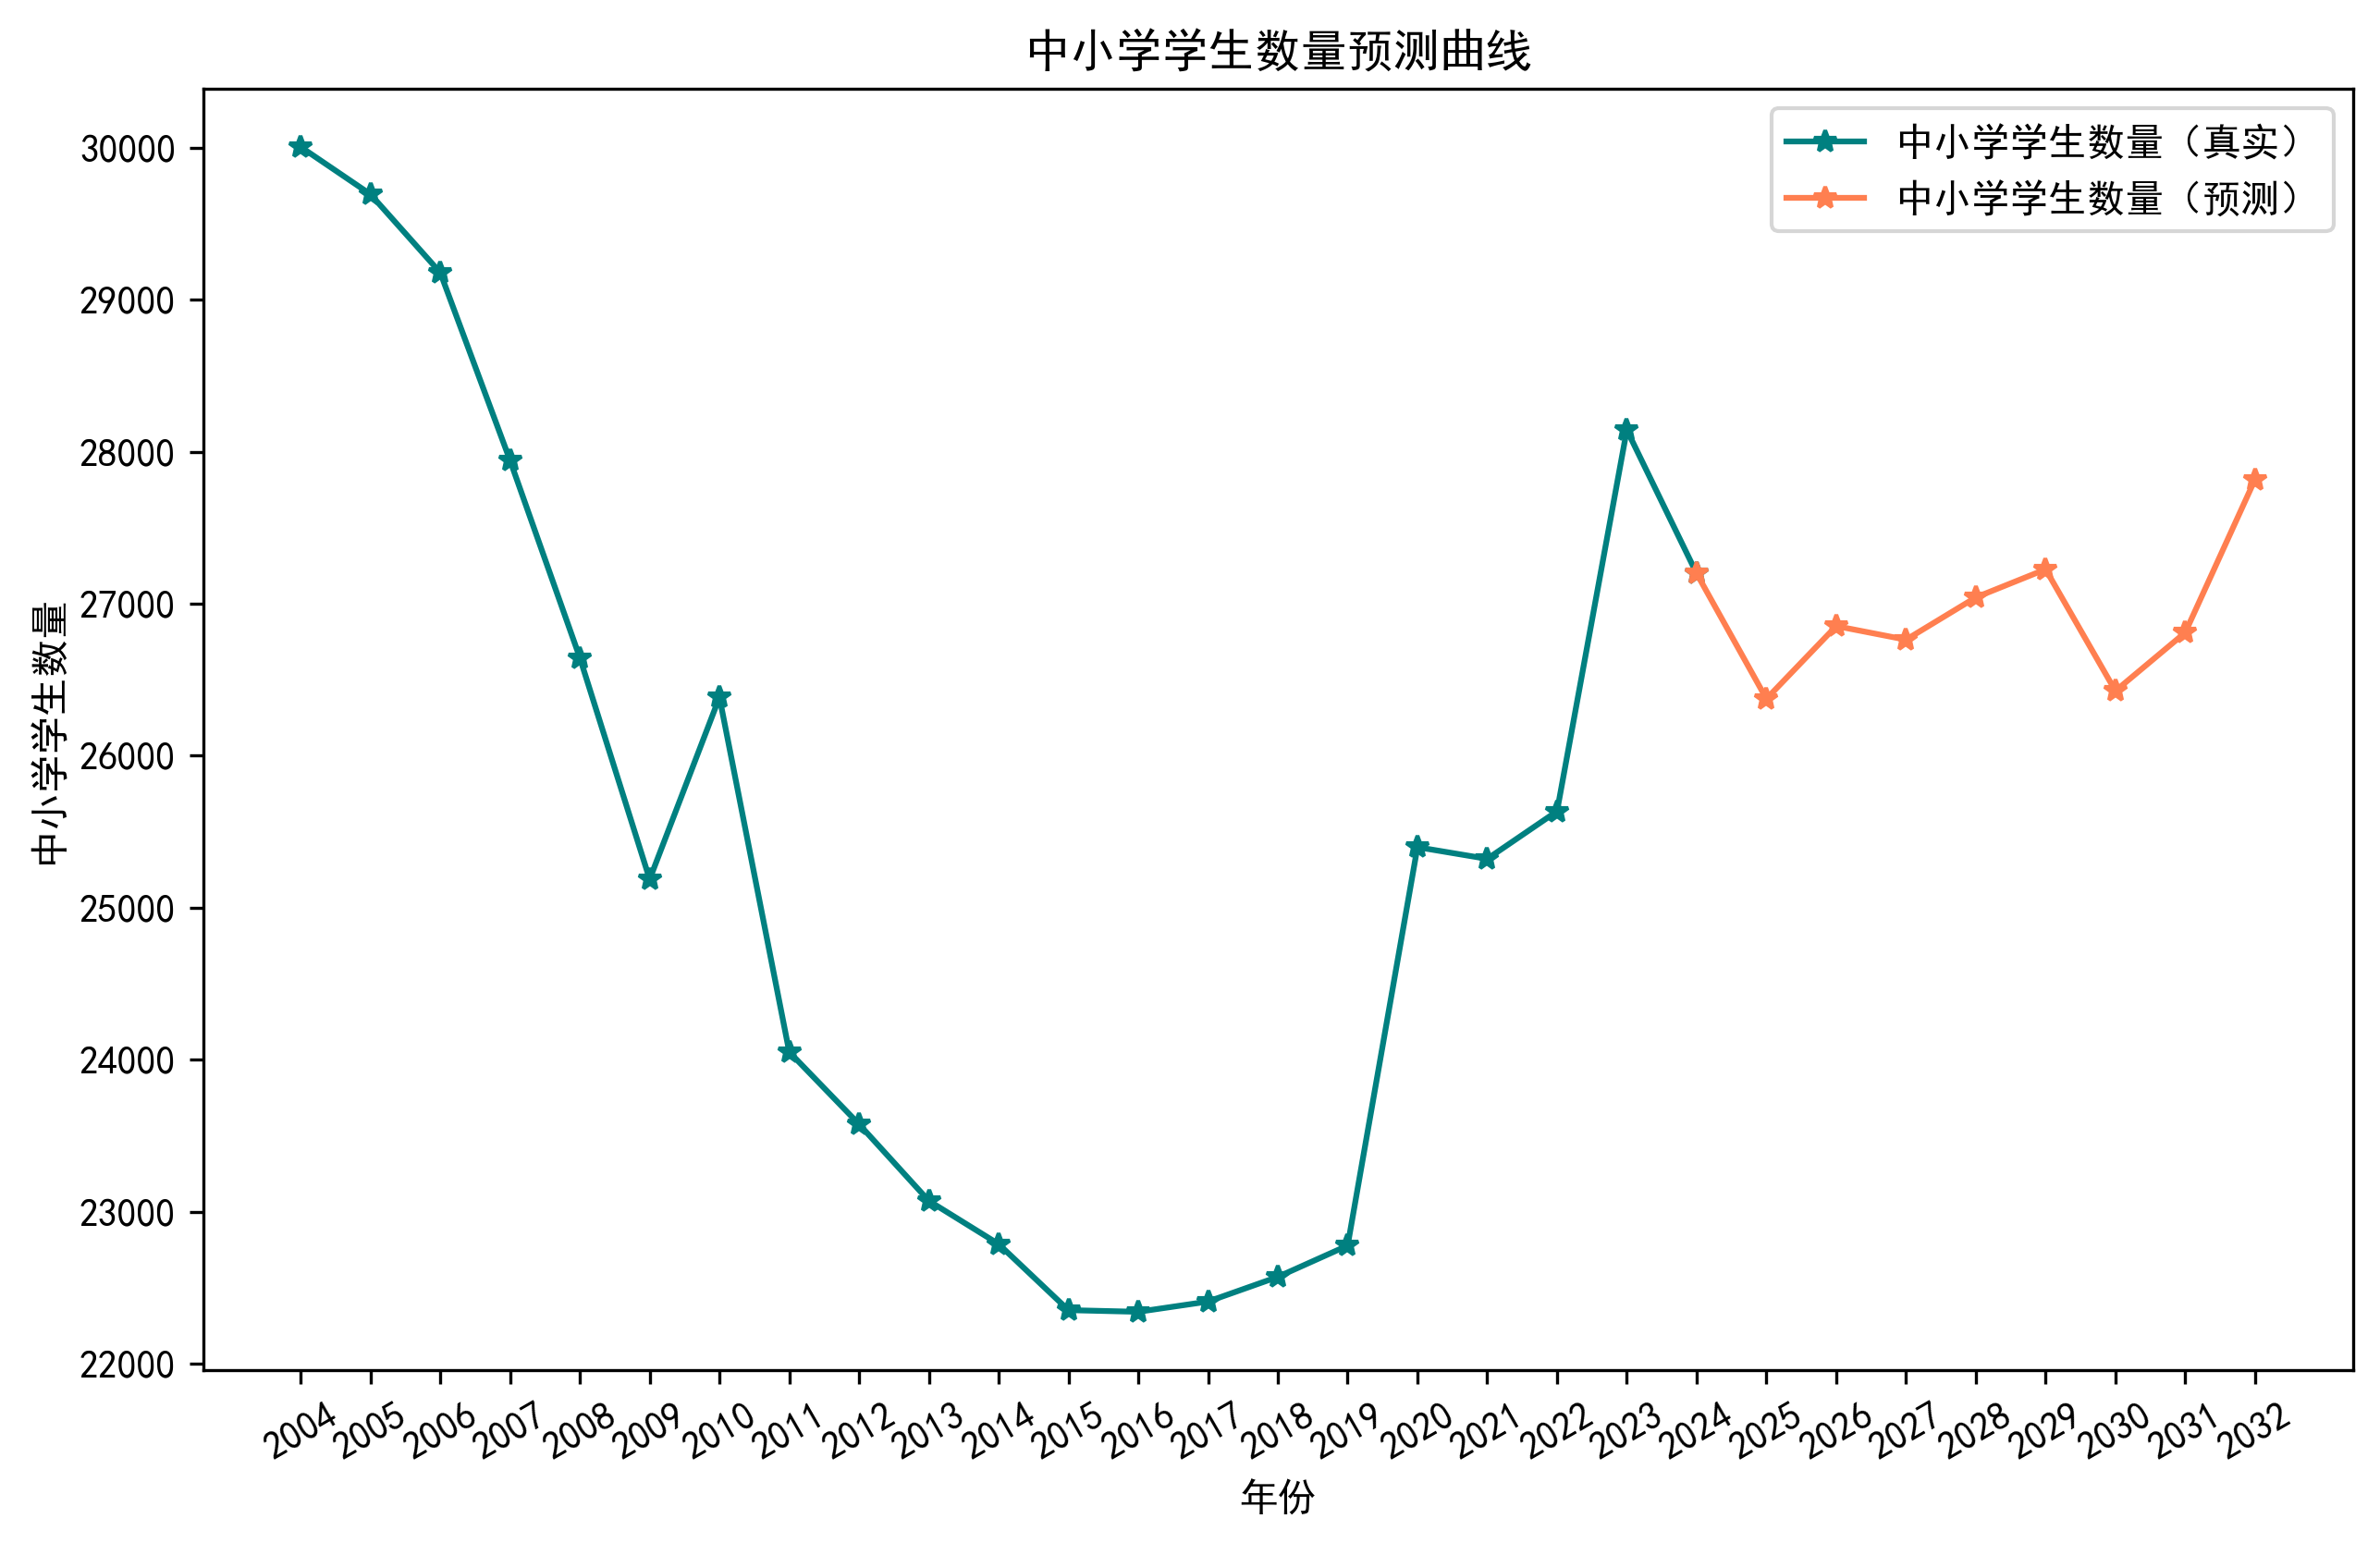

In [246]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(using_df.index[:21].astype(str), using_df.iloc[:21, -1], marker='*', color='teal', label='中小学学生数量（真实）')
plt.plot(using_df.index[20:].astype(str), using_df.iloc[20:, -1], marker='*', color='coral', label='中小学学生数量（预测）')
plt.ylabel('中小学学生数量')
plt.xlabel('年份')
plt.title('中小学学生数量预测曲线')
plt.xticks(rotation=30)
plt.legend()
plt.show()

有外部影响的时序预测

/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


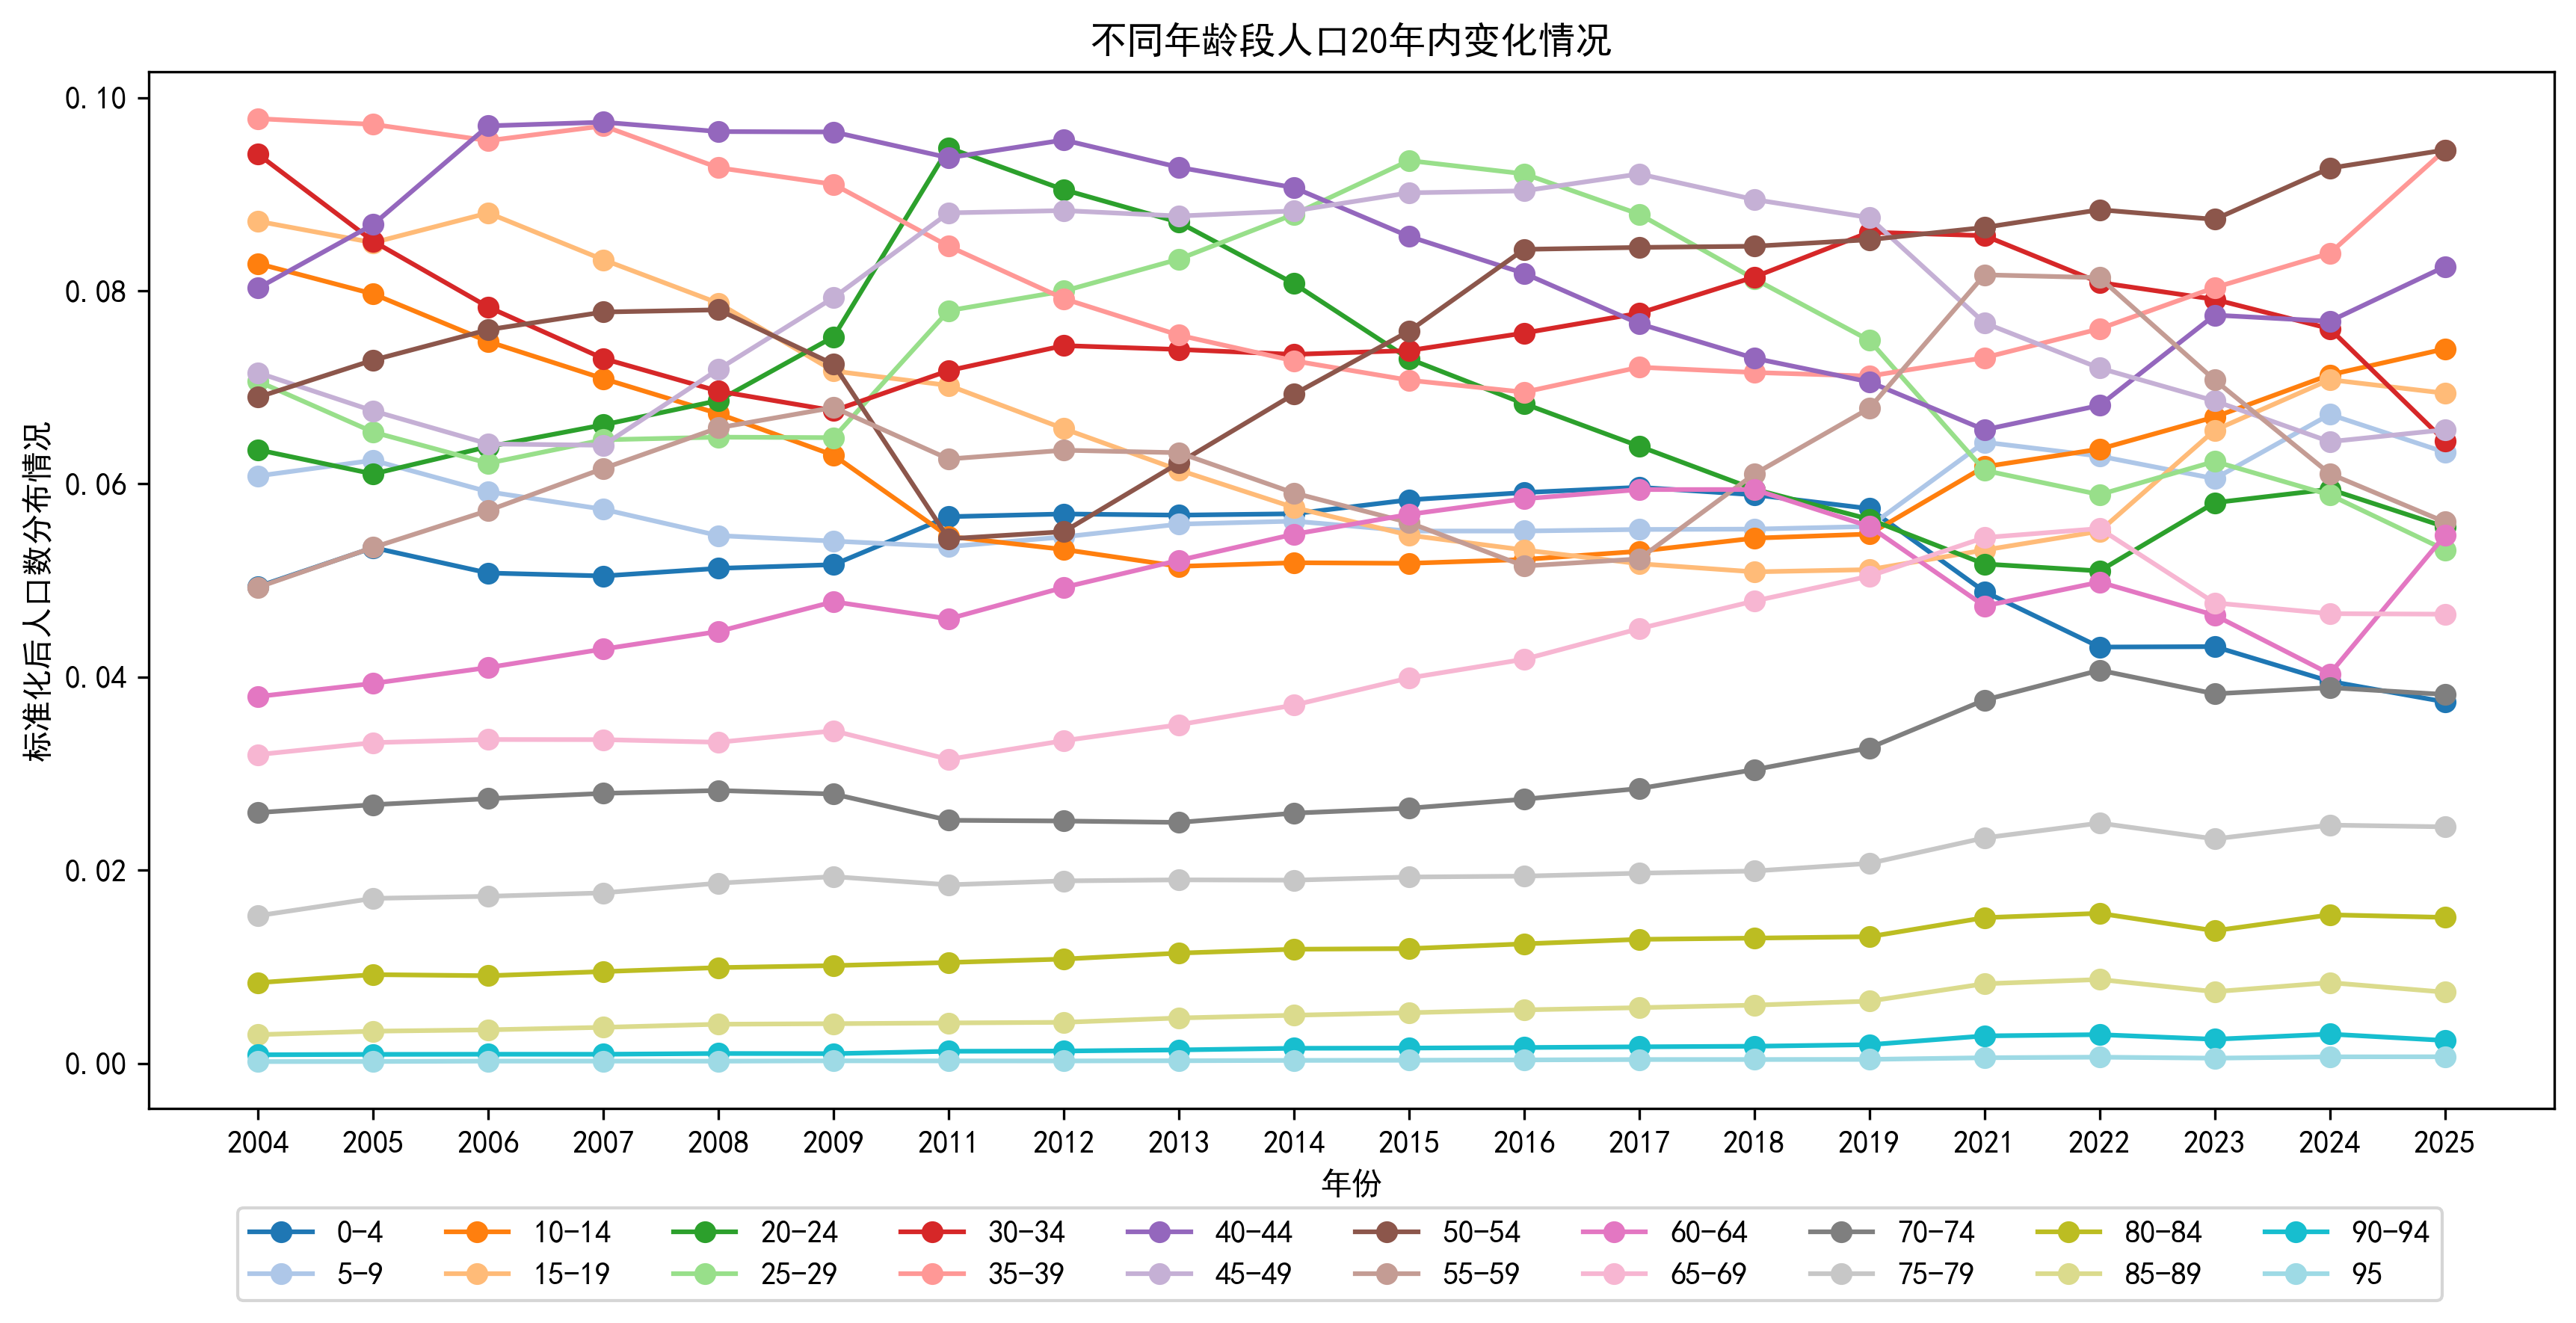

In [ ]:
# TODO 

from statsmodels.tsa.vector_ar.var_model import VAR

# model = VAR(train_df[::-1].values)
model = VAR(diff_1_df)
result = model.fit(4)

res = result.forecast(train_df[::-1].values, 3)

first = 2023
predicted_df = pd.DataFrame(res, columns=train_df.columns, index=range(first, first + len(res)))
res_df = pd.concat([train_df[::-1], predicted_df])
index = train_df.index[::-1].append(predicted_df.index)
res_df = pd.DataFrame(
    std.inverse_transform(res_df), 
    index=index, 
    columns=train_df.columns
)

plt.figure(figsize=(12, 6), dpi=300)
for i, (index, row) in enumerate(res_df.T.iterrows()):
    x = [index for index in row.index]
    y = row.values.reshape(-1, 1)
    plt.plot(x, y, marker='o', label=index, color=cmap(i / len(y)))

plt.legend(loc='lower right', bbox_to_anchor=(0.96, -0.2), ncol=10)

plt.title('不同年龄段人口20年内变化情况')
plt.xlabel('年份')
plt.ylabel('标准化后人口数分布情况')

plt.tight_layout()

plt.show()